https://skine.ru/articles/213902/

## EDA

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
### Let's set beautiful default settings


import matplotlib as mlp

mlp.rcParams['lines.linewidth'] = 5

mlp.rcParams['xtick.major.size'] = 10
mlp.rcParams['xtick.major.width'] = 3
mlp.rcParams['xtick.labelsize'] = 15
mlp.rcParams['xtick.color'] = '#FF5533'

mlp.rcParams['ytick.major.size'] = 10
mlp.rcParams['ytick.major.width'] = 3
mlp.rcParams['ytick.labelsize'] = 15
mlp.rcParams['ytick.color'] = '#FF5533'

mlp.rcParams['axes.labelsize'] = 10
mlp.rcParams['axes.titlesize'] = 10
mlp.rcParams['axes.titlecolor'] = '#00B050'
mlp.rcParams['axes.labelcolor'] = '#00B050'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time


pd.set_option("display.float_format", "{:.2f}".format)

### import tools EDA

In [5]:
def reduce_mem_usage(df):
    """ Iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df


def df_info(df):
    """Print main info about column in Series"""
    print('-----------------Shape---------------------')
    print("No. of  Datapoints --> {}\nNo. of Features --> {}".format(*df.shape))
    print('-------------------Info---------------------')
    print('Info of DataFrame: {}'.format(df.info()))
    print('---------------Duplicates-------------------')
    rows = df.shape[0]
    df.drop_duplicates(inplace=True)
    print("No. of  duplicates --> {}".format(df.shape[0] - rows))
    print('------------------Nan------------------------')
    find_nan_values(df)


def find_nan_values(df):
    if df.isnull().values.any():
        null_columns=df.columns[df.isnull().any()].tolist()
        for column in null_columns:
            total_values=df.shape[0]
            null_values=df[column].isnull().sum()
            print("No. of Nan Values in '{}' column --> {}".format(column,null_values))
            print("{:.2f} % of Total values".format((100 * null_values) / total_values))
            print("\n")
    else:
        print("No Column has Nan Values")


def import_data(file):
    """Create a dataframe and optimize its memory usage"""
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    df_info(df)
    return df


def column_info(df_column):
    """Print main info about column in Series"""
    print('--------------------NaN-----------------------')
    print('Values of NaN in column: {:.2f} %'.format(df_column.isna().sum() * 100 / df_column.shape[0]))

    print('-----------------describe---------------------')
    print(df_column.describe())

    print('----------------value_counts-------------------')
    print(df_column.value_counts())

    print('------------------7 max values-----------------')
    print(df_column.sort_values(ascending=False).head(7))

    print('------------------7 min values-----------------')
    print(df_column.dropna().sort_values(ascending=False).tail(7))


def color(df_value):
    """Prints corelation colors for plots"""
    my_cmap = plt.get_cmap("viridis")
    rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
    return my_cmap(rescale(df_value))

### Train EDA

In [ ]:
### What needs to be predicted?

train = import_data('train_cut.csv')
train.head()

Memory usage of dataframe is 287.24 MB
Memory usage after optimization is: 83.85 MB
Decreased by 70.8%
-----------------Shape---------------------
No. of  Datapoints --> 6274852
No. of Features --> 6
-------------------Info---------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6274852 entries, 0 to 6274851
Data columns (total 6 columns):
 #   Column       Dtype   
---  ------       -----   
 0   id           int32   
 1   date         category
 2   store_nbr    int8    
 3   item_nbr     int32   
 4   unit_sales   float16 
 5   onpromotion  category
dtypes: category(2), float16(1), int32(2), int8(1)
memory usage: 83.9 MB
Info of DataFrame: None
---------------Duplicates-------------------
No. of  duplicates --> 0
------------------Nan------------------------
No. of Nan Values in 'onpromotion' column --> 1082368
17.25 % of Total values




,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,79,2013-01-01,25,257847,90.00,NaN
1,480,2013-01-01,25,953609,1.00,NaN
2,313,2013-01-01,25,671706,2.55,NaN
3,497,2013-01-01,25,999545,1.00,NaN
4,440,2013-01-01,25,890372,1.00,NaN


In [ ]:
train = train.set_index('id')

train['onpromotion'] = train['onpromotion'].astype('float').fillna(-1)
train['onpromotion'] = train['onpromotion'].astype('category')
train['unit_sales'] = train['unit_sales'].astype('float')
train['date'] = pd.to_datetime(train['date'])


In [ ]:
train.describe()

,store_nbr,item_nbr,unit_sales
count,6274852.00,6274852.00,6274852.00
mean,27.47,972647.28,8.55
std,16.33,520435.57,21.13
min,1.00,96995.00,-1343.00
25%,12.00,522383.00,2.00
50%,28.00,959437.00,4.00
75%,43.00,1354380.00,9.00
max,54.00,2127114.00,10000.00


Features :
1. Date
2. Store Number (Integers representing different stores)
3. Item Number (Integers representing different stores)
4. On Promotion (Logical feature, Telling whether the particular item sold had been assigned a special promotion pricing at the time in the specific store. This feature contains many NA values.)

Target Variable --> Unit Sales (i.e. how many units of the specific item were sold in that store on that day. Negative values mean that this particular item was returned)

#### unit_sales EDA

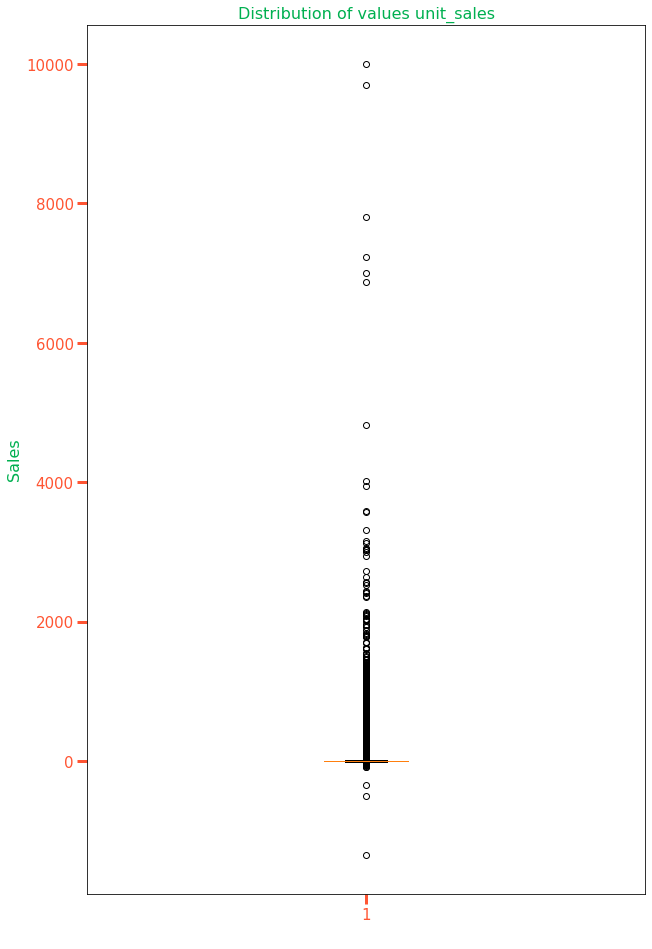

--- 0.9726972579956055 seconds ---


In [ ]:
from matplotlib import pyplot as plt

start_time = time.time()

fig = plt.figure()

fig.set_size_inches((10, 16))

plt.boxplot(train['unit_sales'].values)
plt.title('Distribution of values unit_sales', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.xlabel(' ', fontsize=16)
plt.show()

print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
train['unit_sales'].describe()

count   6274852.00
mean          8.55
std          21.13
min       -1343.00
25%           2.00
50%           4.00
75%           9.00
max       10000.00
Name: unit_sales, dtype: float64

In [ ]:
train['unit_sales'].quantile (.995)

100.0

*  99.5% of all data has 'unit_sales' less then 100.  
(That means usualy sales per item is less then 100, and only few items have sales ore than 100. That could me emissions or some item that is:
1) Very popular
2) Very expensive

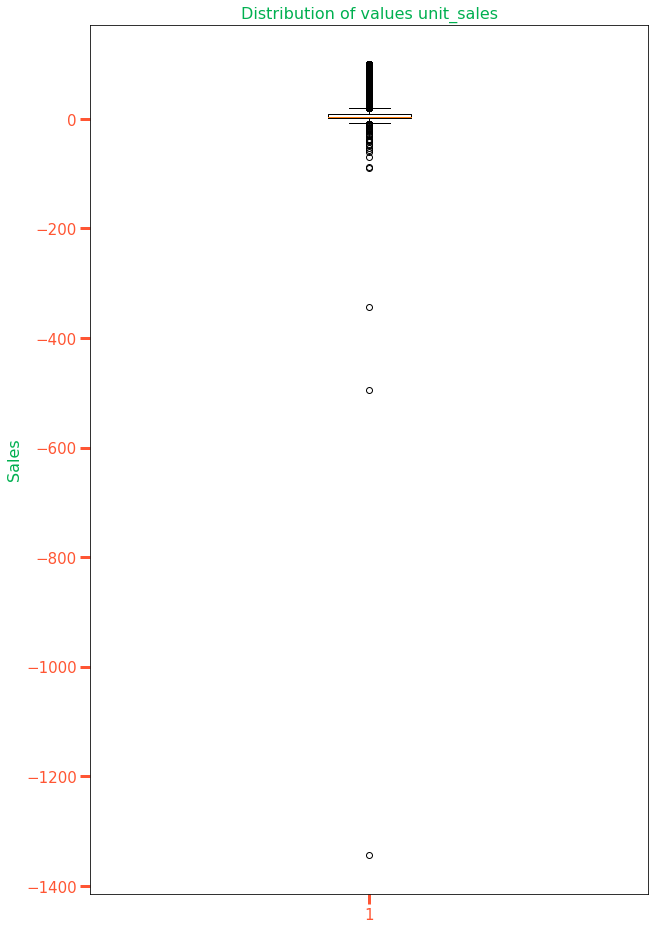

--- 1.1906607151031494 seconds ---


In [ ]:
from matplotlib import pyplot as plt

start_time = time.time()

fig = plt.figure()

fig.set_size_inches((10, 16))

plt.boxplot(train[train.unit_sales<=100]['unit_sales'].values)
plt.title('Distribution of values unit_sales', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.xlabel(' ', fontsize=16)
plt.show()

print("--- %s seconds ---" % (time.time() - start_time))

* There are some lables less than 0, that are emissions, as we dont want to prdict refund. Negetive sales are refunds.

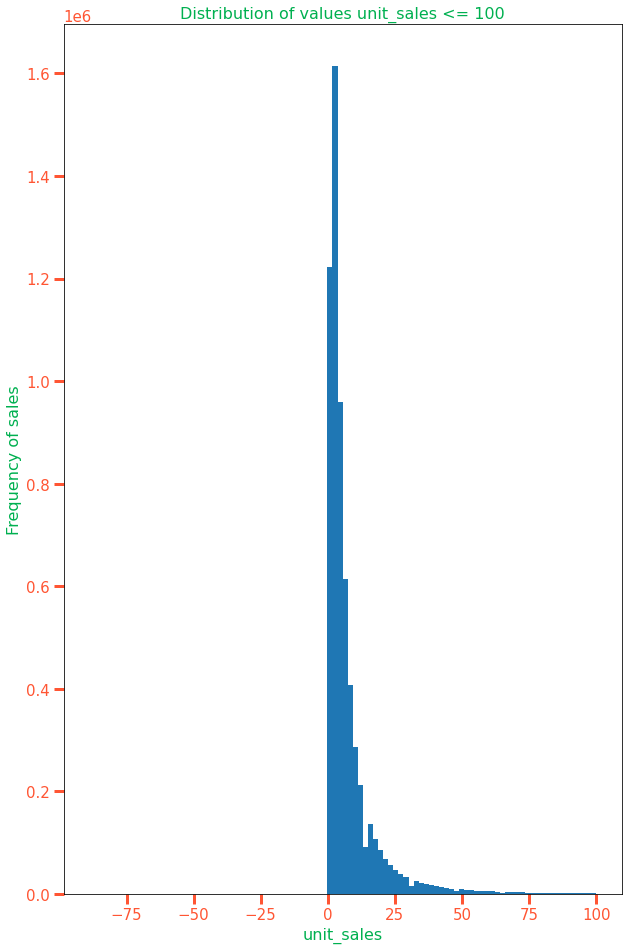

--- 0.6753506660461426 seconds ---


In [ ]:
from matplotlib import pyplot as plt

start_time = time.time()

fig = plt.figure()

fig.set_size_inches((10, 16))

plt.hist(train[abs(train.unit_sales)<=100]['unit_sales'].values, bins=100)
plt.title('Distribution of values unit_sales <= 100', fontsize=16)
plt.ylabel('Frequency of sales', fontsize=16)
plt.xlabel('unit_sales', fontsize=16)
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

#### item_nbr EDA

In [ ]:
column_info(train['item_nbr'])

--------------------NaN-----------------------
Values of NaN in column: 0.00 %
-----------------describe---------------------
count   6274852.00
mean     972647.28
std      520435.57
min       96995.00
25%      522383.00
50%      959437.00
75%     1354380.00
max     2127114.00
Name: item_nbr, dtype: float64
----------------value_counts-------------------
314384     4239
502331     4206
364606     4205
850333     4162
273528     4149
           ... 
2123711       1
2123859       1
2121610       1
2114752       1
2011468       1
Name: item_nbr, Length: 4017, dtype: int64
------------------7 max values-----------------
id
123303005    2127114
123572878    2127114
125174683    2127114
122644179    2127114
124768498    2127114
124853824    2127114
123726492    2127114
Name: item_nbr, dtype: int32
------------------7 min values-----------------
id
11037666    96995
2083188     96995
16324573    96995
6302546     96995
1126121     96995
1916387     96995
17543033    96995
Name: item_nbr, dtyp

* There are some items that were saled only ones, or few times. That could be because of less info about all seles items as mthis DataFrame can be INF

#### Sales of each store(store_nbr)

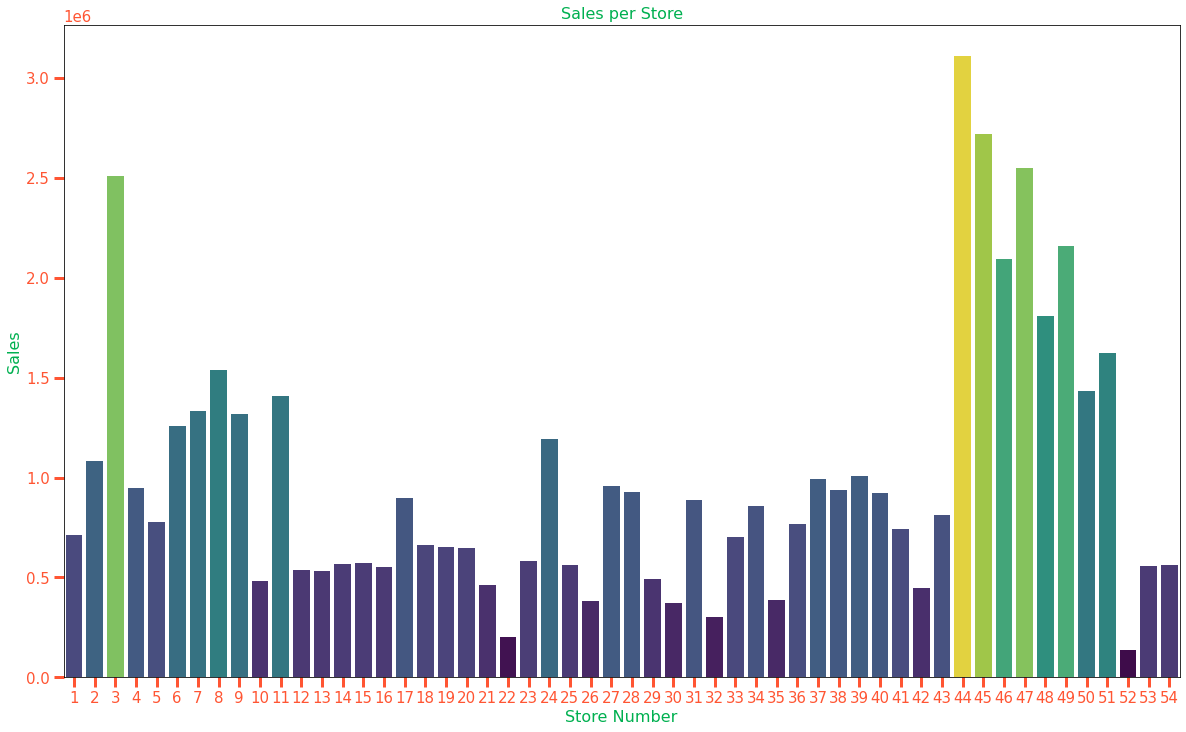

--- 0.9170548915863037 seconds ---


In [ ]:
from matplotlib import pyplot as plt


# Group By store_nbr and Sum of unit_sales for each store_nbr
start_time = time.time()
store_sales = train.groupby(['store_nbr'],as_index=False).agg({'unit_sales': 'sum'})

#PLotting store_nbr Vs unit_sales
fig, ax = plt.subplots()
fig.set_size_inches(20, 12)
ax = sns.barplot(x = store_sales['store_nbr'], y=store_sales['unit_sales'], data = store_sales, palette=color(store_sales['unit_sales']))
plt.title('Sales per Store', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store Number', fontsize=16)
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

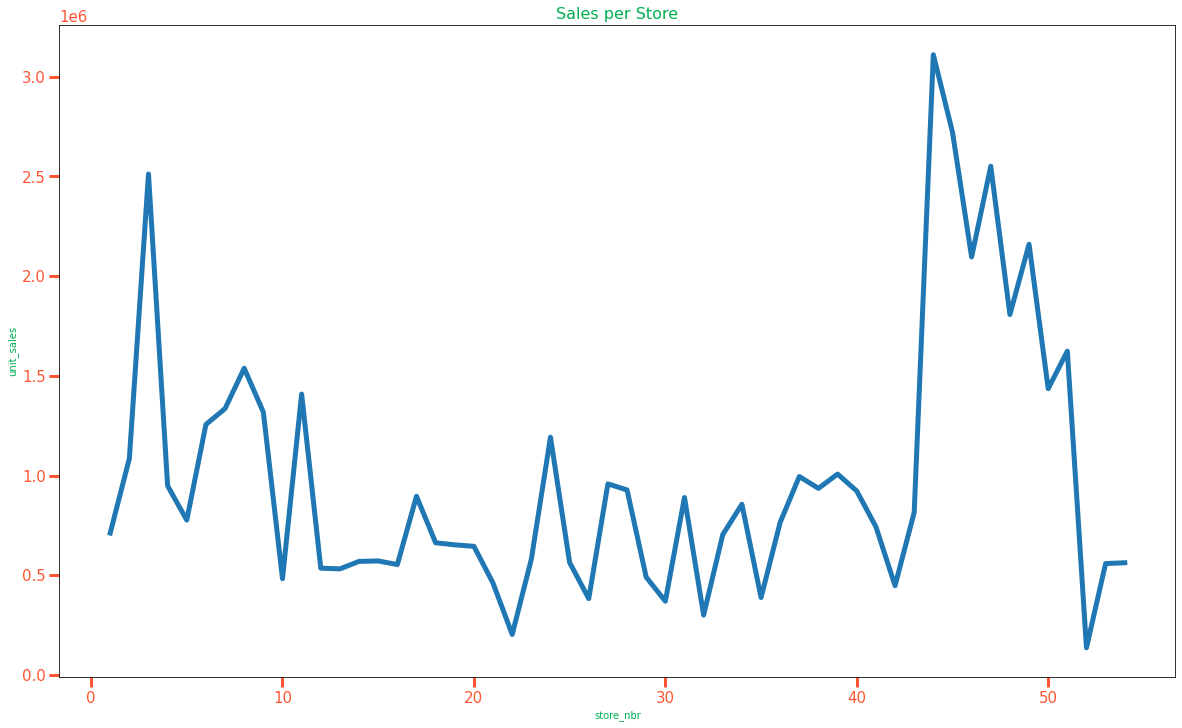

--- 0.3563389778137207 seconds ---


In [ ]:
start_time = time.time()

fig = plt.figure()
fig.set_size_inches(20, 12)

# second variation of ;poting and grouping
sns.lineplot(data=train.groupby(by='store_nbr',
                           as_index=False)['unit_sales'].sum().sort_values(by='unit_sales'),
             x='store_nbr',
             y='unit_sales')

plt.title('Sales per Store', fontsize=16)
plt.show()

print("--- %s seconds ---" % (time.time() - start_time))

* Maximum sales has Store No. 44
* Minimum sales has Store No. 52

#### Sales of each item(item_nbr)

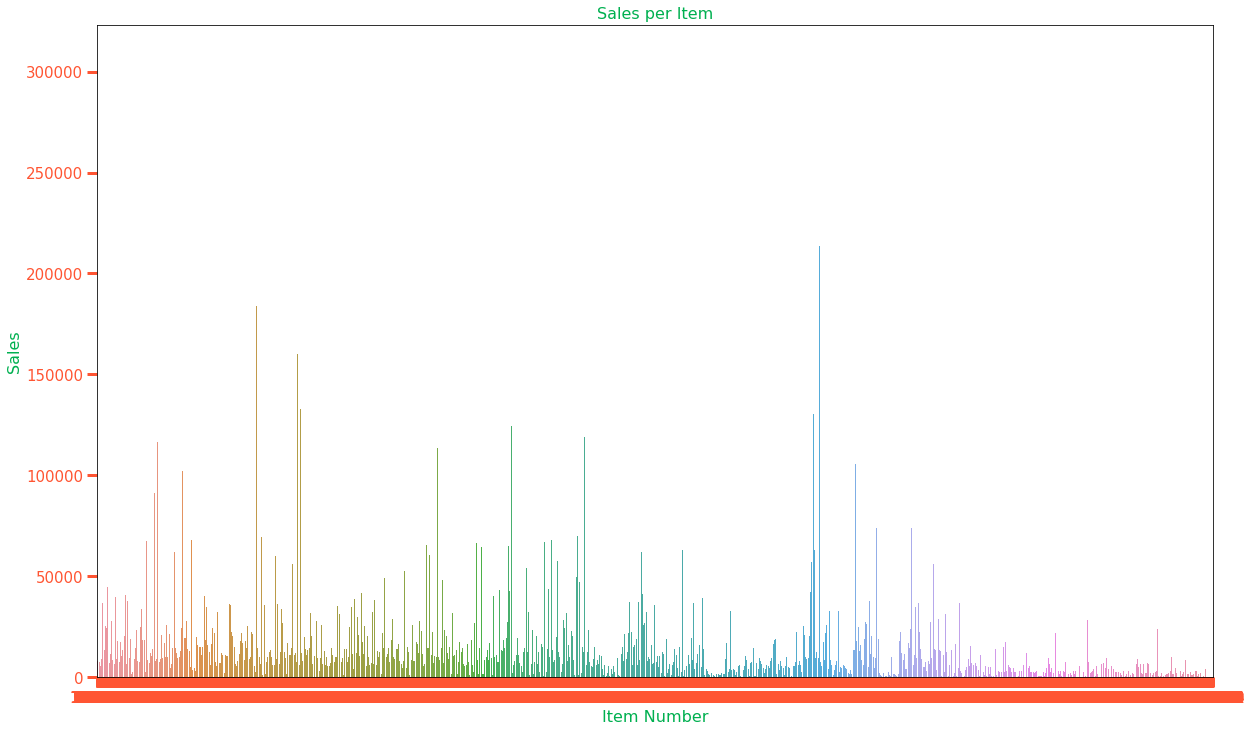

--- 55.90107178688049 seconds ---


In [ ]:
from matplotlib import pyplot as plt


# Group By item_nbr and Sum of unit_sales for each item_nbr
start_time = time.time()
item_sales = train.groupby(['item_nbr'],as_index=False).agg({'unit_sales': 'sum'})

#PLotting item_nbr Vs unit_sales
fig, ax = plt.subplots()
fig.set_size_inches(20, 12)
ax = sns.barplot(x = item_sales['item_nbr'], y=item_sales['unit_sales'], data = item_sales)
plt.title('Sales per Item', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Item Number', fontsize=16)
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

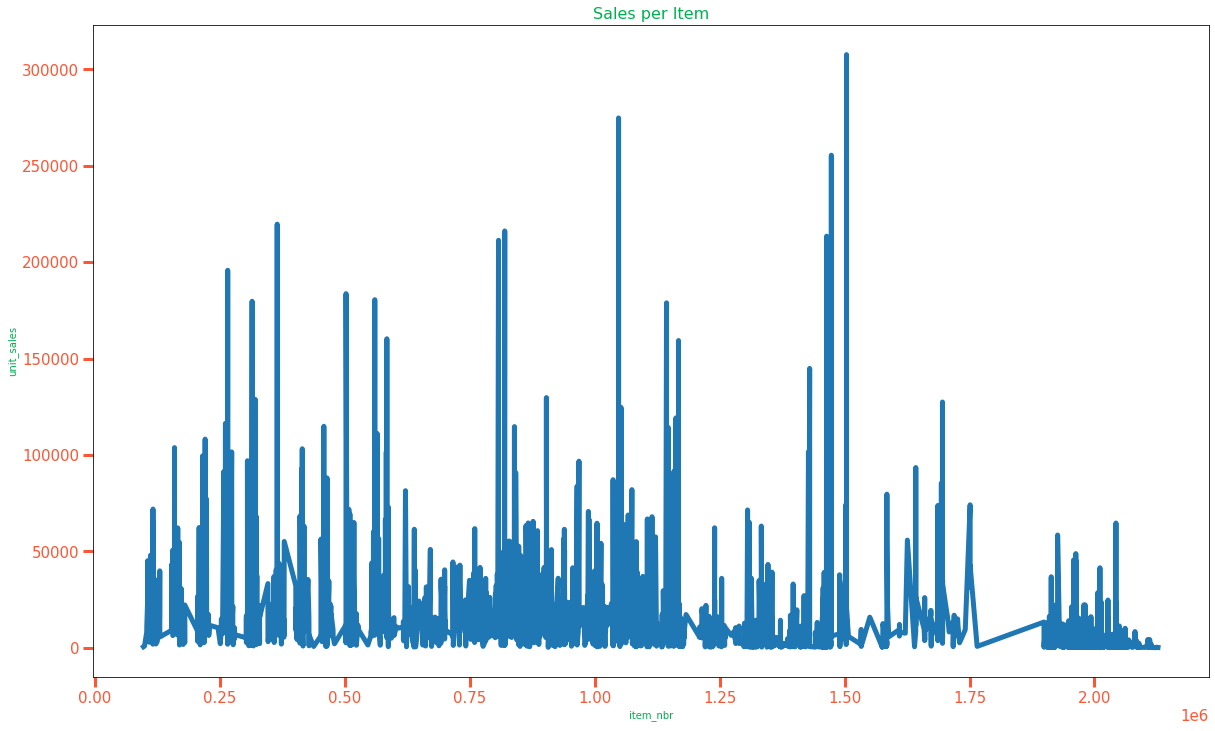

--- 0.4746851921081543 seconds ---


In [ ]:
from matplotlib import pyplot as plt
start_time = time.time()

fig = plt.figure()
fig.set_size_inches(20, 12)

sns.lineplot(data=train.groupby(by='item_nbr',
                           as_index=False)['unit_sales'].sum().sort_values(by='unit_sales'),
             x='item_nbr',
             y='unit_sales')
plt.title('Sales per Item', fontsize=16)
plt.show()

print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
item_sales.sort_values('unit_sales', ascending=False).head(10)

,item_nbr,unit_sales
2809,1503844,307688.33
1451,1047679,274827.00
2739,1473474,255494.23
393,364606,219729.00
1033,819932,216201.00
2601,1463992,213490.00
1004,807493,211358.00
240,265559,195794.00
574,502331,183655.00
658,559870,180531.00


* Most popular products are:

```
*item_nbr*   *unit_sales*
1503844      307688.326172
1047679      274827.000000
1473474      255494.233612
364606       219729.000000
819932       216201.000000
1463992      213490.000000
807493       211358.000000
265559       195794.000000
502331       183655.000000
559870       180531.000000
```
         

#### Sales per year

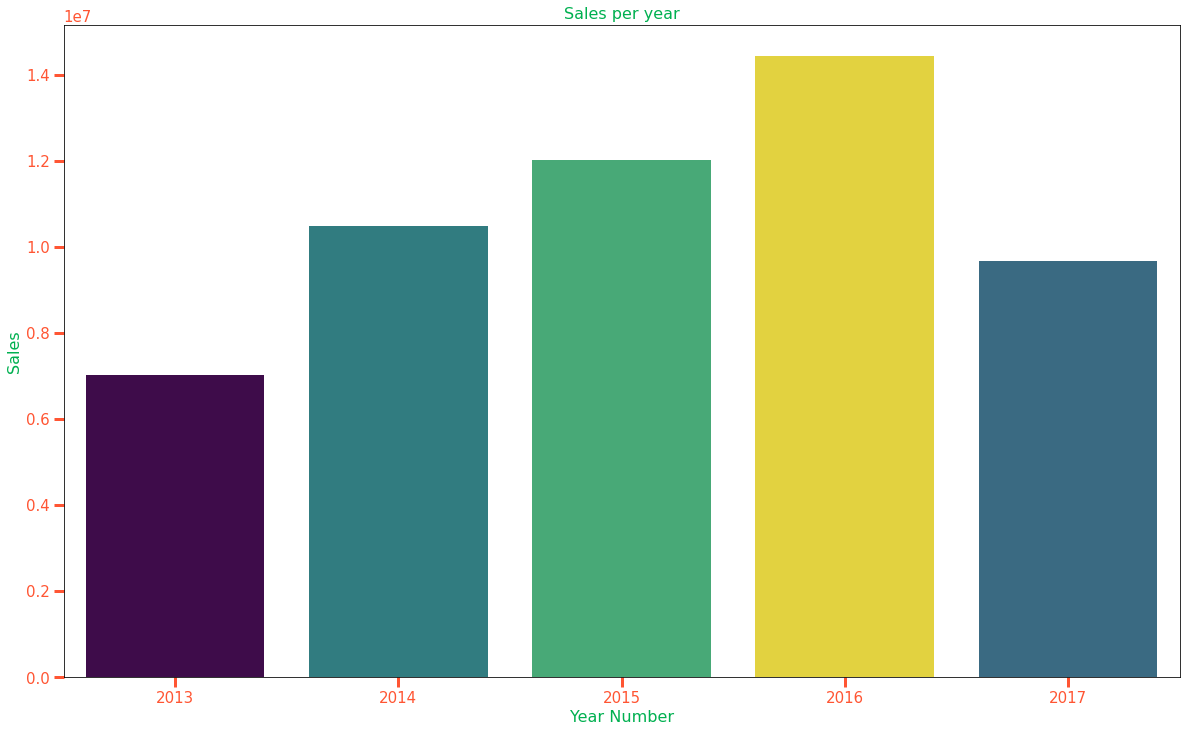

--- 1.0520832538604736 seconds ---


In [ ]:
from matplotlib import pyplot as plt


# Group By year and Sum of unit_sales for each item_nbr
start_time = time.time()
year_sales = train.copy(deep=True)
year_sales['year'] = year_sales['date'].dt.year
year_sales = year_sales.groupby(['year'],as_index=False).agg({'unit_sales': 'sum'})

#PLotting year Vs unit_sales
fig, ax = plt.subplots()
fig.set_size_inches(20, 12)
ax = sns.barplot(x = year_sales['year'], y=year_sales['unit_sales'], data = year_sales, palette=color(year_sales['unit_sales']))
plt.title('Sales per year', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Year Number', fontsize=16)
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
year_sales

,year,unit_sales
0,2013,7017785.25
1,2014,10492267.42
2,2015,12023551.24
3,2016,14433647.82
4,2017,9680272.73



* 2016 is the year with most sales
* 2013 is the year with min sales
* Sales are increasing each year except 2017.
* It might corilate with some data? but not in this frame


* Value Of sumary unit_sales per year

```
year     unit_sales
2013	7.017785e+06
2014	1.049227e+07
2015	1.202355e+07
2016	1.443365e+07
2017	9.680273e+06

```

#### Sales per month

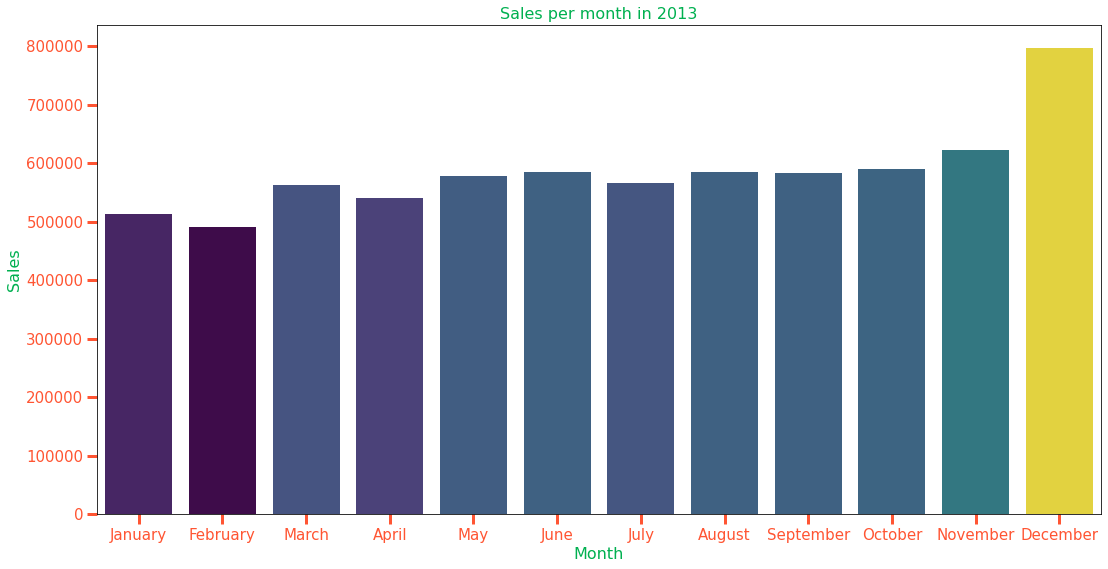

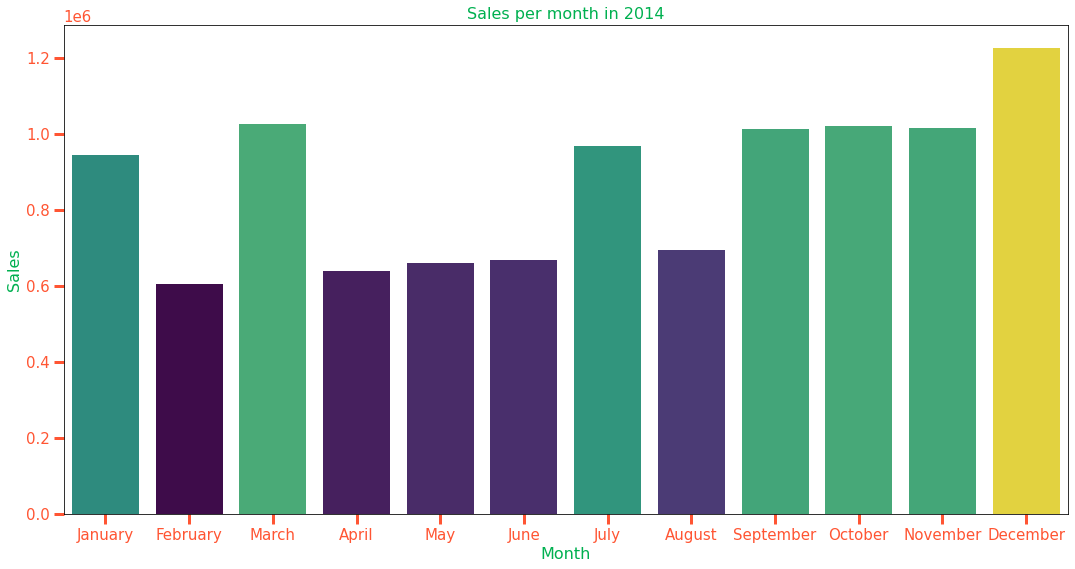

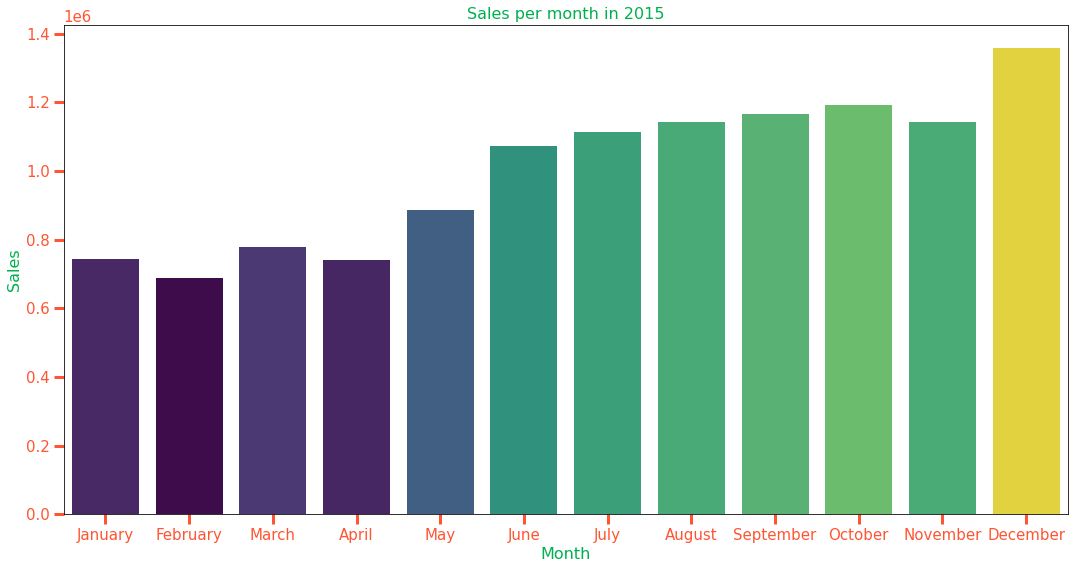

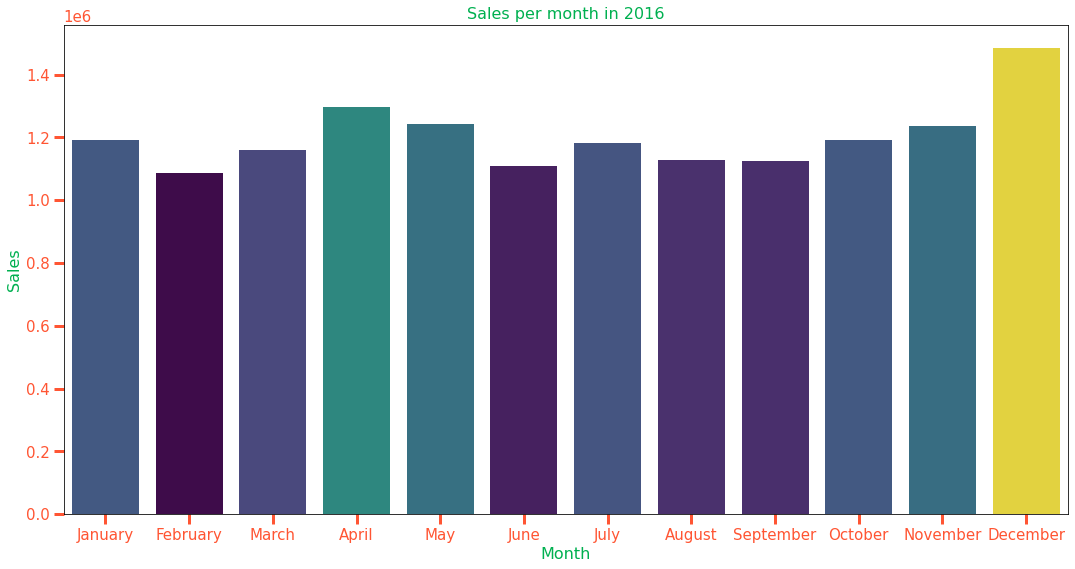

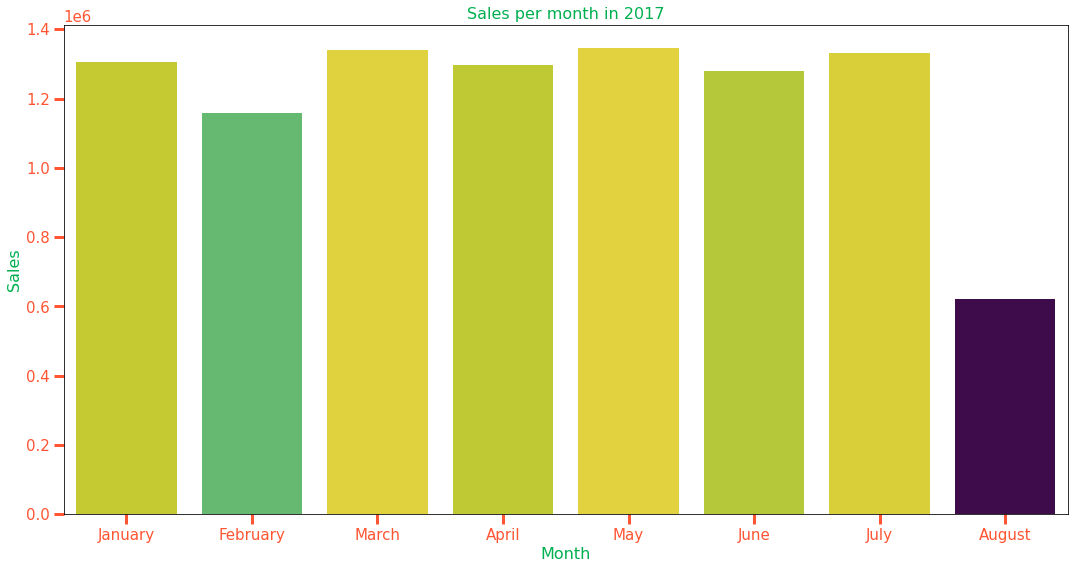

--- 8.568207502365112 seconds ---


In [ ]:
from matplotlib import pyplot as plt


start_time = time.time()
for year in train['date'].dt.year.unique():
    #Filtering data for specific year
    per_year_df = train[train['date'].dt.year == year]

    #Extracting month name from date
    per_year_df['month'] = per_year_df['date'].dt.month
    per_year_df['month_name'] = per_year_df['date'].dt.month_name()

    #Grouping data by months and adding unit_sales
    per_year_df = per_year_df.groupby(['month_name', 'month'], as_index=False).agg({'unit_sales':'sum'})

    #Sorting dataframe by Month
    per_year_df = per_year_df.sort_values('month')

    #PLotting year_month Vs unit_sales
    fig, ax = plt.subplots()
    fig.set_size_inches(18, 9)
    ax = sns.barplot(x = per_year_df['month_name'], y=per_year_df['unit_sales'], data = per_year_df, palette=color(per_year_df['unit_sales']))
    plt.title(f'Sales per month in {year}', fontsize=16)
    plt.ylabel('Sales', fontsize=16)
    plt.xlabel('Month', fontsize=16)
    plt.show()

    del per_year_df

print("--- %s seconds ---" % (time.time() - start_time))

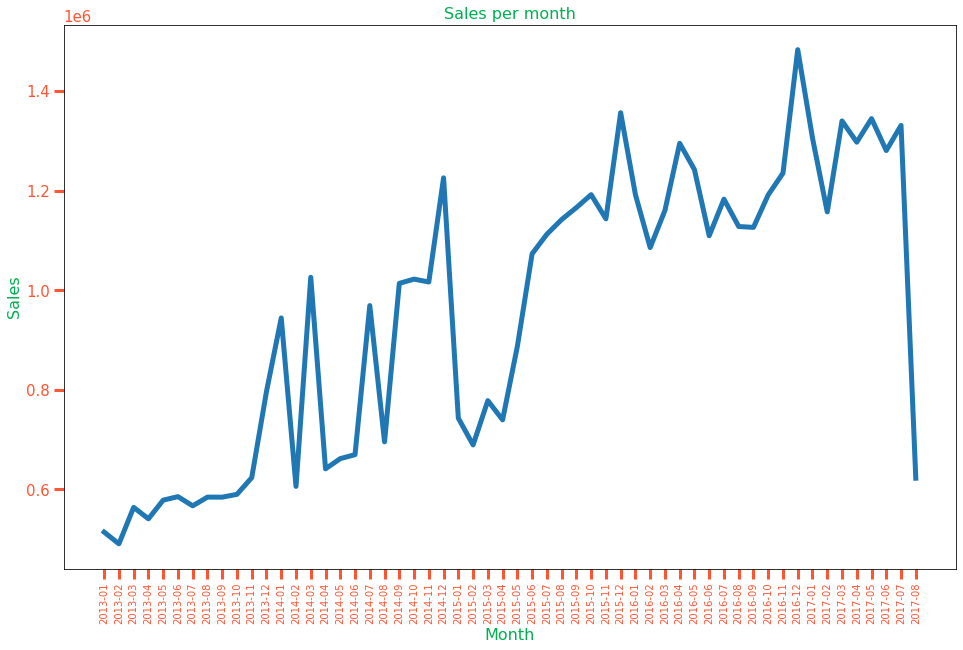

--- 14.469464778900146 seconds ---


In [ ]:
from matplotlib import pyplot as plt
start_time = time.time()


###  Number of units sold by date
fig = plt.figure()
fig.set_size_inches(16, 10)
per_year_df = train.copy(deep=True)

per_year_df['month'] = pd.to_datetime(per_year_df['date']).dt.to_period('M')
per_year_df['month_name'] = per_year_df['date'].dt.month_name()

#Grouping data by months and adding unit_sales
per_year_df = per_year_df.groupby(['month_name', 'month'], as_index=False).agg({'unit_sales':'sum'})

#Sorting dataframe by Month
per_year_df = per_year_df.sort_values('month')


per_year_df['month'] = per_year_df['month'].astype('string')
plt.plot(per_year_df.groupby('month')['unit_sales'].sum())

plt.xticks(rotation=90, size=10)

plt.title(f'Sales per month', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))


* As we can see, most sales are in december.  
(Because of the Christmas and New Year Holidays)

* February month has the minimum sales every year.  
(It is a wonder way, we will find it out)

* All whese charts shows that the is seasonality in purchases(sales).  
(There is data only up to August 2017)

#### Sales per day in 2017

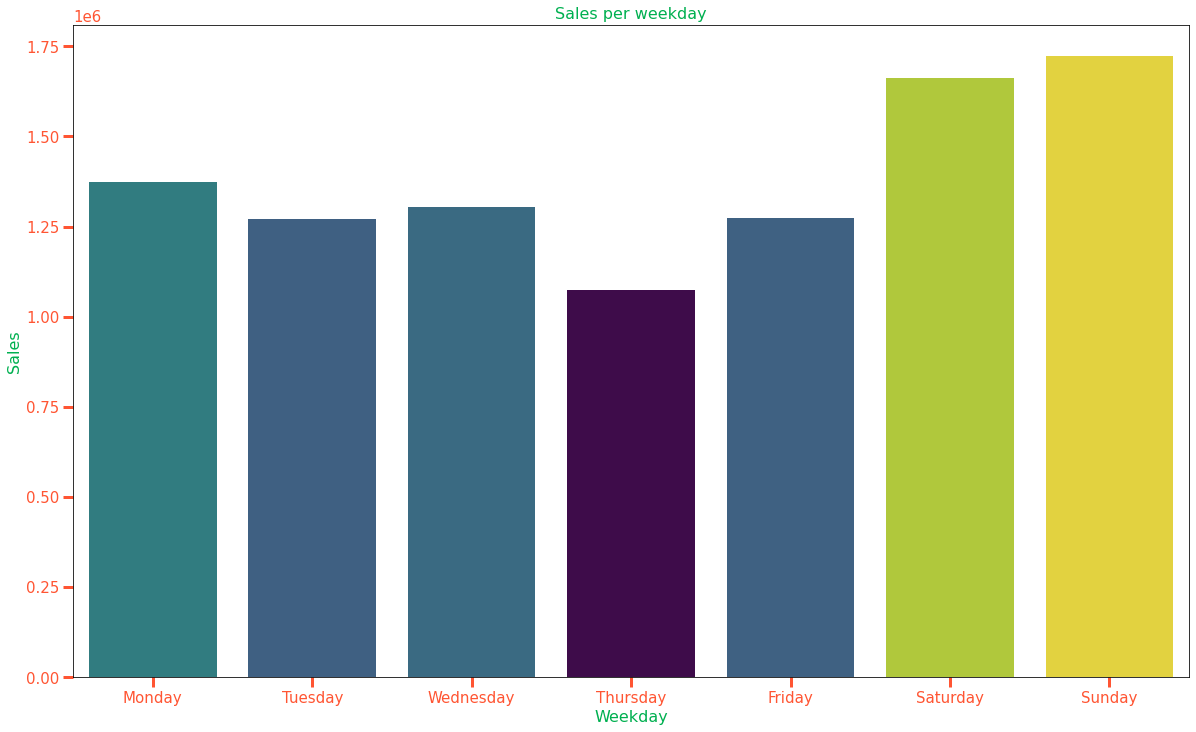

--- 4.398556232452393 seconds ---


In [ ]:
# Group By day and Sum of unit_sales for each item_nbr
from matplotlib import pyplot as plt
start_time = time.time()


weekday_sales = train[train['date'].dt.year == 2017]
weekday_sales['weekday'] = train['date'].dt.weekday
weekday_sales['weekday_name'] = train['date'].dt.day_name()
weekday_sales = weekday_sales.groupby(['weekday_name', 'weekday'],as_index=False).agg({'unit_sales': 'sum'})
weekday_sales = weekday_sales.sort_values('weekday')


#PLotting item_nbr Vs unit_sales
fig, ax = plt.subplots()
fig.set_size_inches(20, 12)
ax = sns.barplot(x = weekday_sales['weekday_name'], y=weekday_sales['unit_sales'], data = weekday_sales, palette=color(weekday_sales['unit_sales']))
plt.title('Sales per weekday', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Weekday', fontsize=16)
plt.show()

print("--- %s seconds ---" % (time.time() - start_time))

* Saturday and Sunday, have maximum sales.  
(This is logical because people often go shopping on weekends and buy food at the same time in supermaket)

* Thursday has the minimum sales.

* The day of the week is an important feature that we will use when predicting


#### No. of Items on promotion

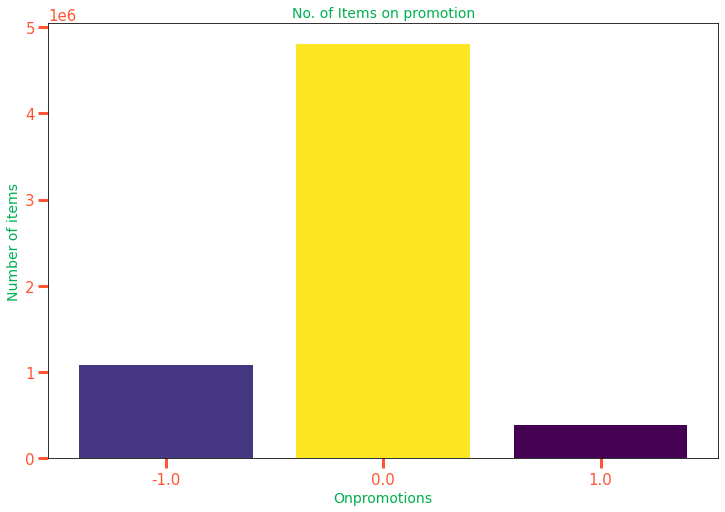

--- 0.15889549255371094 seconds ---


In [ ]:
from matplotlib import pyplot as plt
start_time = time.time()


# Group By Year and Sum of unit_sales for each year
promotion = train.groupby(['onpromotion'], as_index=False).agg({'item_nbr':'count'})


#Plotting year Vs unit_sales
plt.figure(figsize=(12,8))
plt.bar(promotion['onpromotion'].astype('string'), promotion.item_nbr, color=color( promotion.item_nbr))
plt.title('No. of Items on promotion',fontsize=14)
plt.ylabel('Number of items',fontsize=14)
plt.xlabel('Onpromotions',fontsize=14)
plt.show()

print("--- %s seconds ---" % (time.time() - start_time))

#### Sales for on promotion/not on promotion Items

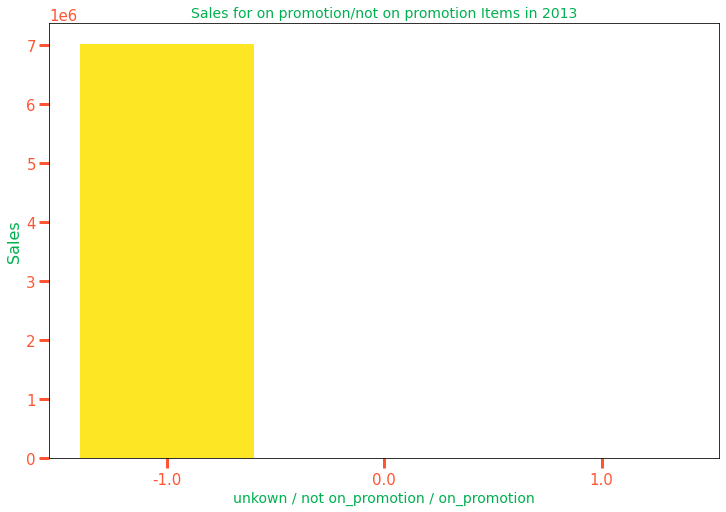

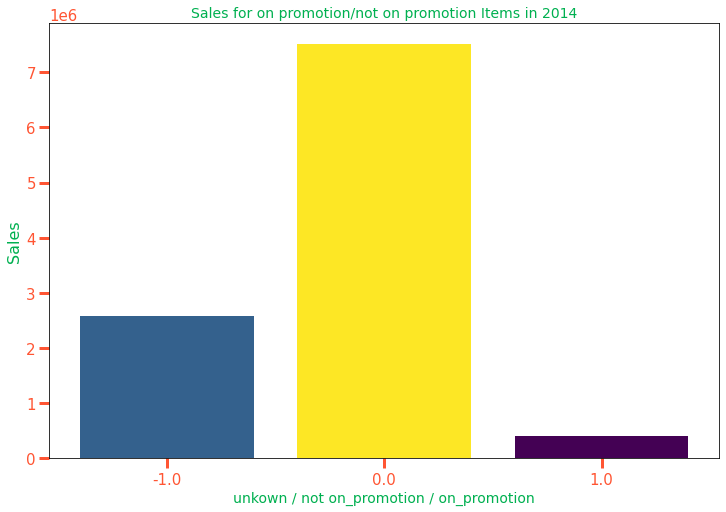

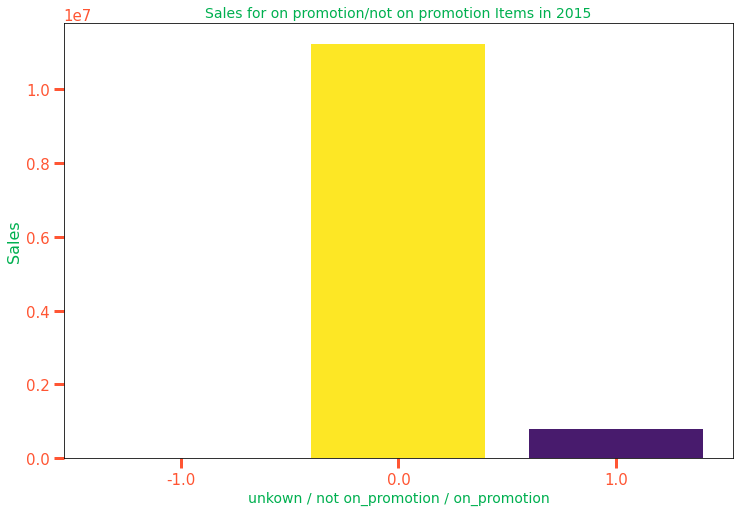

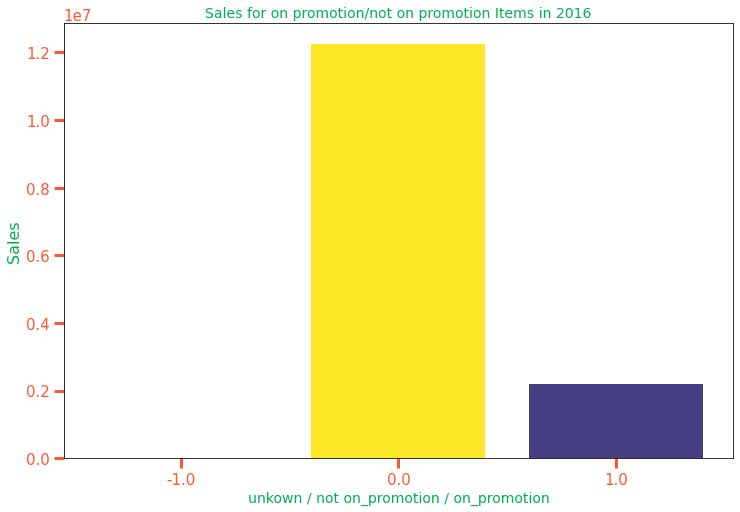

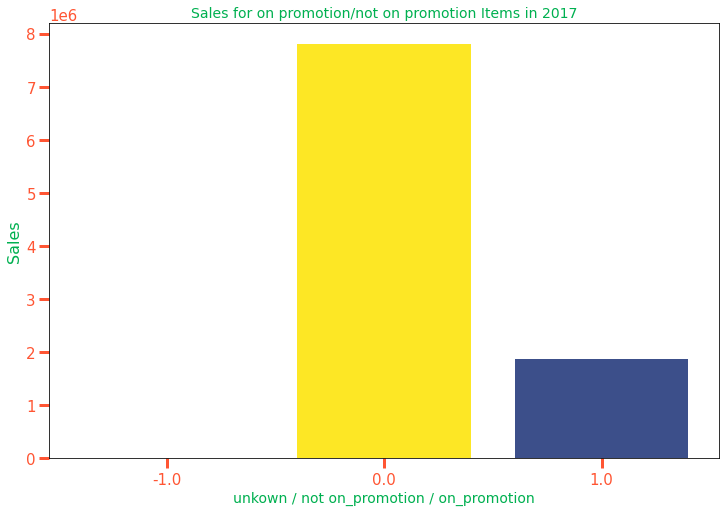

--- 4.269272804260254 seconds ---


In [ ]:
from matplotlib import pyplot as plt


start_time = time.time()
for year in train['date'].dt.year.unique():
    # Group By day_of_week and Sum of unit_sales for each day_of_week
    promotion_sales = train[train['date'].dt.year == year]
    promotion_sales = promotion_sales.groupby(['onpromotion'], as_index=False).agg({'unit_sales':'sum'})

    #Plotting day_of_week Vs unit_sales
    plt.figure(figsize=(12,8))
    plt.bar(promotion_sales['onpromotion'].astype('string'), promotion_sales.unit_sales, color=color(promotion_sales.unit_sales))
    plt.title(f'Sales for on promotion/not on promotion Items in {year}', fontsize= 14)
    plt.xlabel('unkown / not on_promotion / on_promotion', fontsize= 14)
    plt.ylabel('Sales', fontsize=16)
    plt.show()
    del promotion_sales
print("--- %s seconds ---" % (time.time() - start_time))

#### Deleting all local df

In [ ]:
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

memory = sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)
# Get a sorted list of the objects and their sizes
print(f'Numbers of var in memory is = {len(memory)}')
memory

In [ ]:
try:
    del store_sales
    del item_sales
    del year_sales
    del per_year_df
    del weekday_sales
    del promotion
    del promotion_sales
    del train_2016
except:
    pass

In [ ]:
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

memory = sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)
# Get a sorted list of the objects and their sizes
print(f'Numbers of var in memory is = {len(memory)}')
memory

### Stores EDA

In [ ]:
### Description of stores

stores = import_data('stores.csv')
stores.head()

Memory usage of dataframe is 0.00 MB
Memory usage after optimization is: 0.00 MB
Decreased by 11.5%
-----------------Shape---------------------
No. of  Datapoints --> 54
No. of Features --> 5
-------------------Info---------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   store_nbr  54 non-null     int8    
 1   city       54 non-null     category
 2   state      54 non-null     category
 3   type       54 non-null     category
 4   cluster    54 non-null     int8    
dtypes: category(3), int8(2)
memory usage: 2.0 KB
Info of DataFrame: None
---------------Duplicates-------------------
No. of  duplicates --> 0
------------------Nan------------------------
No Column has Nan Values


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [ ]:
stores.describe(exclude='int8')

,city,state,type
count,54,54,54
unique,22,16,5
top,Quito,Pichincha,D
freq,18,19,18


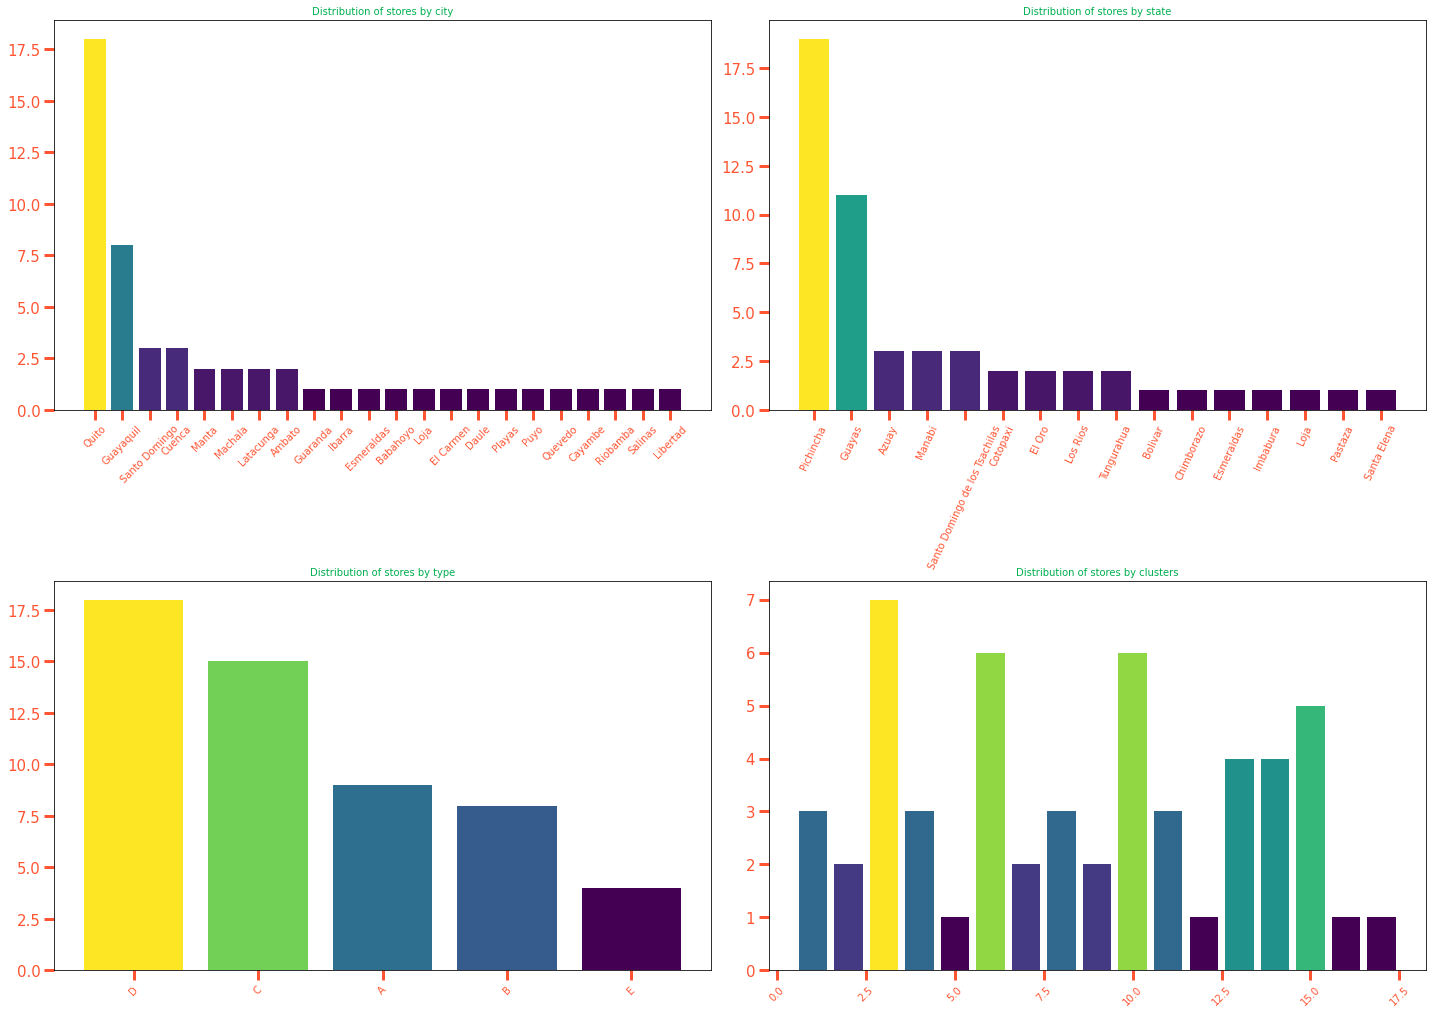

--- 1.0023722648620605 seconds ---


In [ ]:
### Distribution of stores by city/state/type/cluster
from matplotlib import pyplot as plt
start_time = time.time()

fig = plt.figure()
fig.set_size_inches(20, 14)


### by city
ax_1 = fig.add_subplot(2, 2, 1)

plt.bar(stores.groupby('city').size().sort_values(ascending=False).index, stores.groupby('city').size().sort_values(ascending=False).values, color=color(stores.groupby('city').size().sort_values(ascending=False).values))
plt.xticks(rotation=45, size=10)

### by state
ax_2 = fig.add_subplot(2, 2, 2)

plt.bar(stores.groupby('state').size().sort_values(ascending=False).index, stores.groupby('state').size().sort_values(ascending=False).values, color=color(stores.groupby('state').size().sort_values(ascending=False).values))
plt.xticks(rotation=65, size=10)

### by type
ax_3 = fig.add_subplot(2, 2, 3)

plt.bar(stores.groupby('type').size().sort_values(ascending=False).index, stores.groupby('type').size().sort_values(ascending=False).values, color=color(stores.groupby('type').size().sort_values(ascending=False).values))
plt.xticks(rotation=45, size=10)

### by cluster
ax_4 = fig.add_subplot(2, 2, 4)

plt.bar(stores.groupby('cluster').size().index, stores.groupby('cluster').size().values, color=color(stores.groupby('cluster').size().values))
plt.xticks(rotation=45, size=10)

fig.tight_layout()

ax_1.set(title = 'Distribution of stores by city')
ax_2.set(title = 'Distribution of stores by state')
ax_3.set(title = 'Distribution of stores by type')
ax_4.set(title = 'Distribution of stores by clusters')

plt.show()

print("--- %s seconds ---" % (time.time() - start_time))

#### No. of stores per city

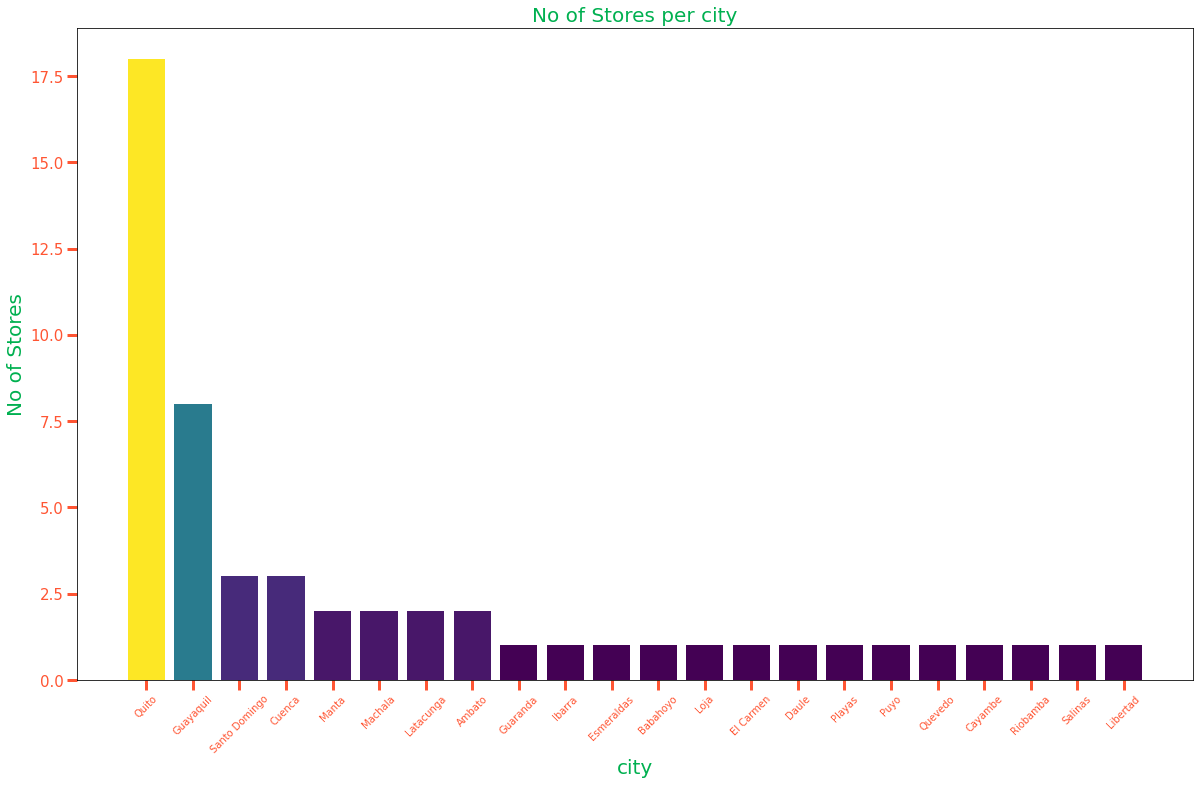

--- 0.28627800941467285 seconds ---


In [ ]:
### Distribution of stores by city
from matplotlib import pyplot as plt
start_time = time.time()

fig = plt.figure()
fig.set_size_inches(20, 12)


### by city
stores_city = stores.groupby('city').size().sort_values(ascending=False)
plt.bar(stores_city.index, stores_city.values, color=color(stores_city.values))
plt.xticks(rotation=45, size=10)

plt.title('No of Stores per city',fontsize=20)
plt.ylabel('No of Stores',fontsize=20)
plt.xlabel('city',fontsize=20)

plt.show()

print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
stores.groupby('city').size()

city
Ambato            2
Babahoyo          1
Cayambe           1
Cuenca            3
Daule             1
El Carmen         1
Esmeraldas        1
Guaranda          1
Guayaquil         8
Ibarra            1
Latacunga         2
Libertad          1
Loja              1
Machala           2
Manta             2
Playas            1
Puyo              1
Quevedo           1
Quito            18
Riobamba          1
Salinas           1
Santo Domingo     3
dtype: int64

*  Maximum no. of stores(18) has Quitto, second place is Guayaquil with 8 stores

* Other States have no. of stores between 1 and 3.

#### No. of sales per city

In [ ]:
train_2016 = train[train['date'].dt.year >= 2016]
stores_2016 = train_2016.merge(stores, how='inner', on='store_nbr')
stores_2016

,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,type,cluster
0,2016-01-01,25,361502,6.00,0.00,Salinas,Santa Elena,D,1
1,2016-01-01,25,324206,2.00,0.00,Salinas,Santa Elena,D,1
2,2016-01-01,25,404442,5.00,0.00,Salinas,Santa Elena,D,1
3,2016-01-01,25,1427659,48.00,0.00,Salinas,Santa Elena,D,1
4,2016-01-01,25,802832,23.00,0.00,Salinas,Santa Elena,D,1
...,...,...,...,...,...,...,...,...,...
2951366,2017-08-15,52,1951042,7.00,0.00,Manta,Manabi,A,11
2951367,2017-08-15,52,1239887,3.00,0.00,Manta,Manabi,A,11
2951368,2017-08-15,52,645294,1.00,0.00,Manta,Manabi,A,11
2951369,2017-08-15,52,208514,4.00,0.00,Manta,Manabi,A,11


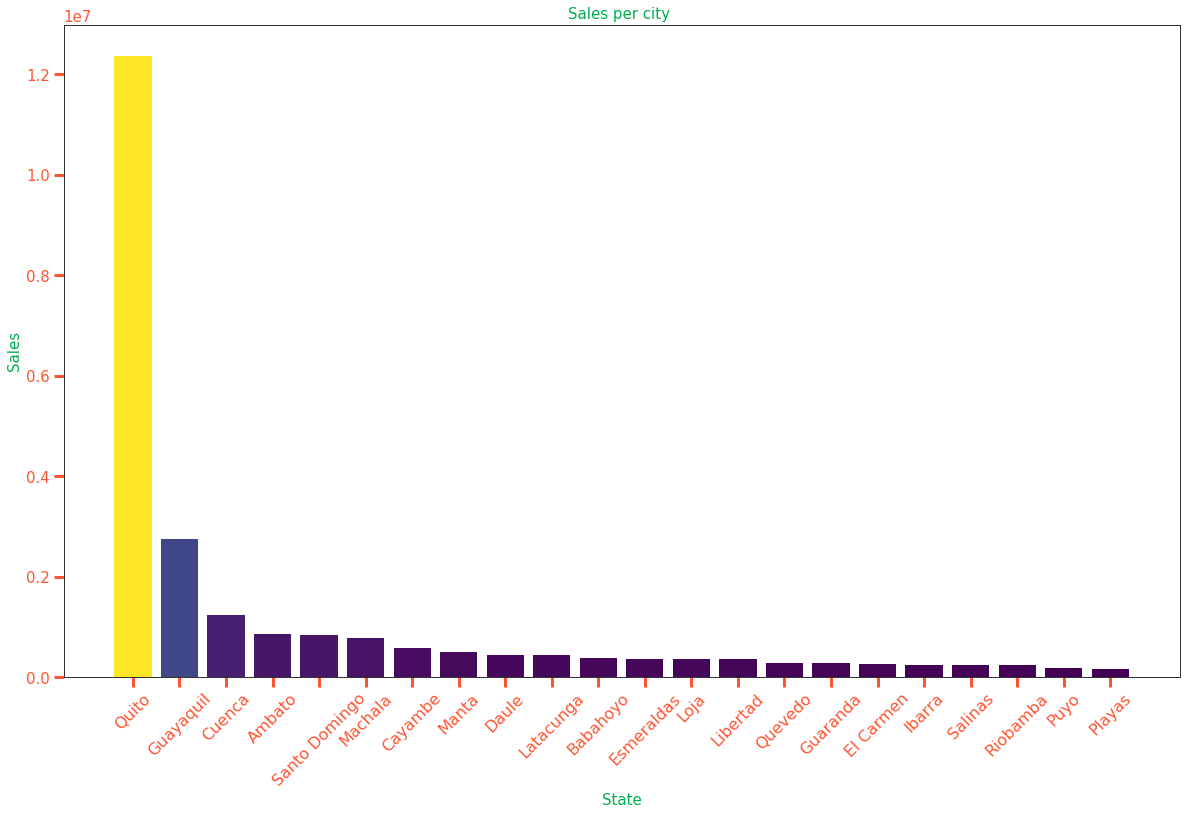

--- 0.3269782066345215 seconds ---


In [ ]:
#Group by State and sum of sales for each city
from matplotlib import pyplot as plt
start_time = time.time()

stores_2016_city = stores_2016.groupby(['city'], as_index=False).agg({'unit_sales':'sum'}).sort_values(by='unit_sales', ascending=False)

#Plotting city Vs unit_sales
fig, ax = plt.subplots()
fig.set_size_inches(20, 12)
plt.bar(stores_2016_city.city, stores_2016_city.unit_sales, color=color(stores_2016_city.unit_sales))
plt.xticks(rotation=45, size=16)
plt.title("Sales per city ",fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.xlabel('State',fontsize=15)

plt.show()

print("--- %s seconds ---" % (time.time() - start_time))

* Maximum no. of sales has Quito

* Cities shows a certain amount of variation in the average sale numbers.

#### No. of stores per State

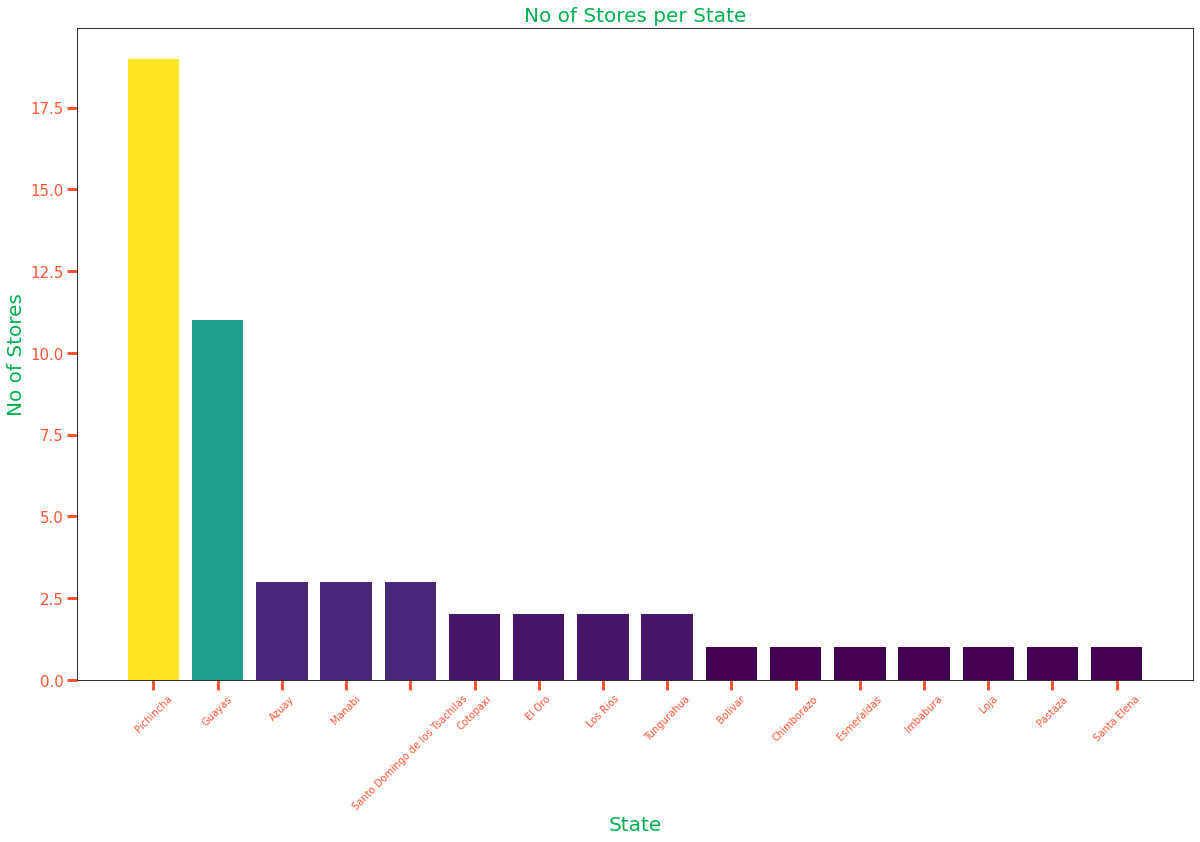

--- 0.2486875057220459 seconds ---


In [ ]:
### Distribution of stores by State
from matplotlib import pyplot as plt
start_time = time.time()

fig = plt.figure()
fig.set_size_inches(20, 12)


### by State
stores_state = stores.groupby('state').size().sort_values(ascending=False)
plt.bar(stores_state.index, stores_state.values, color=color(stores_state.values))
plt.xticks(rotation=45, size=10)

plt.title('No of Stores per State',fontsize=20)
plt.ylabel('No of Stores',fontsize=20)
plt.xlabel('State',fontsize=20)

plt.show()

print("--- %s seconds ---" % (time.time() - start_time))

*  Pichincha has maximum no. of stores i.e 19 stores, followed by Guayas with 11 stores

* Other States have no. of stores between 1 and 3.

#### No. of sales per State

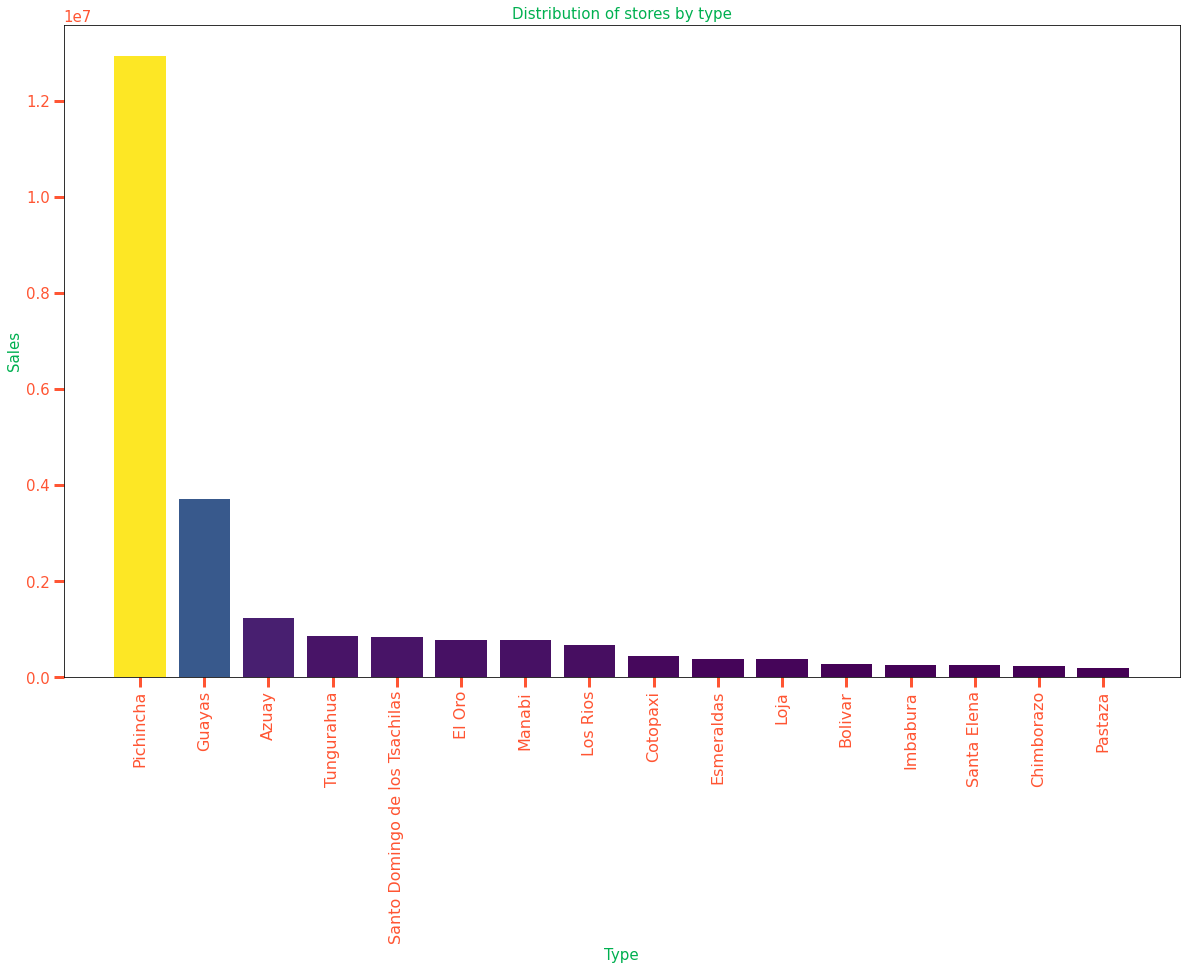

--- 0.2897465229034424 seconds ---


In [ ]:
#Group by State and sum of sales for each State
from matplotlib import pyplot as plt
start_time = time.time()

stores_state_sales = stores_2016.groupby(['state'], as_index=False).agg({'unit_sales':'sum'}).sort_values(by='unit_sales', ascending=False)

#Plotting State Vs unit_sales
fig, ax = plt.subplots()
fig.set_size_inches(20, 12)
plt.bar(stores_state_sales.state, stores_state_sales.unit_sales, color=color(stores_state_sales.unit_sales))
plt.xticks(rotation=90, size=16)
plt.title('Distribution of stores by type',fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.xlabel('Type',fontsize=15)
plt.show()


print("--- %s seconds ---" % (time.time() - start_time))

*  Pichincha has maximum sales
*  Other States have much lower sales.

#### No of Stores per Store Type

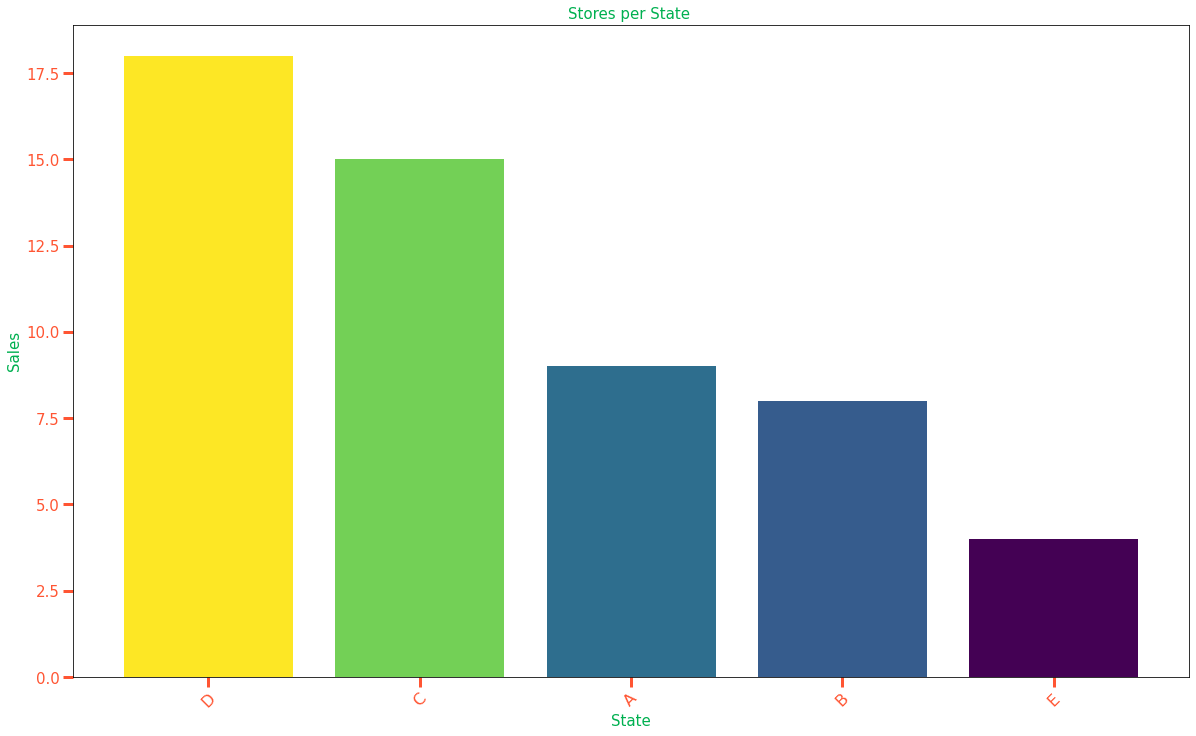

--- 0.16623139381408691 seconds ---


In [ ]:
#Group by type and sum of sales for each type
from matplotlib import pyplot as plt
start_time = time.time()

store_type_store = stores.groupby('type').size().sort_values(ascending=False)

#Plotting type Vs unit_sales
fig, ax = plt.subplots()
fig.set_size_inches(20, 12)
plt.bar(store_type_store.index, store_type_store.values, color=color(store_type_store.values))
plt.xticks(rotation=45, size=16)
plt.title("Stores per State ",fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.xlabel('State',fontsize=15)
plt.show()


print("--- %s seconds ---" % (time.time() - start_time))



*  We see that D and “C” are the most frequent, with “A” and “B” having similar medium frequency and “E” only accounting for 4 stores.



*  Type D has maximum no. of stores? second place type C.
*  Type E has minimum no. of stores.



#### No of sales per Store Type

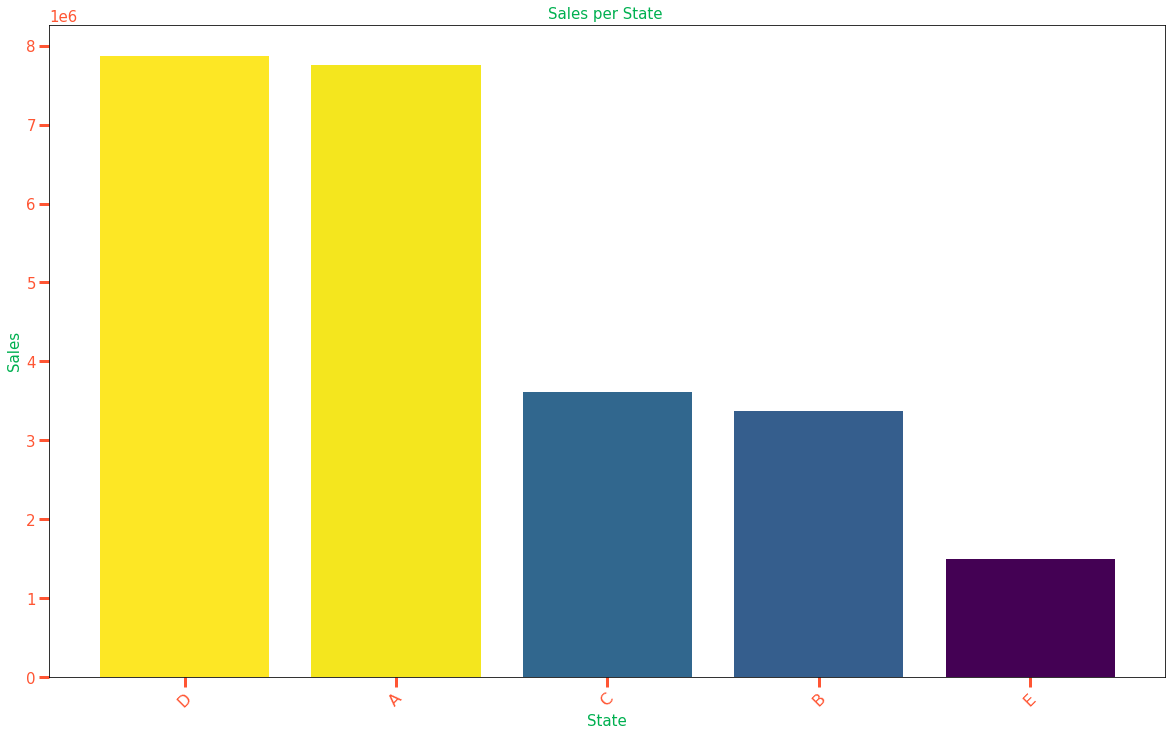

--- 0.19861316680908203 seconds ---


In [ ]:
#Group by type and sum of sales for each type
from matplotlib import pyplot as plt
start_time = time.time()

store_type_unit_sales = stores_2016.groupby('type', as_index=False).agg({'unit_sales':'sum'}).sort_values(by='unit_sales', ascending=False)

#Plotting type Vs unit_sales
fig, ax = plt.subplots()
fig.set_size_inches(20, 12)
plt.bar(store_type_unit_sales['type'], store_type_unit_sales['unit_sales'], color=color(store_type_unit_sales['unit_sales']))
plt.xticks(rotation=45, size=16)
plt.title("Sales per State ",fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.xlabel('State',fontsize=15)
plt.show()


print("--- %s seconds ---" % (time.time() - start_time))




* Types A and D have much higher sales as compared to other Types. But Type A has approx.  
1/2 no. of stores as compared to Type D which means Type A stores could be bigger in size or could be in prime location

*  Type E has minimum sales (as it has minimum no. of stores )



#### No of Stores per Cluster

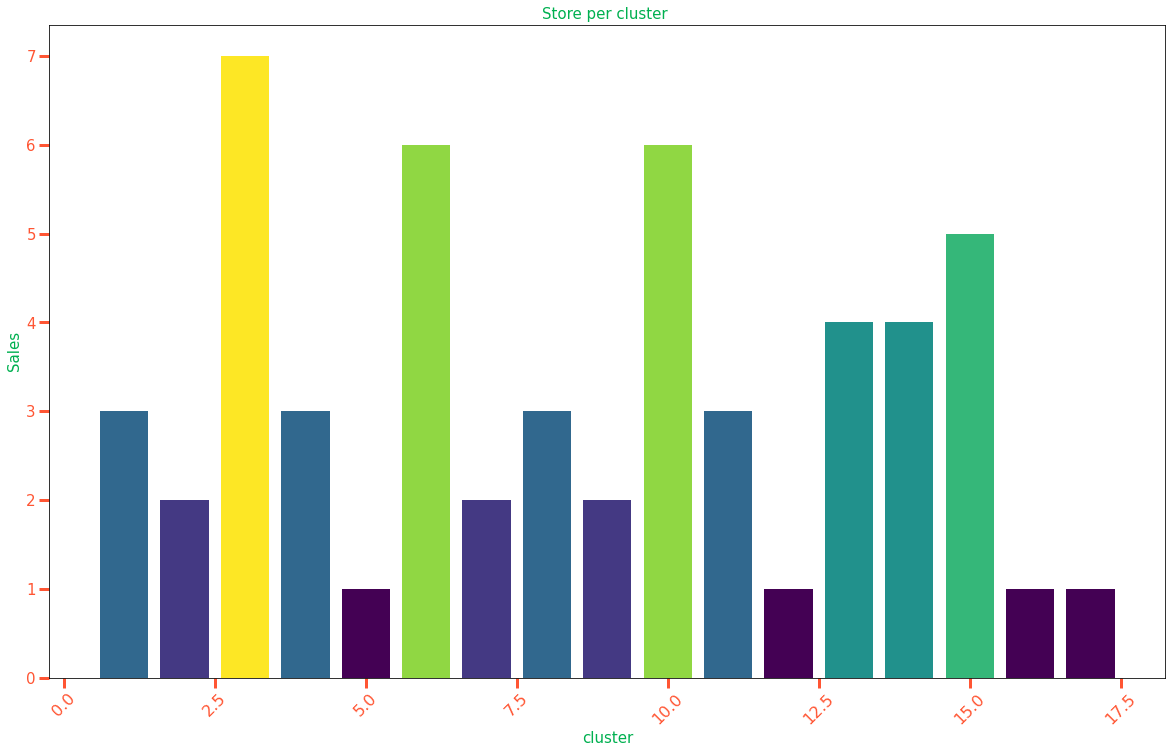

--- 0.1895601749420166 seconds ---


In [ ]:
#Group by type and sum of sales for each type
from matplotlib import pyplot as plt
start_time = time.time()

store_cluster_store = stores.groupby('cluster').size()

#Plotting type Vs unit_sales
fig, ax = plt.subplots()
fig.set_size_inches(20, 12)
plt.bar(store_cluster_store.index, store_cluster_store.values, color=color(store_cluster_store.values))
plt.xticks(rotation=45, size=16)
plt.title("Store per cluster ",fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.xlabel('cluster',fontsize=15)
plt.show()


print("--- %s seconds ---" % (time.time() - start_time))

* 54 unique stores and these are clustered into 17
unique groups
* Cluster no. 3 has maximum no. of stores followed by 6 and 10.

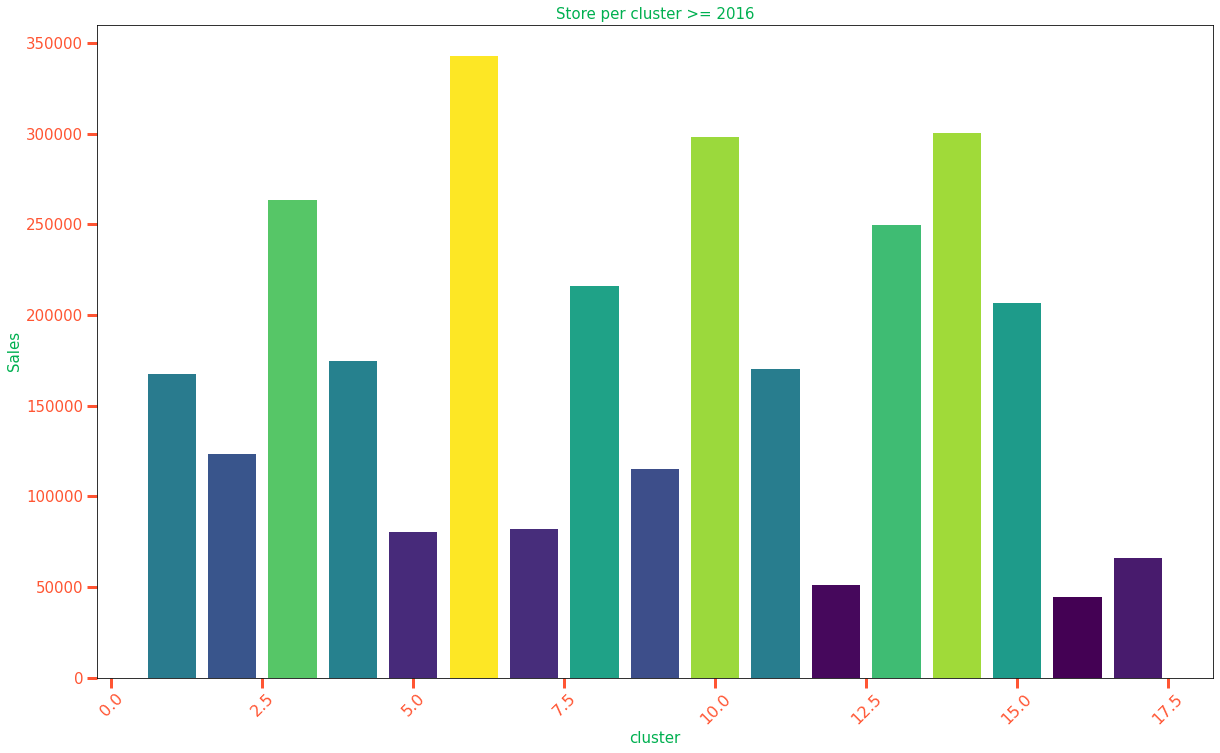

--- 0.3117046356201172 seconds ---


In [ ]:
#Group by type and sum of sales for each type
from matplotlib import pyplot as plt
start_time = time.time()

store_cluster_store_2016 = stores_2016.groupby('cluster').size()

#Plotting type Vs unit_sales
fig, ax = plt.subplots()
fig.set_size_inches(20, 12)
plt.bar(store_cluster_store_2016.index, store_cluster_store_2016.values, color=color(store_cluster_store_2016.values))
plt.xticks(rotation=45, size=16)
plt.title("Store per cluster >= 2016",fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.xlabel('cluster',fontsize=15)
plt.show()


print("--- %s seconds ---" % (time.time() - start_time))

* Cluster no. 6 has maximum no. of stores followed by 6 and 10.

#### No of sales per Cluster

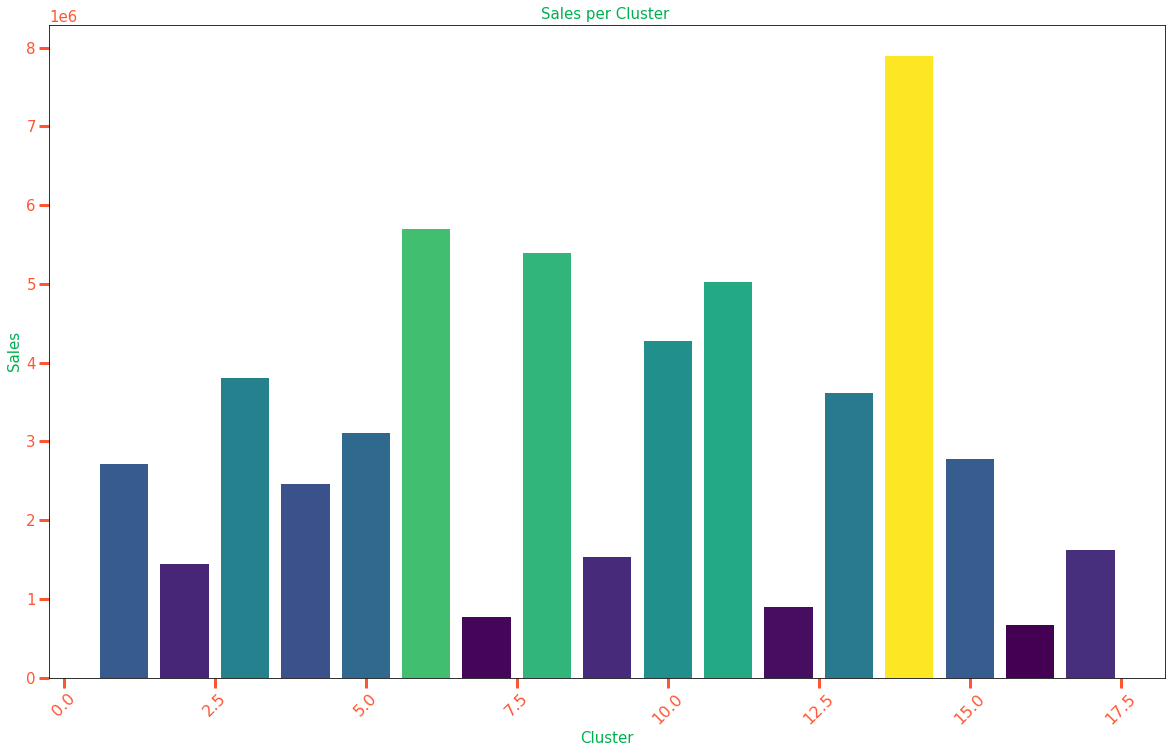

--- 1.557124137878418 seconds ---


In [ ]:
#Group by Cluster and sum of sales for each type
from matplotlib import pyplot as plt
start_time = time.time()

stores_train = train.merge(stores, how='inner', on='store_nbr')


store_cluster_unit_sales = stores_train.groupby('cluster', as_index=False).agg({'unit_sales':'sum'})

#Plotting Cluster Vs unit_sales
fig, ax = plt.subplots()
fig.set_size_inches(20, 12)
plt.bar(store_cluster_unit_sales['cluster'], store_cluster_unit_sales['unit_sales'], color=color(store_cluster_unit_sales['unit_sales']))
plt.xticks(rotation=45, size=16)
plt.title("Sales per Cluster ",fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.xlabel('Cluster',fontsize=15)
plt.show()


print("--- %s seconds ---" % (time.time() - start_time))

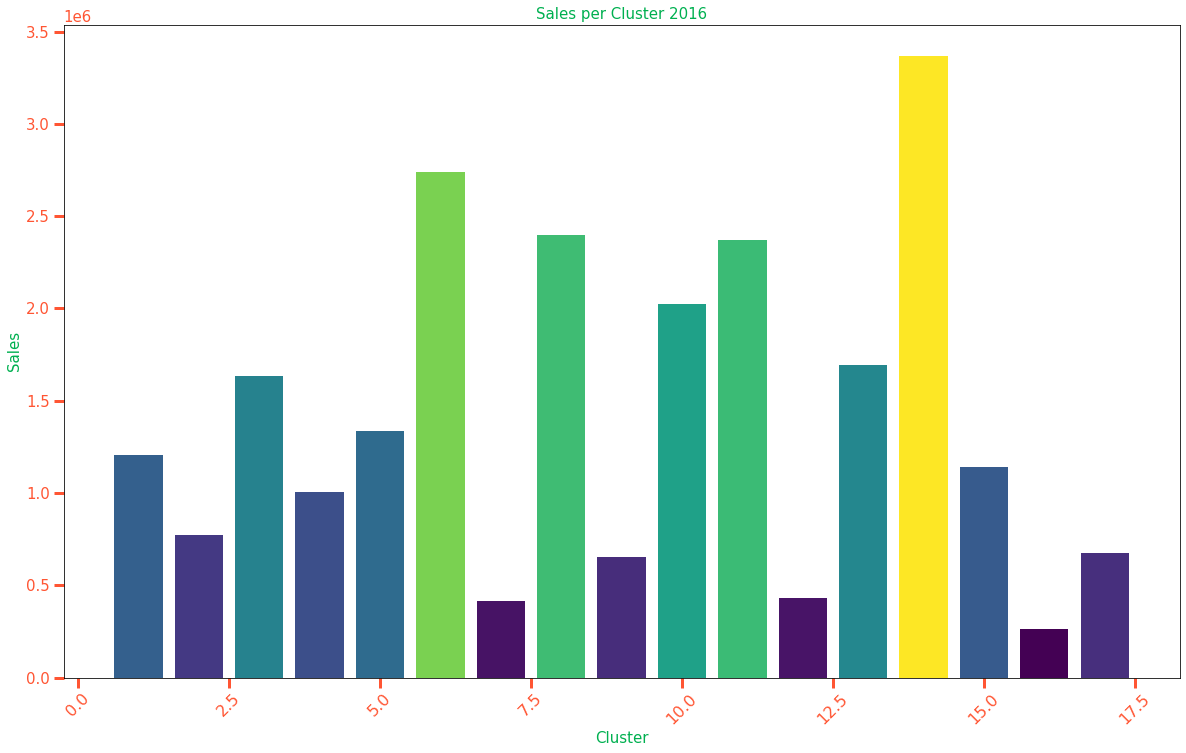

--- 0.27816271781921387 seconds ---


In [ ]:
#Group by Cluster and sum of sales for each type
from matplotlib import pyplot as plt
start_time = time.time()

store_cluster_unit_sales_2016 = stores_2016.groupby('cluster', as_index=False).agg({'unit_sales':'sum'})

#Plotting Cluster Vs unit_sales
fig, ax = plt.subplots()
fig.set_size_inches(20, 12)
plt.bar(store_cluster_unit_sales_2016['cluster'], store_cluster_unit_sales_2016['unit_sales'], color=color(store_cluster_unit_sales_2016['unit_sales']))
plt.xticks(rotation=45, size=16)
plt.title("Sales per Cluster 2016",fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.xlabel('Cluster',fontsize=15)
plt.show()


print("--- %s seconds ---" % (time.time() - start_time))

*   Cluster 14 has maximum sales.
*   Cluster 16 has minimum sales.
*   The cluster feature shows a clear variation in sales numbers.

#### Deleting all local df

In [ ]:
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

memory = sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)
# Get a sorted list of the objects and their sizes
print(f'Numbers of var in memory is = {len(memory)}')
memory

Numbers of var in memory is = 43


[('train', 285942500),
 ('stores_train', 175779606),
 ('items_train', 175778872),
 ('stores_2016', 82722138),
 ('items_2016', 82721404),
 ('df_train', 70912612),
 ('train_2016', 70912612),
 ('items', 68924),
 ('per_year_df', 8026),
 ('stores', 4760),
 ('stores_2016_city', 2309),
 ('stores_city', 2181),
 ('stores_state_sales', 1901),
 ('store_state', 1773),
 ('stores_state', 1773),
 ('store_type_unit_sales', 651),
 ('store_type_store', 523),
 ('memory', 488),
 ('promotion_sales', 303),
 ('store_cluster_unit_sales', 297),
 ('store_cluster_unit_sales_2016', 297),
 ('for_hist', 288),
 ('store_cluster_store', 288),
 ('store_cluster_store_2016', 288),
 ('color', 136),
 ('column_info', 136),
 ('df_info', 136),
 ('find_nan_values', 136),
 ('import_data', 136),
 ('reduce_mem_usage', 136),
 ('mlp', 72),
 ('np', 72),
 ('pd', 72),
 ('plt', 72),
 ('sns', 72),
 ('ax', 48),
 ('ax_1', 48),
 ('ax_2', 48),
 ('ax_3', 48),
 ('ax_4', 48),
 ('fig', 48),
 ('year', 32),
 ('start_time', 24)]

In [ ]:
try:
    del stores_city
    del train_2016
    del stores_2016
    del stores_2016_city
    del stores_state
    del stores_state_sales
    del store_type_store
    del store_type_unit_sales
    del store_cluster_store
    del store_cluster_store_2016
    del stores_train
    del store_cluster_unit_sales
    del store_cluster_unit_sales_2016
except:
    pass

In [ ]:
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

memory = sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)
# Get a sorted list of the objects and their sizes
print(f'Numbers of var in memory is = {len(memory)}')
memory

Numbers of var in memory is = 30


[('train', 285942500),
 ('items_train', 175778872),
 ('items_2016', 82721404),
 ('df_train', 70912612),
 ('items', 68924),
 ('per_year_df', 8026),
 ('stores', 4760),
 ('store_state', 1773),
 ('memory', 368),
 ('promotion_sales', 303),
 ('for_hist', 288),
 ('color', 136),
 ('column_info', 136),
 ('df_info', 136),
 ('find_nan_values', 136),
 ('import_data', 136),
 ('reduce_mem_usage', 136),
 ('mlp', 72),
 ('np', 72),
 ('pd', 72),
 ('plt', 72),
 ('sns', 72),
 ('ax', 48),
 ('ax_1', 48),
 ('ax_2', 48),
 ('ax_3', 48),
 ('ax_4', 48),
 ('fig', 48),
 ('year', 32),
 ('start_time', 24)]

### Items EDA

In [ ]:
### Description of the products

items = import_data('items.csv')
items.head()

Memory usage of dataframe is 0.13 MB
Memory usage after optimization is: 0.03 MB
Decreased by 73.9%
-----------------Shape---------------------
No. of  Datapoints --> 4100
No. of Features --> 4
-------------------Info---------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   item_nbr    4100 non-null   int32   
 1   family      4100 non-null   category
 2   class       4100 non-null   int16   
 3   perishable  4100 non-null   int8    
dtypes: category(1), int16(1), int32(1), int8(1)
memory usage: 33.5 KB
Info of DataFrame: None
---------------Duplicates-------------------
No. of  duplicates --> 0
------------------Nan------------------------
No Column has Nan Values


,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [ ]:
items.describe()

,item_nbr,class,perishable
count,4100.00,4100.00,4100.00
mean,1251436.31,2169.65,0.24
std,587687.22,1484.91,0.43
min,96995.00,1002.00,0.00
25%,818110.75,1068.00,0.00
50%,1306197.50,2004.00,0.00
75%,1904918.00,2990.50,0.00
max,2134244.00,7780.00,1.00


In [ ]:
items_train = train.merge(items, how='inner', on='item_nbr')
items_train

,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable
0,2013-01-01,25,257847,90.00,-1.00,BEVERAGES,1120,0
1,2013-01-02,14,257847,15.00,-1.00,BEVERAGES,1120,0
2,2013-01-02,13,257847,1.00,-1.00,BEVERAGES,1120,0
3,2013-01-02,47,257847,73.00,-1.00,BEVERAGES,1120,0
4,2013-01-03,30,257847,144.00,-1.00,BEVERAGES,1120,0
...,...,...,...,...,...,...,...,...
6274847,2017-08-15,44,2122868,7.00,0.00,GROCERY I,1088,0
6274848,2017-08-13,44,2123859,4.00,0.00,"LIQUOR,WINE,BEER",1318,0
6274849,2017-08-15,8,2121610,1.00,0.00,GROCERY I,1036,0
6274850,2017-08-15,47,2114752,1.00,0.00,GROCERY I,1034,0


In [ ]:
train_2016 = train[train['date'].dt.year >= 2016]


items_2016 = train_2016.merge(items, how='inner', on='item_nbr')
items_2016

,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable
0,2016-01-01,25,361502,6.00,0.00,GROCERY I,1036,0
1,2016-01-03,23,361502,2.00,0.00,GROCERY I,1036,0
2,2016-01-03,17,361502,3.00,0.00,GROCERY I,1036,0
3,2016-01-04,47,361502,1.00,0.00,GROCERY I,1036,0
4,2016-01-04,3,361502,5.00,0.00,GROCERY I,1036,0
...,...,...,...,...,...,...,...,...
2951366,2017-08-15,44,2122868,7.00,0.00,GROCERY I,1088,0
2951367,2017-08-13,44,2123859,4.00,0.00,"LIQUOR,WINE,BEER",1318,0
2951368,2017-08-15,8,2121610,1.00,0.00,GROCERY I,1036,0
2951369,2017-08-15,47,2114752,1.00,0.00,GROCERY I,1034,0


#### No. of items per family

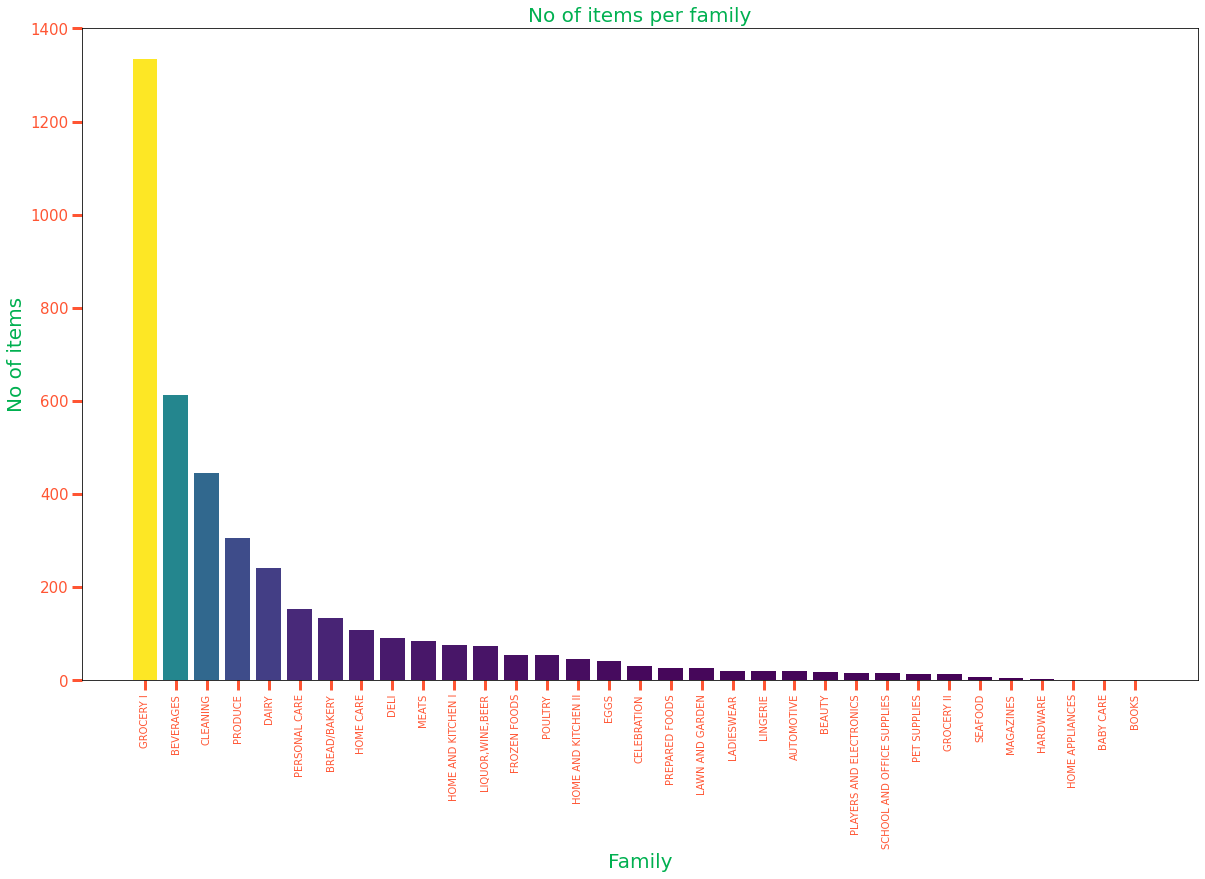

--- 0.38146543502807617 seconds ---


In [ ]:
### Distribution of items by family
from matplotlib import pyplot as plt
start_time = time.time()

fig = plt.figure()
fig.set_size_inches(20, 12)


### by family
items_family = items.groupby('family').size().sort_values(ascending=False)
plt.bar(items_family.index, items_family.values, color=color(items_family.values))
plt.xticks(rotation=90, size=10)

plt.title('No of items per family',fontsize=20)
plt.ylabel('No of items',fontsize=20)
plt.xlabel('Family',fontsize=20)

plt.show()

print("--- %s seconds ---" % (time.time() - start_time))

#### No. of sales per family

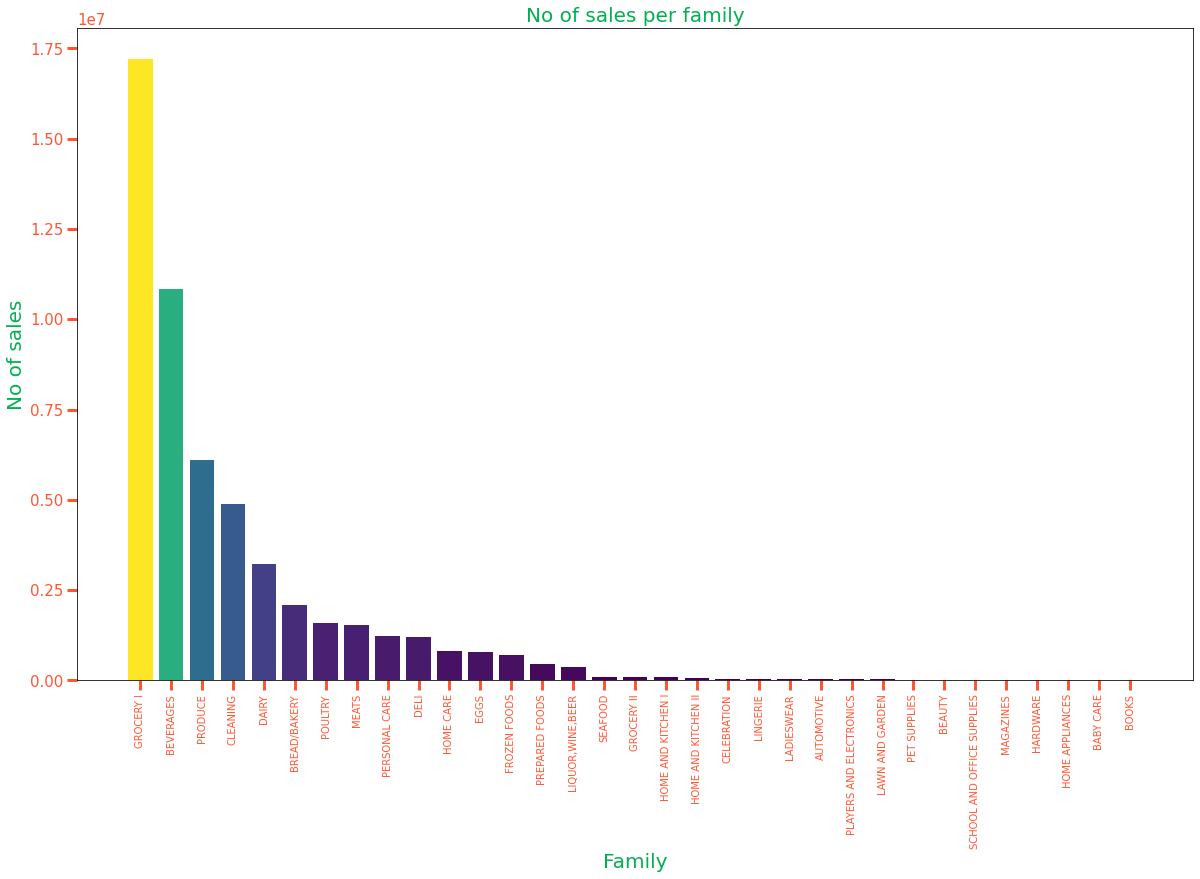

--- 0.45361900329589844 seconds ---


In [ ]:
### Distribution of sales by family
from matplotlib import pyplot as plt
start_time = time.time()

fig = plt.figure()
fig.set_size_inches(20, 12)


### by family
items_family_sales = items_train.groupby('family', as_index=False).agg({'unit_sales':'sum'}).sort_values(by='unit_sales', ascending=False)
plt.bar(items_family_sales['family'], items_family_sales['unit_sales'], color=color(items_family_sales['unit_sales']))
plt.xticks(rotation=90, size=10)

plt.title('No of sales per family',fontsize=20)
plt.ylabel('No of sales',fontsize=20)
plt.xlabel('Family',fontsize=20)

plt.show()

print("--- %s seconds ---" % (time.time() - start_time))

#### No. of items per class

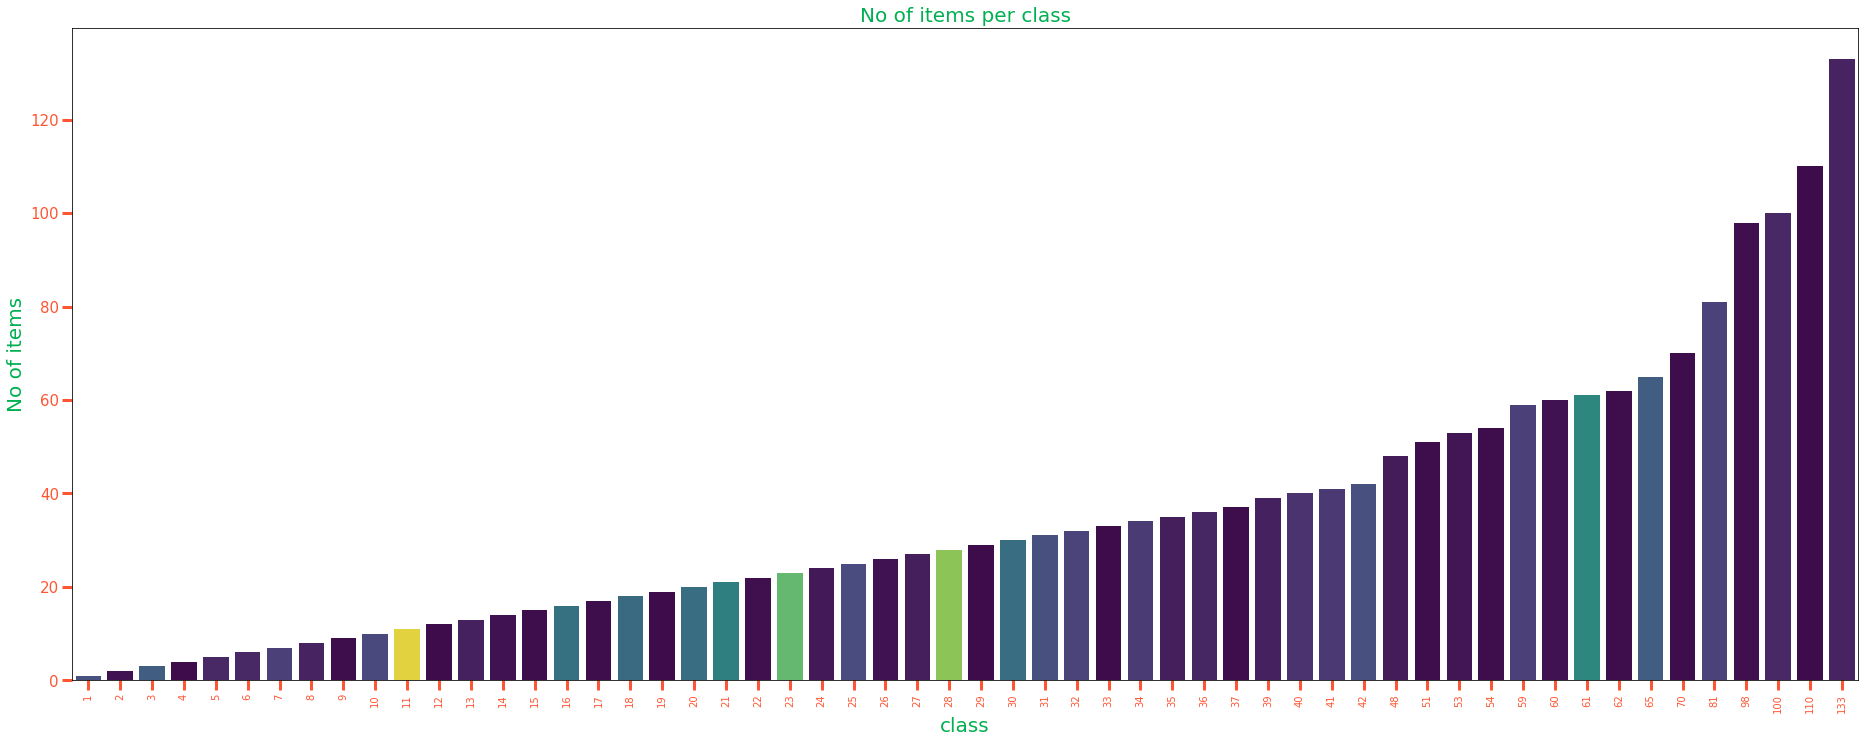

--- 1.5113489627838135 seconds ---


In [ ]:
### Distribution of items by class
from matplotlib import pyplot as plt
start_time = time.time()

fig = plt.figure()
fig.set_size_inches(32, 12)


### by class
items_class = items.groupby('class').size()
# plt.bar(items_class.index, items_class.values, items_class, color=color(items_class.values))
sns.barplot(x=items_class.index, y=items_class.values, data=items_class, palette=color(items_class.values))

plt.xticks(rotation=90, size=10)

plt.title('No of items per class',fontsize=20)
plt.ylabel('No of items',fontsize=20)
plt.xlabel('class',fontsize=20)

plt.show()

print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
items_class.values

array([ 31,   4,  39,   1,  12,  12,  22,  10,   2,  26, 133,   1,   9,
         4,   2,  54,   2,  48,   1,  51,  65,   3,  98,   6,  27,   4,
         8, 110,   1,  51,  30,  24,   1,  20,   8,  11,   2,   9,  16,
        19,  30,   7,   2,   5,   2,  22,   4,  70,   2,  39,   2,  23,
         3,  12,   1,  10,   7,   1,  20,  17,   3,  17,   1,  19,   5,
        15,  18,  42,   2,  18,  26,  61,  81, 100,  36,  21,  27,   9,
        37,  35,   7,  62,   1,   4,   1,   2,   1,  40,  14,   2,   1,
         4,   2,   2,   1,  32,   2,   2,   1,   8,   2,   1,   3,   2,
         1,   1,   4,   2,   9,  16,  41,  34,   8,  15,  14,  27,  31,
        14,   8,   1,  17,  33,   9,  19,   7,   1,   2,   9,   1,   6,
         8,  11,   5,  30,   1,  25,  10,  10,   9,   6,   2,  16,   7,
        18,   4,  21,  18,  20,   5,   3,   6,   1,   7,   6,   4,  11,
        11,   1,   1,   4,  59,   9,  13,   1,   2,   1,  17,  36,  36,
         2,   3,  10,  16,  19,   1,   2,  23,   2,   4,   4,   

In [ ]:
items_class.index

Int64Index([1002, 1003, 1004, 1005, 1006, 1008, 1010, 1012, 1013, 1014,
            ...
            6920, 6922, 6924, 6936, 6954, 6960, 7002, 7016, 7034, 7780],
           dtype='int64', name='class', length=337)

#### No. of sales per class

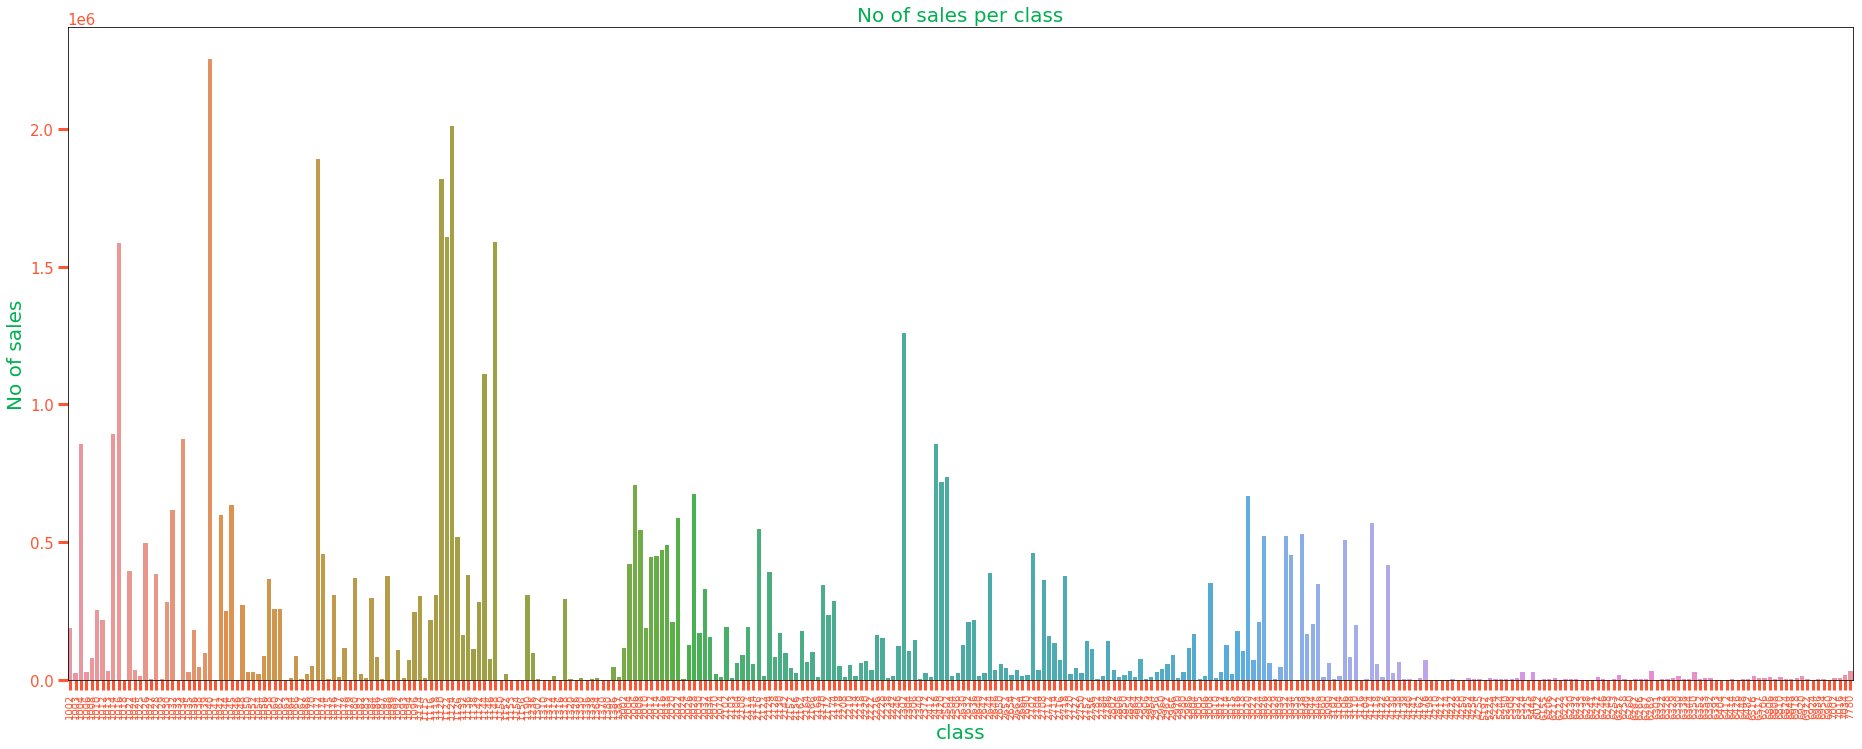

--- 4.819667816162109 seconds ---


In [ ]:
### Distribution of sales by class
from matplotlib import pyplot as plt
start_time = time.time()

fig = plt.figure()
fig.set_size_inches(32, 12)


### by family
items_class_sales = items_train.groupby('class', as_index=False).agg({'unit_sales':'sum'}).sort_values(by='unit_sales', ascending=False)
ax = sns.barplot(x = items_class_sales['class'], y=items_class_sales['unit_sales'], data=items_class_sales)
plt.xticks(rotation=90, size=10)

plt.title('No of sales per class',fontsize=20)
plt.ylabel('No of sales',fontsize=20)
plt.xlabel('class',fontsize=20)

plt.show()

print("--- %s seconds ---" % (time.time() - start_time))

#### No. of items per perishable

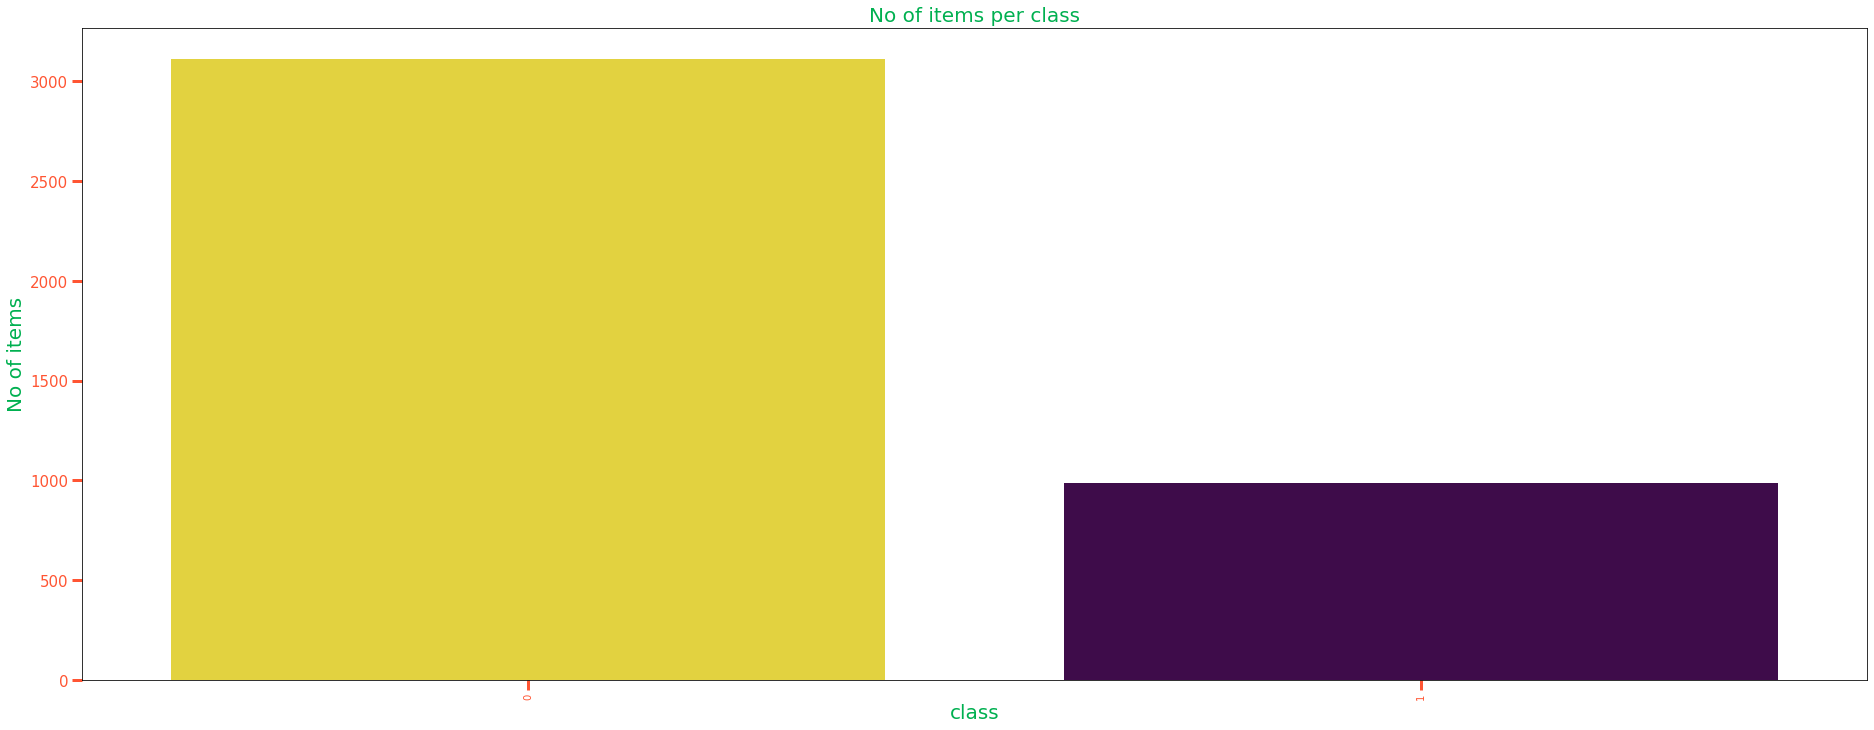

--- 0.16021251678466797 seconds ---


In [ ]:
### Distribution of items by class
from matplotlib import pyplot as plt
start_time = time.time()

fig = plt.figure()
fig.set_size_inches(32, 12)


### by class
items_perishable = items.groupby('perishable').size()
ax = sns.barplot(x = items_perishable.index, y=items_perishable.values, data=items_perishable_sales, palette=color(items_perishable.values))
plt.xticks(rotation=90, size=10)

plt.title('No of items per class',fontsize=20)
plt.ylabel('No of items',fontsize=20)
plt.xlabel('class',fontsize=20)

plt.show()

print("--- %s seconds ---" % (time.time() - start_time))

#### No. of sales per perishable

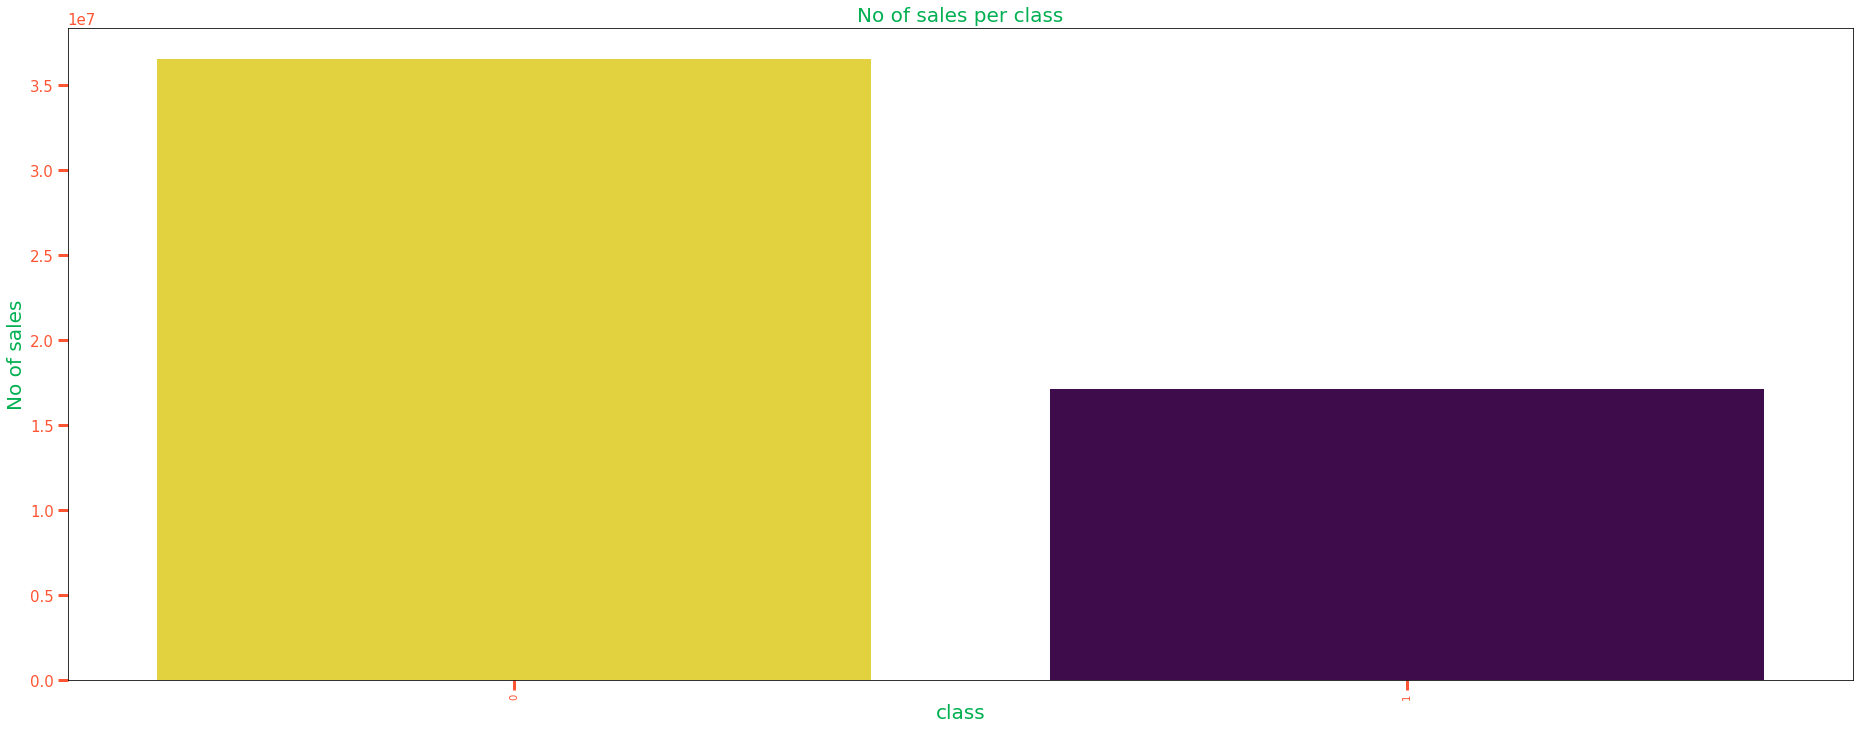

--- 0.35069966316223145 seconds ---


In [ ]:
### Distribution of sales by class
from matplotlib import pyplot as plt
start_time = time.time()

fig = plt.figure()
fig.set_size_inches(32, 12)


### by family
items_perishable_sales = items_train.groupby('perishable', as_index=False).agg({'unit_sales':'sum'}).sort_values(by='unit_sales', ascending=False)
ax = sns.barplot(x = items_perishable_sales['perishable'], y=items_perishable_sales['unit_sales'], data=items_perishable_sales, palette=color(items_perishable_sales['unit_sales']))
plt.xticks(rotation=90, size=10)

plt.title('No of sales per class',fontsize=20)
plt.ylabel('No of sales',fontsize=20)
plt.xlabel('class',fontsize=20)

plt.show()

print("--- %s seconds ---" % (time.time() - start_time))

#### Deleting all local df

In [ ]:
try:
    del items_family
    del items_family_sales
    del items_class
    del items_class_sales
    del items_perishable
    del items_perishable_sales
except:


### Oil EDA

In [ ]:
### Oil quotes

oil = pd.read_csv('oil.csv')
find_nan_values(oil)

print(f"DataFrame shape is {oil.shape}")

oil.head()

No. of Nan Values in 'dcoilwtico' column --> 43
3.53 % of Total values


DataFrame shape is (1218, 2)


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


#### Oil price over Date

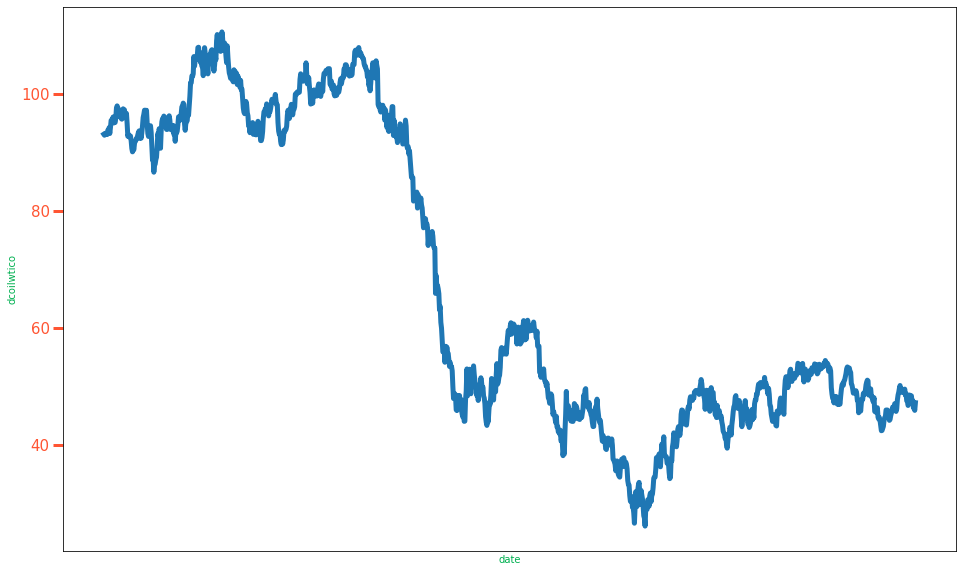

--- 1.720479965209961 seconds ---


In [ ]:
from matplotlib import pyplot as plt
start_time = time.time()


df_oil = oil.copy(deep=True)
fig = plt.figure()
fig.set_size_inches(16, 10)

df_oil = df_oil.fillna(method='ffill')#, inplace=True)

sns.lineplot(data=df_oil,
             x='date',
             y='dcoilwtico')


plt.xticks([])

plt.show()
print("--- %s seconds ---" % (time.time() - start_time))


* The oil price reaches its peak around Sep. 2013 with around $110 .
* From July 2014, the oil price started decreasing drastically until March 2015.
* From July 2016 to July 2017 the oil price is relatively stable.



#### Oil Price and Unit Sales over Date


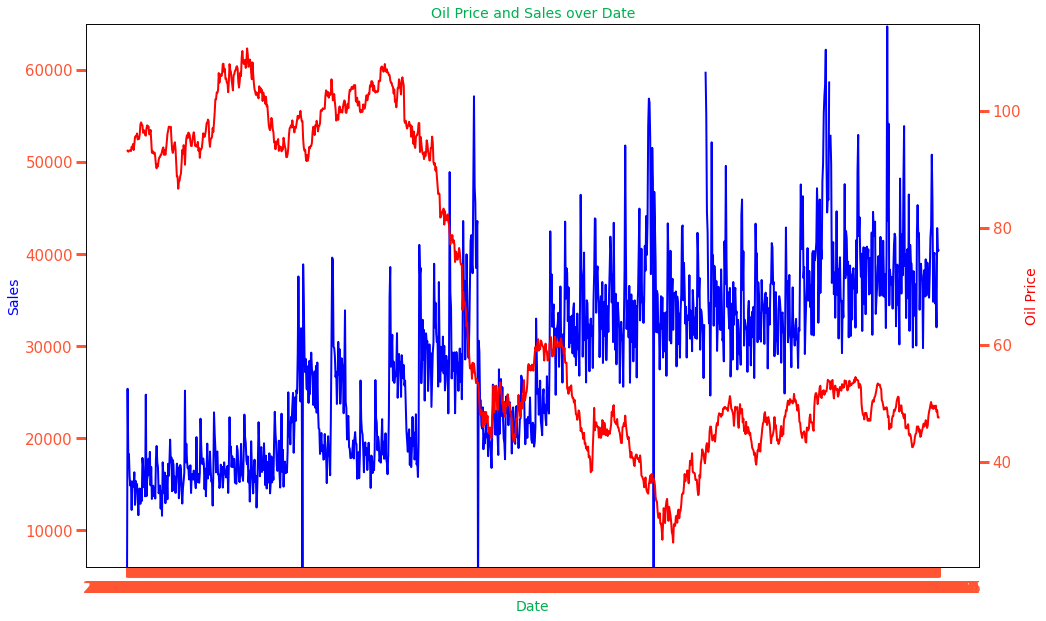

--- 14.948369979858398 seconds ---


In [ ]:
from matplotlib import pyplot as plt
start_time = time.time()


fig, ax = plt.subplots()
fig.set_size_inches(16, 10)

tmp_oil = train.groupby('date', as_index=False)['unit_sales'].sum()
tmp_oil = tmp_oil.merge(df_oil, how='inner', on='date')

ax.plot(tmp_oil['date'], tmp_oil['unit_sales'], color="blue", linewidth=2)  # make a plot with different y-axis using second axis object


ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Sales",color="blue",fontsize=14)
ax.set_ylim([6000, 65000])

ax2=ax.twinx()   # twin object for two different y-axis on the sample plot
ax2.plot(tmp_oil['date'], tmp_oil['dcoilwtico'], color="red", linewidth=2)
ax2.set_ylabel("Oil Price",color="red",fontsize=14)

plt.title('Oil Price and Sales over Date',fontsize=14)
plt.show()

print("--- %s seconds ---" % (time.time() - start_time))

# ax2.plot(x.date, x.unit_sales,color="blue")  # make a plot with different y-axis using second axis object
# ax2.set_ylabel("Sales",color="blue",fontsize=14)
# plt.title('Oil Price and Sales over Date',fontsize=14)
# plt.show()

* By analyzing the above plot it is hard to interpret any pattern between unit_sales and oil price. i.e. oil price and unit_sales are not ,uch related

### Holidays_events EDA

In [6]:
### Праздничные дни

df_holidays_events = pd.read_csv('holidays_events.csv')
find_nan_values(holidays_events)

print(f"DataFrame shape is {holidays_events.shape}")

holidays_events.head()

No Column has Nan Values
DataFrame shape is (350, 6)


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


#### No. of Holidays per Locale

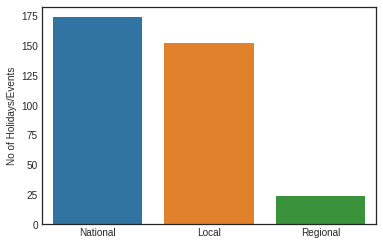

In [ ]:
#Fetching no.of days for each locale
holidays=df_holidays_events.locale.value_counts().to_frame()

##Plotting Locale Vs no_of_days
fig, ax = plt.subplots()
ax = sns.barplot(x = holidays.index, y= "locale",data=holidays)
plt.title('No of Holidays/Events per Locale',fontsize=14)
plt.xlabel('Locale',fontsize=14)
plt.ylabel('No of Holidays/Events',fontsize=14)
plt.show()

* Most no. of Holidays/Events are National followed by Local.


#### Sales per Locale

In [ ]:
#Merging sales and holidays dataframe
holiday_sales_2016=df_2016.merge(df_holidays_events, how='inner', on='date')

holiday_sales_2016=reduce_mem_usage(holiday_sales_2016)

holiday_sales_2016.head()

Memory usage of Dataframe is 551.520 MB



Memory usage after optimization is: 291.522 MB
Decreased by 47.1%


,id,date,store_nbr,item_nbr,unit_sales,onpromotion,type,locale,locale_name,description,transferred
0,66458908,2016-01-01,25,105574,12.0,0.0,Holiday,National,Ecuador,Primer dia del ano,0.0
1,66458909,2016-01-01,25,105575,9.0,0.0,Holiday,National,Ecuador,Primer dia del ano,0.0
2,66458910,2016-01-01,25,105857,3.0,0.0,Holiday,National,Ecuador,Primer dia del ano,0.0
3,66458911,2016-01-01,25,108634,3.0,0.0,Holiday,National,Ecuador,Primer dia del ano,0.0
4,66458912,2016-01-01,25,108701,2.0,1.0,Holiday,National,Ecuador,Primer dia del ano,0.0


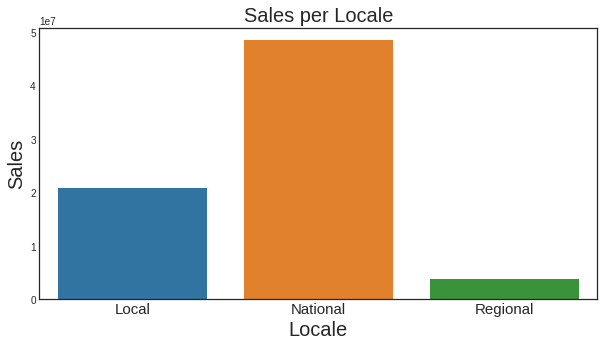

In [ ]:
#Group by locale and sum of sales for each locale
x = holiday_sales_2016.groupby(['locale'], as_index=False).agg({'unit_sales':'sum'})

#Plotting locale Vs unit_sales
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax = sns.barplot(x = x.locale, y= "unit_sales", data = x)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 15)
plt.ylabel('Sales', fontsize= 20)
plt.xlabel('Locale', fontsize= 20)
plt.title('Sales per Locale',fontsize= 20)
plt.show()

* Maximum sales happens on National Holidays/Events followed Local Holidays/Events

#### No. of Holidays per Locale Name

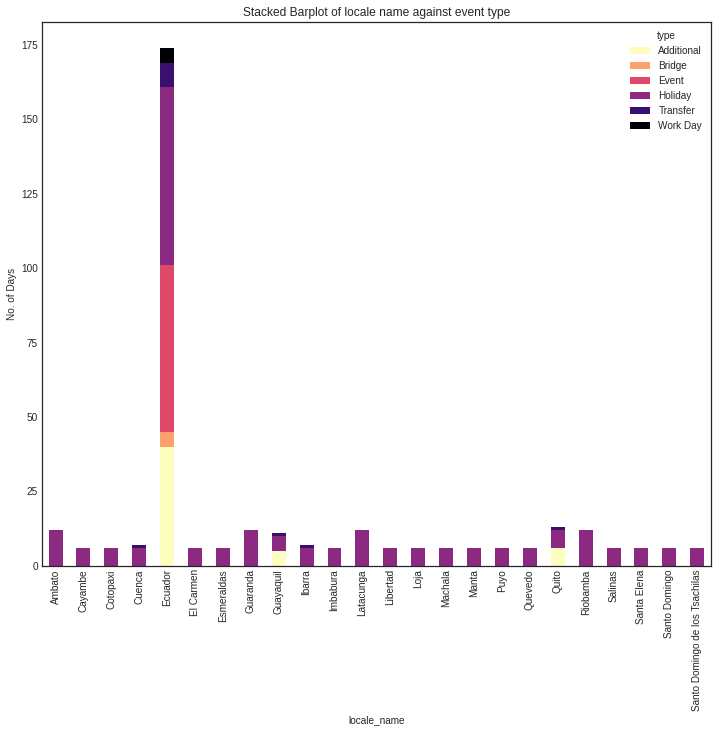

In [ ]:
#Group by locale_name,type
x = df_holidays_events.groupby(['locale_name', 'type']).size()

#Plotting stacked barplot of Locale_name and type Vs no_of_days
x.unstack().plot(kind='bar',stacked=True, colormap= 'magma_r', figsize=(12,10),  grid=False)
plt.title('Stacked Barplot of locale name against event type')
plt.ylabel('No. of Days')
plt.show()

* Ecuador have most no. of holidays/events of all types.
* Most locales have similar no. and type of holidays

#### Sales per Locale Name

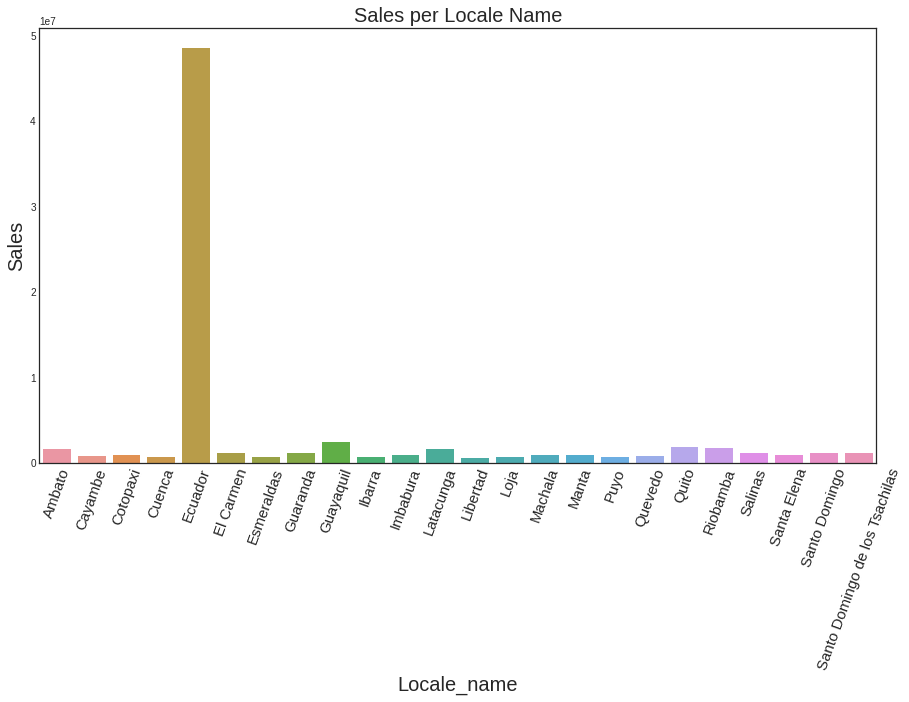

In [ ]:
#Group by locale_name and sum of sales for each locale_name
x = holiday_sales_2016.groupby(['locale_name'], as_index=False).agg({'unit_sales':'sum'})

#Plotting locale_name Vs unit_sales
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax = sns.barplot(x = x.locale_name, y= "unit_sales", data = x)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 70, fontsize = 15)
plt.ylabel('Sales', fontsize= 20)
plt.xlabel('Locale_name', fontsize= 20)
plt.title('Sales per Locale Name',fontsize= 20)
plt.show()

* Ecuador has maximum sales.
* Most locales have similar sales.

#### No. of Days per Type

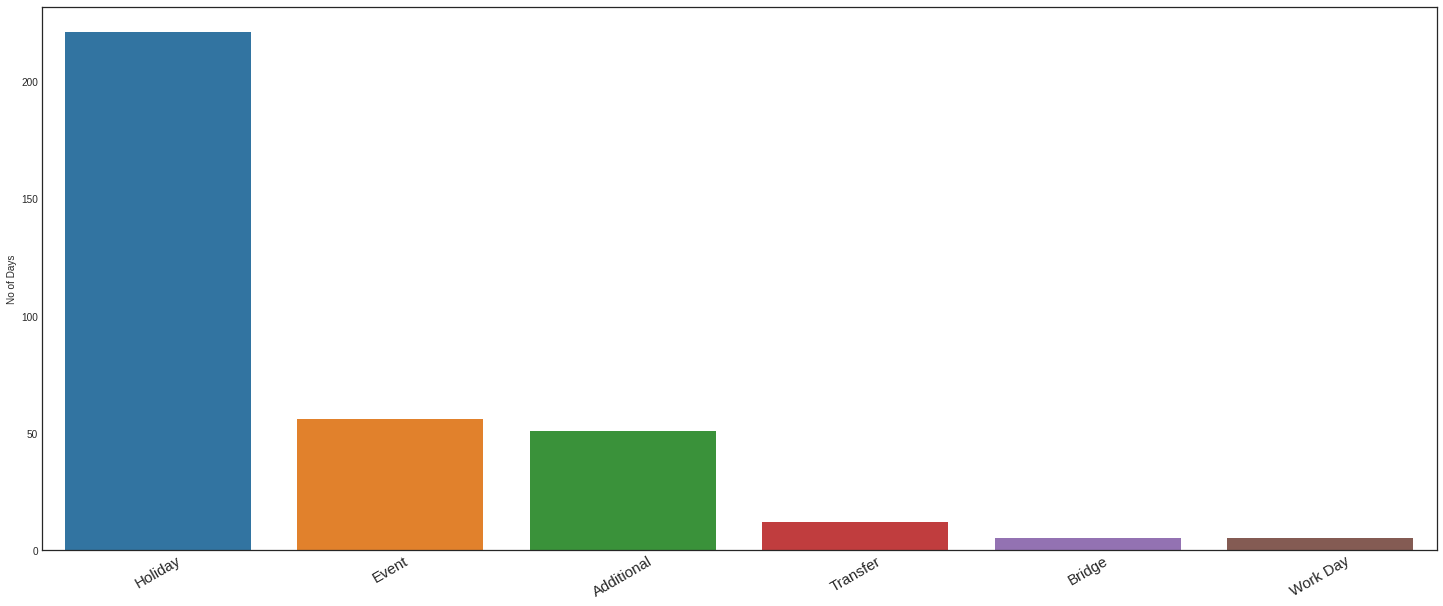

In [ ]:
#Fetching no.of days for each holiday type
holidays = df_holidays_events.type.value_counts().to_frame()

#Plotting holiday type Vs no_of_days
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
ax = sns.barplot(x = holidays.index, y= "type",data=holidays)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30, fontsize = 15)
plt.ylabel('No of Days')
plt.show()

*  Most no. of special days are of type Holiday.
* Bridge type and Work Day type has equal number of days.As bridge is extra holiday that are added to get a long break weekend. And those holiday needed to be pay back by 'Work Day'.
* The transfer type means officially that day is not a holiday, but some holiday is transferred to that day. (Those whose 'transferred' is true. )

#### Sales per Type

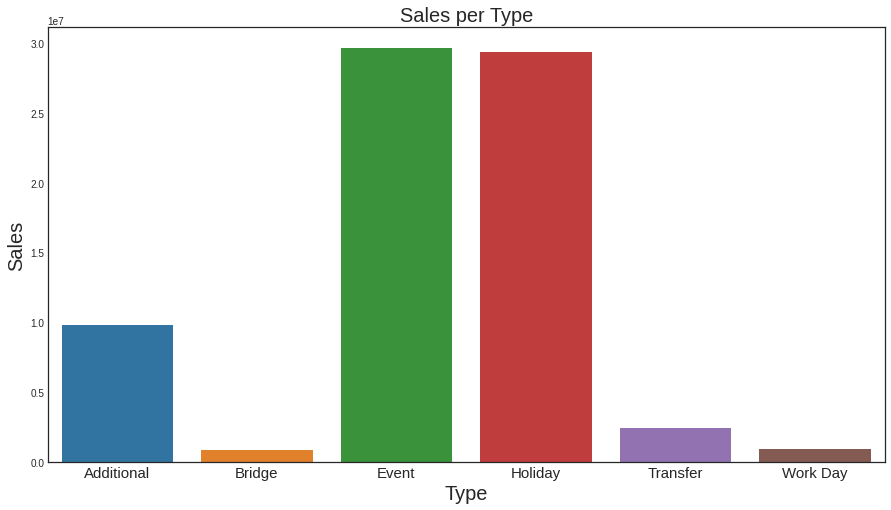

In [ ]:
#Group by holiday type  and sum of unit_sales for each holiday type
x = holiday_sales_2016.groupby(['type'], as_index=False).agg({'unit_sales':'sum'})

#Plotting holiday type Vs unit_sales
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax = sns.barplot(x = x.type, y= "unit_sales", data = x)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 15)
plt.ylabel('Sales', fontsize= 20)
plt.xlabel('Type', fontsize= 20)
plt.title('Sales per Type',fontsize= 20)
plt.show()

* Special Days of type Holiday and Event have higher sales as compared to other types.
* Bridge and Work day have lowest Sales

#### No. of Holidays Transferred/Non-Transferred

In [ ]:
#Pie plot showing information about transferred column

x=go.Pie( labels = df_holidays_events.transferred.value_counts().index,
    values = df_holidays_events.transferred.value_counts().values,
    domain = dict(x=[0.52, 1], y=[0.51, 1]),
    showlegend = False,
    text = ['False', 'True'],
    hoverinfo="text+percent",
    textinfo="text+value",
    hole = 0.3
)

holiday_layout = dict(
    width=800, height=800,
    annotations= [


        dict(
            font=dict(
                size=15,
                family="Droid Sans"
            ),
            text = "Transferred",
            x = 0.82, y=0.78,
            showarrow=False
        )


    ]
)
x = go.Figure(data=x,layout = holiday_layout)

py.iplot(x)



*  The majority of holidays/events are not transferred.

* The transfer type means officially that day is not a holiday, but some holiday is transferred to that day. (Those whose 'transferred' is true. ) Therefore, 12 holiday have 'transferred' as true, and 12 holiday has 'type' as 'transfer'.

#### Sales for Transferred/Non-Transferred Holidays

In [ ]:
# Changing datatype of transferred column to integer
holiday_sales_2016['transferred']=holiday_sales_2016['transferred'].astype(int)

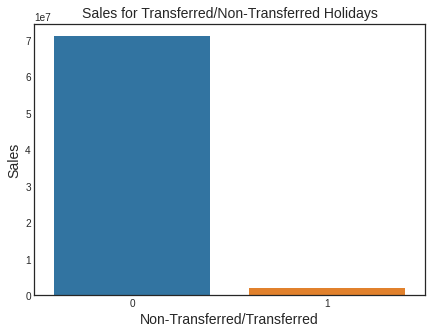

In [ ]:
#Group by transferred feature and sum of unit_sales for each transferred type i.e. 0 or 1
x = holiday_sales_2016.groupby(['transferred'], as_index=False).agg({'unit_sales':'sum'})
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
ax = sns.barplot(x = x.transferred, y= "unit_sales", data = x)
plt.ylabel('Sales', fontsize= 14)
plt.xlabel('Non-Transferred/Transferred', fontsize= 14)
plt.title('Sales for Transferred/Non-Transferred Holidays',fontsize= 14)
plt.show()

* Sales for non-transferred days are high(as no. of non-transferred days are far more than transferred days)

### Transactions EDA

In [ ]:
#Reading transactions.csv

df_transactions = import_data('transactions.csv')
df_transactions .head()

Memory used by Transactions Dataframe --> 1.911 MB


,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [ ]:
### Праздничные дни

df_holidays_events = pd.read_csv('transactions.csv')
find_nan_values(holidays_events)

print(f"DataFrame shape is {holidays_events.shape}")

holidays_events.head()

Memory usage of dataframe is 1.91 MB
Memory usage after optimization is: 0.47 MB
Decreased by 75.2%
-----------------Shape---------------------
No. of  Datapoints --> 83488
No. of Features --> 3
-------------------Info---------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   date          83488 non-null  category
 1   store_nbr     83488 non-null  int8    
 2   transactions  83488 non-null  int16   
dtypes: category(1), int16(1), int8(1)
memory usage: 485.5 KB
Info of DataFrame: None
---------------Duplicates-------------------
No. of  duplicates --> 0
------------------Nan------------------------
No Column has Nan Values


,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


#### Checking Missing Values

In [ ]:
#Checking which columns have Nan values
find_nan_values(df_transactions)

No Column has Nan Values


#### No. of transactions per Month for Every Year

In [ ]:
import calendar
#Adding year , month and day of week as features
df_transactions["year"] = df_transactions["date"].dt.year
df_transactions["month"] = df_transactions["date"].dt.month
df_transactions['day_of_week'] = df_transactions['date'].dt.day_name()


df_transactions["year"] = df_transactions["year"].astype(str)
df_transactions.head()


,date,store_nbr,transactions,year,month,day_of_week
0,2013-01-01,25,770,2013,1,Tuesday
1,2013-01-02,1,2111,2013,1,Wednesday
2,2013-01-02,2,2358,2013,1,Wednesday
3,2013-01-02,3,3487,2013,1,Wednesday
4,2013-01-02,4,1922,2013,1,Wednesday


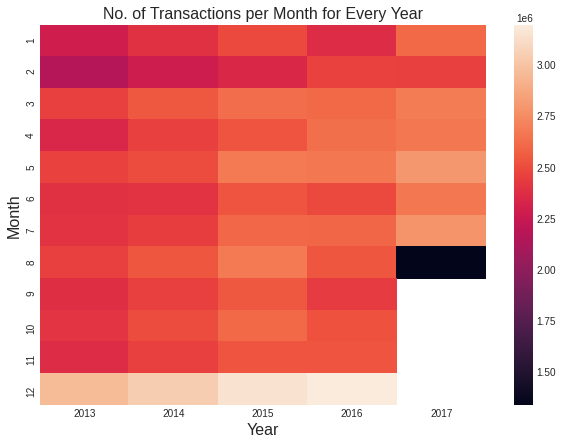

In [ ]:
# Group by month, year and sum of transactions
x = df_transactions.groupby(['month', 'year'], as_index=False).agg({'transactions':'sum'})

#Plotting heat map of month , year and no. of transactions
y = x.pivot("month", "year", "transactions")
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(y)
plt.xlabel('Year', fontsize= 16)
plt.ylabel('Month', fontsize= 16)
plt.title("No. of Transactions per Month for Every Year",fontsize= 16)
plt.show()

del x






*  December has the most transactions for all years
*  With passing years, the squares are getting lighter, which indicates that the no. of transactions are increasing each year.

Note : Since we don´t have data after 15th August 2017 those squares appear blank.



#### No. of transactions per Day of Week for Every Year

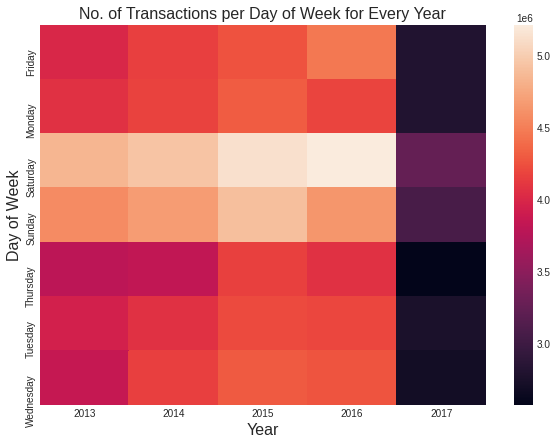

In [ ]:
# Group by day_of_week, year and sum of transactions
x = df_transactions.groupby(['day_of_week', 'year'], as_index=False).agg({'transactions':'sum'})

#Plotting heat map of day_of_week , year and no. of transactions
y = x.pivot("day_of_week", "year", "transactions")
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(y)
plt.xlabel('Year', fontsize= 16)
plt.ylabel('Day of Week', fontsize= 16)
plt.title("No. of Transactions per Day of Week for Every Year",fontsize= 16)

del x


* Saturday has the maximum no. of transactions followed by Saturday (i.e. Weekends seem to be prefered as compared to Weekdays to shop at this supermaket.)
* Saturday has more transactions than Sunday, But Sunday has higher sales than Saturday which means customers return products on Saturday.

Note : Year 2017 does not have 4 months of data, thats's why it appears that 2017 is performing worse as compared to other years.


#### No. of transactions per Store

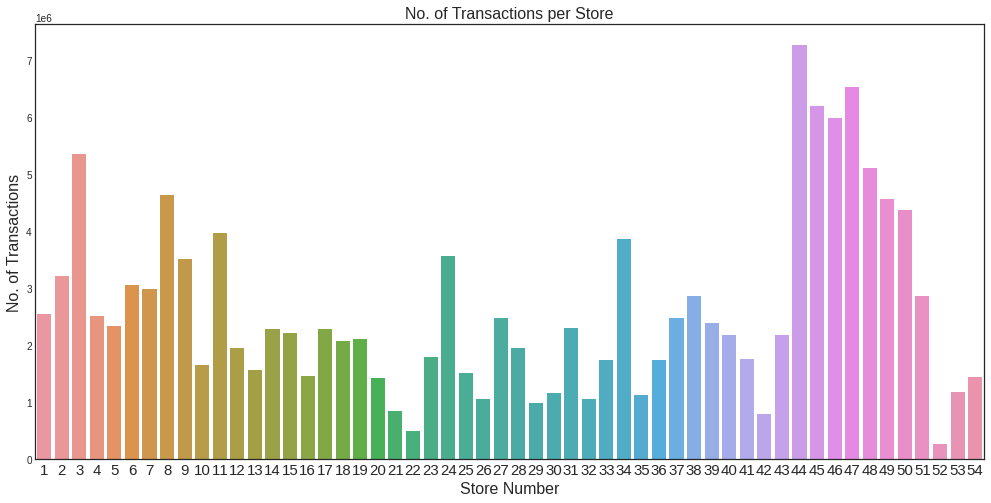

In [ ]:
# Group by store_nbr and sum of transactions for each store_nbr
x = df_transactions.groupby(['store_nbr'], as_index=False).agg({'transactions':'sum'})


fig, ax = plt.subplots()
fig.set_size_inches(17, 8)
ax = sns.barplot(x = x.store_nbr, y= x.transactions)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 15)
plt.title('No. of Transactions per Store',fontsize= 16)
plt.ylabel('No. of Transactions', fontsize= 16)
plt.xlabel('Store Number', fontsize= 16)
plt.show()

*   Store No. 44 has the maximum no. of transactions.
*   Store No. 52 has the minimum no. of transactions.


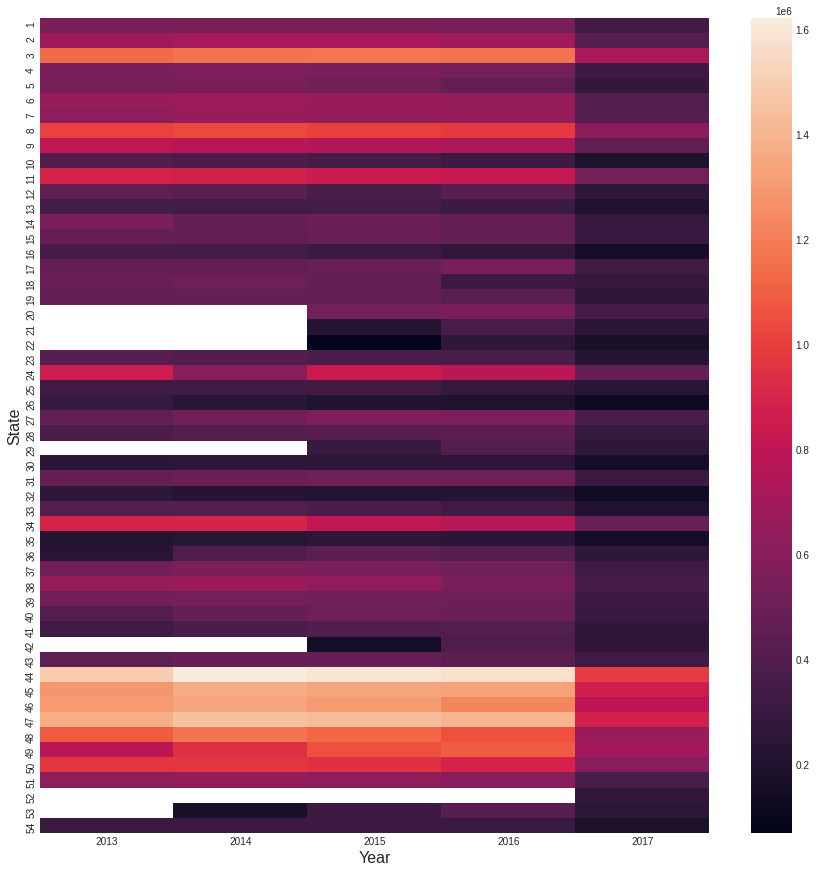

In [ ]:
# Group by store_nbr, year and sum of transactions
x = df_transactions.groupby(['store_nbr', 'year'], as_index=False).agg({'transactions':'sum'})

#Plotting heat map of store_nbr , year and no. of transactions
y = x.pivot("store_nbr", "year", "transactions")
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(y)
plt.xlabel('Year', fontsize= 16)
plt.ylabel('State', fontsize= 16)
plt.show()

* White boxes for store no. 20, 21, 22, 42 etc. shows that the particular store was not opened in that particular year (as there are no transactions).
* New Stores are opened yearly (for ex. store no. 42 was opened in year 2015 and store no. 53 was opened in year 2017 )

#### No. of Transactions per State for Every Year

In [ ]:
#Merging transactions dataframe and stores dataframe
transactions_store = pd.merge(df_transactions, df_stores, on='store_nbr')
transactions_store.head()


,date,store_nbr,transactions,year,month,day_of_week,city,state,type,cluster
0,2013-01-01,25,770,2013,1,Tuesday,Salinas,Santa Elena,D,1
1,2013-01-02,25,1038,2013,1,Wednesday,Salinas,Santa Elena,D,1
2,2013-01-03,25,887,2013,1,Thursday,Salinas,Santa Elena,D,1
3,2013-01-04,25,1054,2013,1,Friday,Salinas,Santa Elena,D,1
4,2013-01-05,25,1355,2013,1,Saturday,Salinas,Santa Elena,D,1


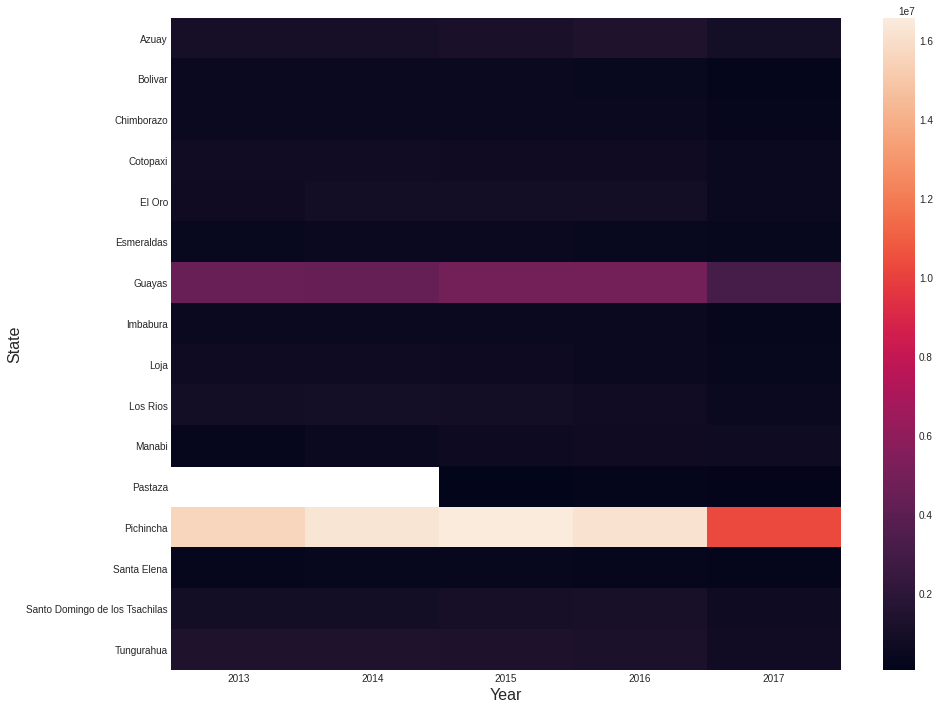

In [ ]:
# Group by state, year and sum of transactions
x = transactions_store.groupby(['state', 'year'], as_index=False).agg({'transactions':'sum'})

#Plotting heat map of state , year and no. of transactions
y = x.pivot("state", "year", "transactions")
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(y)
plt.xlabel('Year', fontsize= 16)
plt.ylabel('State', fontsize= 16)
plt.show()

* Pichincha State has maximum no. of transactions for all years followed by Guayas.
* Pastaza State did not have any stores in year 2013 and 2014

### Summary

* Day of Week, Month would also be added as features for sales prediciton.
* Store Features such as city, state, type, and cluster are important for predicting sales.
* Item Features including family, class, and perishable are also important and would be used for prediction.
* Locale and Type of Holiday/events features can be also be considered.
* Oil price is not much related so it can be discarded.

## Plan 

* ЕДА анализ - [+]
* Предобработка данных - [-]
* Создание функций для обработки данных - [-]
* Обучение модели - [-]
* Проверка правильности - [-]

## EDAsdfsdf

In [ ]:
X = df.drop("unit_sales", axis=1)
y = df["unit_sales"]

### Будем считать MSLE

y = y.apply(np.log1p)

### Отделим валидацию от теста по времени!

X_test, X_train = X[X.date >= '2017-06-01'], X[X.date < '2017-06-01']

y_test, y_train = y[y.index.isin(X_test.index)], y[y.index.isin(X_train.index)]

### Уберем колонку с датой

X_test = X_test.drop('date', axis=1)
X_train = X_train.drop('date', axis=1)
X = X.drop('date', axis=1)

object_cols = ['store_nbr', 'item_nbr', 'onpromotion', 'month',
               'city', 'state', 'type', 'cluster', 'family',
               'class', 'perishable', 'holiday_type', 'locale',
               'locale_name', 'description', 'transferred']

X[object_cols] = X[object_cols].astype(object)
X_test[object_cols] = X_test[object_cols].astype(object)
X_train[object_cols] = X_train[object_cols].astype(object)

X.head()

,store_nbr,item_nbr,onpromotion,month,dcoilwtico,city,state,type,cluster,family,class,perishable,holiday_type,locale,locale_name,description,transferred
0,6,1489881,1.0,2016-10,48.75,Quito,Pichincha,D,13,PRODUCE,2018,1,WorkingDay,WorkingDay,WorkingDay,WorkingDay,WorkingDay
1,9,953609,0.0,2014-06,103.07,Quito,Pichincha,B,6,CLEANING,3046,0,WorkingDay,WorkingDay,WorkingDay,WorkingDay,WorkingDay
2,21,1946155,0.0,2017-06,44.73,Santo Domingo,Santo Domingo de los Tsachilas,B,6,DELI,2650,1,WorkingDay,WorkingDay,WorkingDay,WorkingDay,WorkingDay
3,46,119023,0.0,2016-07,45.37,Quito,Pichincha,A,14,CLEANING,3026,0,WorkingDay,WorkingDay,WorkingDay,WorkingDay,WorkingDay
4,43,760319,0.0,2016-08,41.92,Esmeraldas,Esmeraldas,E,10,POULTRY,2416,1,WorkingDay,WorkingDay,WorkingDay,WorkingDay,WorkingDay


In [ ]:
from sklearn.model_selection import TimeSeriesSplit

splitter = TimeSeriesSplit(n_splits=3)

### Дерево

In [ ]:
### Кастомные трансформеры - это круто,
### но на больших данных необходимо задумываться
### об оптимизации и векторных вычислениях
### Будем трансформировать колонки уже готовыми реализациями


In [ ]:
!pip install category-encoders

You should consider upgrading via the 'c:\users\gigabyte\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [ ]:
### Запишем заранее колонки для OHE
### и счетчиков
### а также вещественные колонки


cols_for_ohe = [x for x in object_cols if X_train[x].nunique() < 5]
cols_for_mte = [x for x in object_cols if X_train[x].nunique() >= 5]
numeric_cols = list(X_train.select_dtypes(exclude='object').columns)

### сохраним индексы этих колонок

cols_for_ohe_idx = [list(X_train.columns).index(col) for col in cols_for_ohe]
cols_for_mte_idx = [list(X_train.columns).index(col) for col in cols_for_mte]
numeric_cols_idx = [list(X_train.columns).index(col) for col in numeric_cols]

In [ ]:
from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder
from category_encoders.one_hot import OneHotEncoder
from sklearn.preprocessing import StandardScaler

t = [('OneHotEncoder', OneHotEncoder(), cols_for_ohe_idx),
     ('MeanTargetEncoder', TargetEncoder(), cols_for_mte_idx),
     ('StandardScaler', StandardScaler(), numeric_cols_idx)]

col_transform = ColumnTransformer(transformers=t)

In [ ]:
col_transform.fit(X_train, y_train)

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(), [2, 11, 13]),
                                ('MeanTargetEncoder', TargetEncoder(),
                                 [0, 1, 3, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16]),
                                ('StandardScaler', StandardScaler(), [4])])

In [ ]:
col_transform.transform(X_test)

array([[ 0.        ,  1.        ,  0.        , ...,  1.74964584,
         1.74964584, -0.73037563],
       [ 0.        ,  1.        ,  0.        , ...,  1.74964584,
         1.74964584, -0.68616989],
       [ 0.        ,  1.        ,  0.        , ...,  1.74964584,
         1.74964584, -0.60849999],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  1.74964584,
         1.74964584, -0.67708086],
       [ 0.        ,  1.        ,  0.        , ...,  1.74964584,
         1.74964584, -0.68616989],
       [ 0.        ,  1.        ,  0.        , ...,  1.74964584,
         1.74964584, -0.56181542]])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

pipe_dt = Pipeline([("column_transformer",
                     col_transform),

                    ("decision_tree",
                     DecisionTreeRegressor())])

pipe_dt.fit(X_train, y_train)

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('OneHotEncoder',
                                                  OneHotEncoder(),
                                                  [2, 11, 13]),
                                                 ('MeanTargetEncoder',
                                                  TargetEncoder(),
                                                  [0, 1, 3, 5, 6, 7, 8, 9, 10,
                                                   12, 14, 15, 16]),
                                                 ('StandardScaler',
                                                  StandardScaler(), [4])])),
                ('decision_tree', DecisionTreeRegressor())])

In [ ]:
### Замерим качество работы такой модели
### Возьмем MSLE

train_preds = pipe_dt.predict(X_train)
test_preds = pipe_dt.predict(X_test)

train_error = np.mean((train_preds - y_train)**2)
test_error = np.mean((test_preds - y_test)**2)


print(f"Качество на трейне: {train_error.round(3)}")
print(f"Качество на тесте: {test_error.round(3)}")

Качество на трейне: 0.0
Качество на тесте: 0.825


In [ ]:
### Попробуем контролировать обобщающую способность такой модели!

from sklearn.model_selection import GridSearchCV

param_grid = {
    "decision_tree__max_depth": [3, 5, 10],
    "decision_tree__min_samples_split": [10, 200, 50000],
    "decision_tree__min_impurity_decrease": [0, 0.1],
    "decision_tree__max_leaf_nodes": [100, 1000]
}

### Передадим в GridSearchCV

search = GridSearchCV(pipe_dt,
                      param_grid,
                      cv=splitter,
                      scoring='neg_mean_squared_error',
                      verbose=10)

search.fit(X_train, y_train)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

print(f"Качество лучшей модели на финальном тесте: {search.score(X_test, y_test)}")

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3; 1/36] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10
[CV 1/3; 1/36] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-0.536 total time=   1.0s
[CV 2/3; 1/36] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10
[CV 2/3; 1/36] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-0.513 total time=   1.7s
[CV 3/3; 1/36] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10
[CV 3/3; 1/36] END decision_tree__max_depth=3, decision_tree__max_leaf_nod

### Обучение стекинга

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor

pipe_dt = Pipeline([("column_transformer",
                     col_transform),

                    ("decision_tree",
                     DecisionTreeRegressor())])

pipe_lr = Pipeline([("column_transformer",
                     col_transform),

                    ("Lasso",
                     Lasso())])

pipe_knn = Pipeline([("column_transformer",
                      col_transform),

                     ("knn",
                      KNeighborsRegressor())])

estimators = [
    ("dt", pipe_dt),
    ("lr", pipe_lr),
    ("knn", pipe_knn)
]

final_estimator = DecisionTreeRegressor(max_depth=3)

### Base learners are fitted on the full X
### while the final estimator is trained
### using cross-validated predictions of the base learners
### using cross_val_predict.

stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=2
)

In [ ]:
stacking_model.fit(X_train, y_train)

StackingRegressor(cv=2,
                  estimators=[('dt',
                               Pipeline(steps=[('column_transformer',
                                                ColumnTransformer(transformers=[('OneHotEncoder',
                                                                                 OneHotEncoder(),
                                                                                 [2,
                                                                                  11,
                                                                                  13]),
                                                                                ('MeanTargetEncoder',
                                                                                 TargetEncoder(),
                                                                                 [0,
                                                                                  1,
                                            

In [ ]:
### Замерим качество работы такой модели
### Возьмем MSLE

train_preds = stacking_model.predict(X_train)
test_preds = stacking_model.predict(X_test)

train_error = np.mean((train_preds - y_train)**2)
test_error = np.mean((test_preds - y_test)**2)


print(f"Качество на трейне: {train_error.round(3)}")
print(f"Качество на тесте: {test_error.round(3)}")

Качество на трейне: 0.311
Качество на тесте: 0.516


### Обучение бэггинга

In [ ]:
from sklearn.ensemble import BaggingRegressor

base_pipe = Pipeline([("column_transformer",
                       col_transform),

                     ("decision_tree",
                      DecisionTreeRegressor(max_depth=10))])

bagging = BaggingRegressor(base_estimator=base_pipe,
                            n_estimators=10, random_state=32)

bagging.fit(X_train, y_train)

BaggingRegressor(base_estimator=Pipeline(steps=[('column_transformer',
                                                 ColumnTransformer(transformers=[('OneHotEncoder',
                                                                                  OneHotEncoder(),
                                                                                  [2,
                                                                                   11,
                                                                                   13]),
                                                                                 ('MeanTargetEncoder',
                                                                                  TargetEncoder(),
                                                                                  [0,
                                                                                   1,
                                                                                   3,
         

In [ ]:
### Замерим качество работы такой модели
### Возьмем MSLE

train_preds = bagging.predict(X_train)
test_preds = bagging.predict(X_test)

train_error = np.mean((train_preds - y_train)**2)
test_error = np.mean((test_preds - y_test)**2)


print(f"Качество на трейне: {train_error.round(3)}")
print(f"Качество на тесте: {test_error.round(3)}")

Качество на трейне: 0.392
Качество на тесте: 0.447


In [ ]:
### Построим обучающие кривые:

train_losses = []
test_losses = []

for i in range(1, 21):

    bagging = BaggingRegressor(base_estimator=base_pipe,
                               n_estimators=i, random_state=32)

    bagging.fit(X_train, y_train)

    train_preds = bagging.predict(X_train)
    test_preds = bagging.predict(X_test)

    train_error = np.mean((train_preds - y_train)**2)
    test_error = np.mean((test_preds - y_test)**2)

    train_losses.append(train_error)
    test_losses.append(test_error)

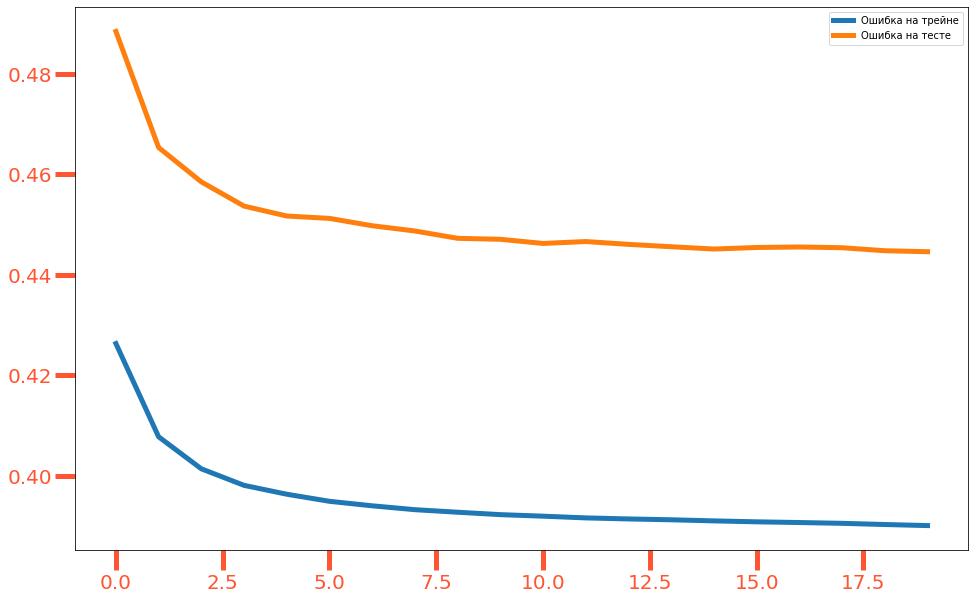

In [ ]:
fig = plt.figure()
fig.set_size_inches(16, 10)

plt.plot(train_losses)
plt.plot(test_losses)

plt.legend(['Ошибка на трейне', 'Ошибка на тесте'])
plt.show()

### RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RandomForest_pipe = Pipeline([("column_transformer",
                               col_transform),

                              ("decision_tree",
                               RandomForestRegressor(max_depth=10,
                                                     verbose=1))])

RandomForest_pipe.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   46.9s finished


Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('OneHotEncoder',
                                                  OneHotEncoder(),
                                                  [2, 11, 13]),
                                                 ('MeanTargetEncoder',
                                                  TargetEncoder(),
                                                  [0, 1, 3, 5, 6, 7, 8, 9, 10,
                                                   12, 14, 15, 16]),
                                                 ('StandardScaler',
                                                  StandardScaler(), [4])])),
                ('decision_tree',
                 RandomForestRegressor(max_depth=10, verbose=1))])

In [ ]:
### Замерим качество работы такой модели
### Возьмем MSLE

train_preds = RandomForest_pipe.predict(X_train)
test_preds = RandomForest_pipe.predict(X_test)

train_error = np.mean((train_preds - y_train)**2)
test_error = np.mean((test_preds - y_test)**2)


print(f"Качество на трейне: {train_error.round(3)}")
print(f"Качество на тесте: {test_error.round(3)}")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Качество на трейне: 0.39
Качество на тесте: 0.447


In [ ]:
from sklearn.model_selection import GridSearchCV

n_estimators = [int(x) for x in np.linspace(start = 50, stop = 400, num = 3)]
max_depth = [int(x) for x in np.linspace(10, 51, num = 4)]


param_grid =  {'decision_tree__n_estimators': n_estimators,
               'decision_tree__max_depth': max_depth
              }

### Передадим в GridSearchCV

search = GridSearchCV(RandomForest_pipe,
                      param_grid,
                      cv=splitter,
                      scoring='neg_mean_squared_error',
                      verbose=10)

search.fit(X_train, y_train)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

print(f"Качество лучшей модели на финальном тесте: {search.score(X_test, y_test)}")

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3; 1/12] START decision_tree__max_depth=10, decision_tree__n_estimators=50


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    5.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished


[CV 1/3; 1/12] END decision_tree__max_depth=10, decision_tree__n_estimators=50;, score=-0.473 total time=   6.3s
[CV 2/3; 1/12] START decision_tree__max_depth=10, decision_tree__n_estimators=50


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   10.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished


[CV 2/3; 1/12] END decision_tree__max_depth=10, decision_tree__n_estimators=50;, score=-0.449 total time=  12.5s
[CV 3/3; 1/12] START decision_tree__max_depth=10, decision_tree__n_estimators=50


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   17.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished


[CV 3/3; 1/12] END decision_tree__max_depth=10, decision_tree__n_estimators=50;, score=-0.440 total time=  20.4s
[CV 1/3; 2/12] START decision_tree__max_depth=10, decision_tree__n_estimators=225


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:   23.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:    0.8s finished


[CV 1/3; 2/12] END decision_tree__max_depth=10, decision_tree__n_estimators=225;, score=-0.472 total time=  25.5s
[CV 2/3; 2/12] START decision_tree__max_depth=10, decision_tree__n_estimators=225


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:   48.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:    0.8s finished


[CV 2/3; 2/12] END decision_tree__max_depth=10, decision_tree__n_estimators=225;, score=-0.448 total time=  50.7s
[CV 3/3; 2/12] START decision_tree__max_depth=10, decision_tree__n_estimators=225


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:    0.8s finished


[CV 3/3; 2/12] END decision_tree__max_depth=10, decision_tree__n_estimators=225;, score=-0.440 total time= 1.3min
[CV 1/3; 3/12] START decision_tree__max_depth=10, decision_tree__n_estimators=400


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   43.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.4s finished


[CV 1/3; 3/12] END decision_tree__max_depth=10, decision_tree__n_estimators=400;, score=-0.472 total time=  45.9s
[CV 2/3; 3/12] START decision_tree__max_depth=10, decision_tree__n_estimators=400


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.5s finished


[CV 2/3; 3/12] END decision_tree__max_depth=10, decision_tree__n_estimators=400;, score=-0.448 total time= 1.6min
[CV 3/3; 3/12] START decision_tree__max_depth=10, decision_tree__n_estimators=400


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  2.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.5s finished


[CV 3/3; 3/12] END decision_tree__max_depth=10, decision_tree__n_estimators=400;, score=-0.440 total time= 2.4min
[CV 1/3; 4/12] START decision_tree__max_depth=23, decision_tree__n_estimators=50


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   10.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished


[CV 1/3; 4/12] END decision_tree__max_depth=23, decision_tree__n_estimators=50;, score=-0.480 total time=  12.1s
[CV 2/3; 4/12] START decision_tree__max_depth=23, decision_tree__n_estimators=50


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   24.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished


[CV 2/3; 4/12] END decision_tree__max_depth=23, decision_tree__n_estimators=50;, score=-0.448 total time=  26.5s
[CV 3/3; 4/12] START decision_tree__max_depth=23, decision_tree__n_estimators=50


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   36.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished


[CV 3/3; 4/12] END decision_tree__max_depth=23, decision_tree__n_estimators=50;, score=-0.433 total time=  39.6s
[CV 1/3; 5/12] START decision_tree__max_depth=23, decision_tree__n_estimators=225


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:   51.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:    2.2s finished


[CV 1/3; 5/12] END decision_tree__max_depth=23, decision_tree__n_estimators=225;, score=-0.474 total time=  54.5s
[CV 2/3; 5/12] START decision_tree__max_depth=23, decision_tree__n_estimators=225


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:  1.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:    2.6s finished


[CV 2/3; 5/12] END decision_tree__max_depth=23, decision_tree__n_estimators=225;, score=-0.442 total time= 1.9min
[CV 3/3; 5/12] START decision_tree__max_depth=23, decision_tree__n_estimators=225


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:  2.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:    2.9s finished


[CV 3/3; 5/12] END decision_tree__max_depth=23, decision_tree__n_estimators=225;, score=-0.428 total time= 3.0min
[CV 1/3; 6/12] START decision_tree__max_depth=23, decision_tree__n_estimators=400


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    4.2s finished


[CV 1/3; 6/12] END decision_tree__max_depth=23, decision_tree__n_estimators=400;, score=-0.473 total time= 1.7min
[CV 2/3; 6/12] START decision_tree__max_depth=23, decision_tree__n_estimators=400


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  3.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    5.0s finished


[CV 2/3; 6/12] END decision_tree__max_depth=23, decision_tree__n_estimators=400;, score=-0.442 total time= 3.6min
[CV 3/3; 6/12] START decision_tree__max_depth=23, decision_tree__n_estimators=400


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  5.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    5.4s finished


[CV 3/3; 6/12] END decision_tree__max_depth=23, decision_tree__n_estimators=400;, score=-0.427 total time= 5.4min
[CV 1/3; 7/12] START decision_tree__max_depth=37, decision_tree__n_estimators=50


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   12.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished


[CV 1/3; 7/12] END decision_tree__max_depth=37, decision_tree__n_estimators=50;, score=-0.483 total time=  14.4s
[CV 2/3; 7/12] START decision_tree__max_depth=37, decision_tree__n_estimators=50


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   27.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished


[CV 2/3; 7/12] END decision_tree__max_depth=37, decision_tree__n_estimators=50;, score=-0.452 total time=  30.0s
[CV 3/3; 7/12] START decision_tree__max_depth=37, decision_tree__n_estimators=50


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   43.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.7s finished


[CV 3/3; 7/12] END decision_tree__max_depth=37, decision_tree__n_estimators=50;, score=-0.436 total time=  46.9s
[CV 1/3; 8/12] START decision_tree__max_depth=37, decision_tree__n_estimators=225


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:   58.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:    2.5s finished


[CV 1/3; 8/12] END decision_tree__max_depth=37, decision_tree__n_estimators=225;, score=-0.475 total time= 1.0min
[CV 2/3; 8/12] START decision_tree__max_depth=37, decision_tree__n_estimators=225


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:    2.7s finished


[CV 2/3; 8/12] END decision_tree__max_depth=37, decision_tree__n_estimators=225;, score=-0.444 total time= 2.1min
[CV 3/3; 8/12] START decision_tree__max_depth=37, decision_tree__n_estimators=225


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:  3.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:    3.1s finished


[CV 3/3; 8/12] END decision_tree__max_depth=37, decision_tree__n_estimators=225;, score=-0.430 total time= 3.1min
[CV 1/3; 9/12] START decision_tree__max_depth=37, decision_tree__n_estimators=400


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    4.2s finished


[CV 1/3; 9/12] END decision_tree__max_depth=37, decision_tree__n_estimators=400;, score=-0.475 total time= 1.7min
[CV 2/3; 9/12] START decision_tree__max_depth=37, decision_tree__n_estimators=400


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  3.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    5.3s finished


[CV 2/3; 9/12] END decision_tree__max_depth=37, decision_tree__n_estimators=400;, score=-0.444 total time= 3.5min
[CV 3/3; 9/12] START decision_tree__max_depth=37, decision_tree__n_estimators=400


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  5.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    6.4s finished


[CV 3/3; 9/12] END decision_tree__max_depth=37, decision_tree__n_estimators=400;, score=-0.429 total time= 5.5min
[CV 1/3; 10/12] START decision_tree__max_depth=51, decision_tree__n_estimators=50


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   11.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished


[CV 1/3; 10/12] END decision_tree__max_depth=51, decision_tree__n_estimators=50;, score=-0.482 total time=  13.5s
[CV 2/3; 10/12] START decision_tree__max_depth=51, decision_tree__n_estimators=50


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   25.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished


[CV 2/3; 10/12] END decision_tree__max_depth=51, decision_tree__n_estimators=50;, score=-0.451 total time=  27.9s
[CV 3/3; 10/12] START decision_tree__max_depth=51, decision_tree__n_estimators=50


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   39.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished


[CV 3/3; 10/12] END decision_tree__max_depth=51, decision_tree__n_estimators=50;, score=-0.437 total time=  43.1s
[CV 1/3; 11/12] START decision_tree__max_depth=51, decision_tree__n_estimators=225


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:   51.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:    2.2s finished


[CV 1/3; 11/12] END decision_tree__max_depth=51, decision_tree__n_estimators=225;, score=-0.475 total time=  55.3s
[CV 2/3; 11/12] START decision_tree__max_depth=51, decision_tree__n_estimators=225


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:  1.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:    2.8s finished


[CV 2/3; 11/12] END decision_tree__max_depth=51, decision_tree__n_estimators=225;, score=-0.445 total time= 2.0min
[CV 3/3; 11/12] START decision_tree__max_depth=51, decision_tree__n_estimators=225


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:  3.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:    3.2s finished


[CV 3/3; 11/12] END decision_tree__max_depth=51, decision_tree__n_estimators=225;, score=-0.430 total time= 3.1min
[CV 1/3; 12/12] START decision_tree__max_depth=51, decision_tree__n_estimators=400


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    4.2s finished


[CV 1/3; 12/12] END decision_tree__max_depth=51, decision_tree__n_estimators=400;, score=-0.475 total time= 1.7min
[CV 2/3; 12/12] START decision_tree__max_depth=51, decision_tree__n_estimators=400


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  3.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    4.7s finished


[CV 2/3; 12/12] END decision_tree__max_depth=51, decision_tree__n_estimators=400;, score=-0.444 total time= 3.5min
[CV 3/3; 12/12] START decision_tree__max_depth=51, decision_tree__n_estimators=400


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  5.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    5.5s finished


[CV 3/3; 12/12] END decision_tree__max_depth=51, decision_tree__n_estimators=400;, score=-0.429 total time= 5.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  6.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameter (CV score=-0.44752):
{'decision_tree__max_depth': 23, 'decision_tree__n_estimators': 400}
Качество лучшей модели на финальном тесте: -0.43595517851945503


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.3s finished


### Укорочение ряда и выделение новых фичей: трюки победителей

In [ ]:
### Грузим часть данных после 2017-01-01

df_train = pd.read_csv(
    'train.csv', usecols=[1, 2, 3, 4, 5],
    dtype={'onpromotion': bool},
    converters={'unit_sales': lambda u: np.log1p(
        float(u)) if float(u) > 0 else 0},
    parse_dates=["date"],
    skiprows=range(1, 66458909)  # 2016-01-01
)

df_train = df_train.loc[df_train.date>=pd.datetime(2017,1,1)]

### Для каждого (товар-магазин) на каждый день составим продажи

df_2017 = df_train.set_index(
    ["store_nbr", "item_nbr", "date"])[["unit_sales"]].unstack(
        level=-1).fillna(0)
df_2017.columns = df_2017.columns.get_level_values(1)

In [ ]:
df_2017.head()

date                2017-01-01  2017-01-02  2017-01-03  2017-01-04  \
store_nbr item_nbr                                                   
1         96995            0.0    0.000000    0.000000    0.000000   
          99197            0.0    0.000000    1.386294    0.693147   
          103520           0.0    0.693147    1.098612    0.000000   
          103665           0.0    0.000000    0.000000    1.386294   
          105574           0.0    0.000000    1.791759    2.564949   

date                2017-01-05  2017-01-06  2017-01-07  2017-01-08  \
store_nbr item_nbr                                                   
1         96995       0.000000    0.000000    0.000000    0.000000   
          99197       0.693147    0.693147    1.098612    0.000000   
          103520      1.098612    1.386294    0.693147    0.000000   
          103665      1.098612    1.098612    0.693147    1.098612   
          105574      2.302585    1.945910    1.609438    1.098612   

date                2017-01-09  2017-01-10  2017-01-11  2017-01-12  \
store_nbr item_nbr                                                   
1         96995       0.000000    0.000000    0.000000    0.000000   
          99197       0.000000    0.693147    0.000000    0.000000   
          103520      0.693147    0.693147    0.000000    0.000000   
          103665      0.000000    2.079442    0.693147    0.693147   
          105574      1.386294    2.302585    2.484907    1.386294   

date                2017-01-13  2017-01-14  2017-01-15  2017-01-16  \
store_nbr item_nbr                                                   
1         96995       0.000000    0.000000    0.000000    0.000000   
          99197       0.000000    1.098612    0.693147    0.000000   
          103520      0.693147    0.000000    1.098612    1.098612   
          103665      2.079442    0.000000    0.000000    1.098612   
          105574      1.098612    1.386294    0.000000    1.609438   

date                2017-01-17  2017-01-18  2017-01-19  2017-01-20  \
store_nbr item_nbr                                                   
1         96995       0.000000    0.000000    0.000000    0.000000   
          99197       0.000000    0.000000    1.098612    0.000000   
          103520      0.000000    1.098612    0.693147    1.386294   
          103665      0.693147    1.791759    1.386294    1.098612   
          105574      2.397895    2.197225    2.639057    1.609438   

date                2017-01-21  2017-01-22  2017-01-23  2017-01-24  \
store_nbr item_nbr                                                   
1         96995       0.000000    0.000000    0.000000    0.000000   
          99197       1.386294    0.693147    0.000000    0.000000   
          103520      1.609438    0.000000    0.000000    0.693147   
          103665      1.609438    1.098612    1.386294    1.098612   
          105574      1.609438    1.098612    2.079442    1.945910   

date                2017-01-25  2017-01-26  2017-01-27  2017-01-28  \
store_nbr item_nbr                                                   
1         96995       0.000000    0.000000    0.000000    0.000000   
          99197       0.000000    0.000000    0.000000    0.693147   
          103520      1.098612    0.693147    1.098612    0.000000   
          103665      1.098612    1.098612    1.945910    1.945910   
          105574      1.945910    2.079442    2.484907    1.609438   

date                2017-01-29  2017-01-30  2017-01-31  2017-02-01  \
store_nbr item_nbr                                                   
1         96995       0.000000    0.000000    0.000000    0.000000   
          99197       0.693147    0.000000    0.000000    0.000000   
          103520      0.000000    0.000000    0.693147    1.098612   
          103665      0.000000    0.000000    0.693147    0.693147   
          105574      0.693147    2.197225    1.791759    2.079442   

date                2017-02-02  2017-02-03  2017-02-04  2017-02-05  \
st

In [ ]:
### Аналогично можно посмотреть на наличие промо-акций

promo_2017 = df_train.set_index(
    ["store_nbr", "item_nbr", "date"])[["onpromotion"]].unstack(
        level=-1).fillna(False)

promo_2017.columns = promo_2017.columns.get_level_values(1)

In [ ]:
promo_2017.head()

date                2017-01-01  2017-01-02  2017-01-03  2017-01-04  \
store_nbr item_nbr                                                   
1         96995          False       False       False       False   
          99197          False       False       False       False   
          103520         False       False       False       False   
          103665         False       False       False       False   
          105574         False       False        True       False   

date                2017-01-05  2017-01-06  2017-01-07  2017-01-08  \
store_nbr item_nbr                                                   
1         96995          False       False       False       False   
          99197          False       False       False       False   
          103520         False       False       False       False   
          103665         False       False       False       False   
          105574         False        True       False       False   

date                2017-01-09  2017-01-10  2017-01-11  2017-01-12  \
store_nbr item_nbr                                                   
1         96995          False       False       False       False   
          99197          False       False       False       False   
          103520         False       False       False       False   
          103665         False       False       False       False   
          105574         False       False       False       False   

date                2017-01-13  2017-01-14  2017-01-15  2017-01-16  \
store_nbr item_nbr                                                   
1         96995          False       False       False       False   
          99197          False       False       False       False   
          103520         False       False       False       False   
          103665         False       False       False       False   
          105574         False       False       False       False   

date                2017-01-17  2017-01-18  2017-01-19  2017-01-20  \
store_nbr item_nbr                                                   
1         96995          False       False       False       False   
          99197          False       False       False       False   
          103520         False       False       False       False   
          103665         False       False       False       False   
          105574         False       False       False       False   

date                2017-01-21  2017-01-22  2017-01-23  2017-01-24  \
store_nbr item_nbr                                                   
1         96995          False       False       False       False   
          99197          False       False       False       False   
          103520         False       False       False       False   
          103665         False       False       False       False   
          105574         False       False       False       False   

date                2017-01-25  2017-01-26  2017-01-27  2017-01-28  \
store_nbr item_nbr                                                   
1         96995          False       False       False       False   
          99197          False       False       False       False   
          103520         False       False       False       False   
          103665         False       False       False       False   
          105574         False       False       False       False   

date                2017-01-29  2017-01-30  2017-01-31  2017-02-01  \
store_nbr item_nbr                                                   
1         96995          False       False       False       False   
          99197          False       False       False       False   
          103520         False       False       False       False   
          103665         False       False       False       False   
          105574         False       False       False        True   

date                2017-02-02  2017-02-03  2017-02-04  2017-02-05  \
st

In [ ]:
from datetime import date, timedelta

def get_timespan(df, dt, minus, periods, freq='D'):
    return df[pd.date_range(dt - timedelta(days=minus), periods=periods, freq=freq)]

control_date = date(2017, 5, 1)

get_timespan(df_2017, control_date, 5, 5)

date                2017-04-26  2017-04-27  2017-04-28  2017-04-29  2017-04-30
store_nbr item_nbr                                                            
1         96995       0.693147    0.000000    0.693147    0.000000    0.000000
          99197       0.000000    0.000000    0.000000    0.000000    0.000000
          103520      0.000000    1.098612    1.098612    1.386294    0.000000
          103665      1.386294    1.386294    1.609438    1.386294    0.000000
          105574      1.791759    2.397895    2.079442    1.945910    1.098612
...                        ...         ...         ...         ...         ...
54        2109909     0.000000    0.000000    0.000000    0.000000    0.000000
          2110456     0.000000    0.000000    0.000000    0.000000    0.000000
          2113343     0.000000    0.000000    0.000000    0.000000    0.000000
          2113914     0.000000    0.000000    0.000000    0.000000    0.000000
          2116416     0.000000    0.000000    0.000000    0.000000    0.000000

[167515 rows x 5 columns]

In [ ]:
### Например, можно выбрать какую-то контрольную дату
### Посчитать от нее для каждой пары товар-магазин
### Количество дней, когда были ненулевые продажи

tmp = get_timespan(df_2017, control_date, 7, 7)

(tmp > 0).sum(axis=1)

store_nbr  item_nbr
1          96995       2
           99197       0
           103520      4
           103665      5
           105574      7
                      ..
54         2109909     0
           2110456     0
           2113343     0
           2113914     0
           2116416     0
Length: 167515, dtype: int64

In [ ]:
### Или количество дней из последних n штук
### Когда проводилась промо-акция на пару товар-магазин
### От выбранной даты

tmp = get_timespan(promo_2017, control_date, 60, 60)

tmp.sum(axis=1)

store_nbr  item_nbr
1          96995        0
           99197        0
           103520       0
           103665       0
           105574      30
                       ..
54         2109909      0
           2110456      0
           2113343      0
           2113914      0
           2116416      0
Length: 167515, dtype: int64

In [ ]:
def prepare_dataset(df, promo_df, t2017, name_prefix=None):

    ### Посчитаем количество промо-акцкий за последние
    ### 14, 60, 140 дней от контрольной даты

    X = {
        "promo_14_2017": get_timespan(promo_df, t2017, 14, 14).sum(axis=1).values,
        "promo_60_2017": get_timespan(promo_df, t2017, 60, 60).sum(axis=1).values,
    }

    ### Посчитаем для разного окна
    ### Различные статистики по продажам
    ### Среднее изменение продаж от дня к дню,
    ### Медианы продаж, максимальные и минимальные значения,
    ### Взвешенные средние и т.д.

    for i in [3, 7, 14, 30, 60]:
        tmp = get_timespan(df, t2017, i, i)
        X['diff_%s_mean' % i] = tmp.diff(axis=1).mean(axis=1).values
        X['mean_%s_decay' % i] = (tmp * np.power(0.9, np.arange(i)[::-1])).sum(axis=1).values
        X['mean_%s' % i] = tmp.mean(axis=1).values
        X['median_%s' % i] = tmp.median(axis=1).values
        X['min_%s' % i] = tmp.min(axis=1).values
        X['max_%s' % i] = tmp.max(axis=1).values
        X['std_%s' % i] = tmp.std(axis=1).values

    ### Посчитаем аналогичные статистики
    ### Только для даты, на неделю раньше,
    ### Чем контрольная

    for i in [3, 7, 14, 30, 60]:
        tmp = get_timespan(df, t2017 + timedelta(days=-7), i, i)
        X['diff_%s_mean_2' % i] = tmp.diff(axis=1).mean(axis=1).values
        X['mean_%s_decay_2' % i] = (tmp * np.power(0.9, np.arange(i)[::-1])).sum(axis=1).values
        X['mean_%s_2' % i] = tmp.mean(axis=1).values
        X['median_%s_2' % i] = tmp.median(axis=1).values
        X['min_%s_2' % i] = tmp.min(axis=1).values
        X['max_%s_2' % i] = tmp.max(axis=1).values
        X['std_%s_2' % i] = tmp.std(axis=1).values

    ### Посчитаем фичи, описывающие
    ### Количество дней ненулевых продаж за выбранный период
    ### Дни с первой и последней продажи
    ### И аналогичные статистики по промо-акциям

    for i in [7, 14, 30, 60]:
        tmp = get_timespan(df, t2017, i, i)
        X['has_sales_days_in_last_%s' % i] = (tmp > 0).sum(axis=1).values
        X['last_has_sales_day_in_last_%s' % i] = i - ((tmp > 0) * np.arange(i)).max(axis=1).values
        X['first_has_sales_day_in_last_%s' % i] = ((tmp > 0) * np.arange(i, 0, -1)).max(axis=1).values

        tmp = get_timespan(promo_df, t2017, i, i)
        X['has_promo_days_in_last_%s' % i] = (tmp > 0).sum(axis=1).values
        X['last_has_promo_day_in_last_%s' % i] = i - ((tmp > 0) * np.arange(i)).max(axis=1).values
        X['first_has_promo_day_in_last_%s' % i] = ((tmp > 0) * np.arange(i, 0, -1)).max(axis=1).values

    X = pd.DataFrame(X)

    return X

In [ ]:
new_features = prepare_dataset(df_2017, promo_2017, control_date)

new_features.index = promo_2017.index

new_features

promo_14_2017  promo_60_2017  diff_3_mean  mean_3_decay  \
store_nbr item_nbr                                                            
1         96995                 0              0    -0.346574      0.561449   
          99197                 0              0     0.000000      0.000000   
          103520                0              0    -0.549306      2.137541   
          103665                0              0    -0.804719      2.551310   
          105574                6             30    -0.490415      4.534279   
...                           ...            ...          ...           ...   
54        2109909               0              0     0.000000      0.000000   
          2110456               0              0     0.000000      0.000000   
          2113343               0              0     0.000000      0.000000   
          2113914               0              0     0.000000      0.000000   
          2116416               0              0     0.000000      0.000000   

                      mean_3  median_3     min_3     max_3     std_3  \
store_nbr item_nbr                                                     
1         96995     0.231049  0.000000  0.000000  0.693147  0.400189   
          99197     0.000000  0.000000  0.000000  0.000000  0.000000   
          103520    0.828302  1.098612  0.000000  1.386294  0.731610   
          103665    0.998577  1.386294  0.000000  1.609438  0.871961   
          105574    1.707988  1.945910  1.098612  2.079442  0.531941   
...                      ...       ...       ...       ...       ...   
54        2109909   0.000000  0.000000  0.000000  0.000000  0.000000   
          2110456   0.000000  0.000000  0.000000  0.000000  0.000000   
          2113343   0.000000  0.000000  0.000000  0.000000  0.000000   
          2113914   0.000000  0.000000  0.000000  0.000000  0.000000   
          2116416   0.000000  0.000000  0.000000  0.000000  0.000000   

                    diff_7_mean  mean_7_decay    mean_7  median_7     min_7  \
store_nbr item_nbr                                                            
1         96995        0.000000      1.016223  0.198042  0.000000  0.000000   
          99197        0.000000      0.000000  0.000000  0.000000  0.000000   
          103520      -0.268240      3.793751  0.741851  1.098612  0.000000   
          103665       0.000000      4.880762  0.923067  1.386294  0.000000   
          105574      -0.216547     10.091911  2.002014  2.079442  1.098612   
...                         ...           ...       ...       ...       ...   
54        2109909      0.000000      0.000000  0.000000  0.000000  0.000000   
          2110456      0.000000      0.000000  0.000000  0.000000  0.000000   
          2113343      0.000000      0.000000  0.000000  0.000000  0.000000   
          2113914      0.000000      0.000000  0.000000  0.000000  0.000000   
          2116416      0.000000      0.000000  0.000000  0.000000  0.000000   

                       max_7     std_7  diff_14_mean  mean_14_decay   mean_14  \
store_nbr item_nbr                                                              
1         96995     0.693147  0.338221     -0.053319       2.214791  0.326025   
          99197     0.000000  0.000000      0.000000       0.000000  0.000000   
          103520    1.609438  0.715728     -0.084509       6.473794  0.923954   
          103665    1.609438  0.691835     -0.106638       7.981246  1.093034   
          105574    2.397895  0.460665     -0.075448      13.735860  1.776430   
...                      ...       ...           ...            ...       ...   
54        2109909   0.000000  0.000000      0.000000       0.000000  0.000000   
          2110456   0.000000  0.000000      0.000000       0.000000  0.000000   
          2113343   0.000000  0.000000      0.000000       0.000000  0.000000   
          2113914   0.000000  0.000000      0.000000       0.000000  0.000000   
          2116416   0.000000  0.000000      0.000000   

In [ ]:
### Вернемся к нашей задаче

X = df.drop("unit_sales", axis=1)
y = df["unit_sales"]

### Будем считать MSLE

y = y.apply(np.log1p)

### Добавим новые фичи

New_X = pd.merge(X,
                 new_features.reset_index(),
                 on=['store_nbr', 'item_nbr'],
                 how='left'
                )

New_X.head()

,date,store_nbr,item_nbr,onpromotion,month,dcoilwtico,city,state,type,cluster,family,class,perishable,holiday_type,locale,locale_name,description,transferred,promo_14_2017,promo_60_2017,diff_3_mean,mean_3_decay,mean_3,median_3,min_3,max_3,std_3,diff_7_mean,mean_7_decay,mean_7,median_7,min_7,max_7,std_7,diff_14_mean,mean_14_decay,mean_14,median_14,min_14,max_14,std_14,diff_30_mean,mean_30_decay,mean_30,median_30,min_30,max_30,std_30,diff_60_mean,mean_60_decay,mean_60,median_60,min_60,max_60,std_60,diff_3_mean_2,mean_3_decay_2,mean_3_2,median_3_2,min_3_2,max_3_2,std_3_2,diff_7_mean_2,mean_7_decay_2,mean_7_2,median_7_2,min_7_2,max_7_2,std_7_2,diff_14_mean_2,mean_14_decay_2,mean_14_2,median_14_2,min_14_2,max_14_2,std_14_2,diff_30_mean_2,mean_30_decay_2,mean_30_2,median_30_2,min_30_2,max_30_2,std_30_2,diff_60_mean_2,mean_60_decay_2,mean_60_2,median_60_2,min_60_2,max_60_2,std_60_2,has_sales_days_in_last_7,last_has_sales_day_in_last_7,first_has_sales_day_in_last_7,has_promo_days_in_last_7,last_has_promo_day_in_last_7,first_has_promo_day_in_last_7,has_sales_days_in_last_14,last_has_sales_day_in_last_14,first_has_sales_day_in_last_14,has_promo_days_in_last_14,last_has_promo_day_in_last_14,first_has_promo_day_in_last_14,has_sales_days_in_last_30,last_has_sales_day_in_last_30,first_has_sales_day_in_last_30,has_promo_days_in_last_30,last_has_promo_day_in_last_30,first_has_promo_day_in_last_30,has_sales_days_in_last_60,last_has_sales_day_in_last_60,first_has_sales_day_in_last_60,has_promo_days_in_last_60,last_has_promo_day_in_last_60,first_has_promo_day_in_last_60
0,2016-10-26,6,1489881,1.0,2016-10,48.75,Quito,Pichincha,D,13,PRODUCE,2018,1,WorkingDay,WorkingDay,WorkingDay,WorkingDay,WorkingDay,0.0,4.0,0.745046,8.883628,3.224775,2.772589,2.639057,4.262680,0.901328,0.710447,10.399541,1.679110,2.079442,0.000000,4.262680,1.703454,0.327898,12.005771,1.182111,0.000000,0.000000,4.262680,1.495706,0.018935,14.843954,1.363939,1.589027,0.0,4.262680,1.392792,4.497020e-02,15.442754,1.318462,1.098612,0.0,4.262680,1.323773,-1.198948,1.942295,0.799298,0.000000,0.000000,2.397895,1.384425,0.000000,3.358228,0.685113,0.000000,0.000000,2.397895,1.170053,0.000000,7.860521,1.245464,1.098612,0.0,2.995732,1.303519,-0.106588,9.918927,1.333189,1.589027,0.0,3.713572,1.330309,-0.049906,10.587129,1.387854,1.497866,0.0,3.713572,1.279725,4.0,1.0,4.0,0.0,7.0,0.0,6.0,1.0,13.0,0.0,14.0,0.0,16.0,1.0,30.0,2.0,19.0,26.0,34.0,1.0,60.0,4.0,19.0,40.0
1,2014-06-02,9,953609,0.0,2014-06,103.07,Quito,Pichincha,B,6,CLEANING,3046,0,WorkingDay,WorkingDay,WorkingDay,WorkingDay,WorkingDay,13.0,47.0,0.346574,3.195409,1.155245,1.386294,0.693147,1.386294,0.400189,0.047947,6.900844,1.362023,1.386294,0.693147,2.890372,0.741821,0.022129,9.971839,1.274331,1.242453,0.000000,2.890372,0.654246,-0.019297,11.574962,1.173560,1.242453,0.0,2.890372,0.667977,7.526936e-18,11.964368,1.099339,1.098612,0.0,2.890372,0.648864,-0.255413,4.014841,1.499937,1.609438,1.098612,1.791759,0.359313,0.000000,6.420688,1.186639,1.098612,0.000000,1.791759,0.599312,0.031190,8.009501,0.948306,1.098612,0.0,1.791759,0.602461,0.037883,10.213282,1.067625,1.098612,0.0,2.197225,0.656955,-0.004876,10.597875,1.016509,1.098612,0.0,2.397895,0.645706,7.0,1.0,7.0,7.0,1.0,7.0,13.0,1.0,14.0,13.0,1.0,14.0,26.0,1.0,30.0,26.0,1.0,30.0,51.0,1.0,60.0,47.0,1.0,56.0
2,2017-06-18,21,1946155,0.0,2017-06,44.73,Santo Domingo,Santo Domingo de los Tsachilas,B,6,DELI,2650,1,WorkingDay,WorkingDay,WorkingDay,WorkingDay,WorkingDay,2.0,21.0,-0.040021,6.634842,2.450814,2.484907,2.302585,2.564949,0.134464,-0.025692,11.167831,2.096233,2.302585,1.098612,2.639057,0.561049,0.014025,16.183944,2.018282,1.935601,1.098612,3.091042,0.581641,-0.002760,19.026990,1.769991,2.012676,0.0,3.091042,0.897712,4.211706e-02,19.672146,1.679523,2.012676,0.0,3.091042,0.983105,0.740802,6.266185,2.259974,2.079442,1.609438,3.091042,0.757121,0.131410,10.487446,1.940331,1.791759,1.098612,3.091042,0.635644,0.237772,13.721263,1.521182,1.700599,0.0,3.091042,1.024271,0.018141,17.171013,1.652

In [ ]:
## Отделим валидацию от теста по времени!

X_test, X_train = New_X[New_X.date >= '2017-06-01'], New_X[(New_X.date < '2017-06-01')&(New_X.date >= '2017-01-01')]

y_test, y_train = y[y.index.isin(X_test.index)], y[y.index.isin(X_train.index)]

### Уберем колонку с датой

X_test = X_test.drop('date', axis=1)
X_train = X_train.drop('date', axis=1)
New_X = New_X.drop('date', axis=1)

object_cols = ['store_nbr', 'item_nbr', 'onpromotion', 'month',
               'city', 'state', 'type', 'cluster', 'family',
               'class', 'perishable', 'holiday_type', 'locale',
               'locale_name', 'description', 'transferred']

X_test[object_cols] = X_test[object_cols].astype(object)
X_train[object_cols] = X_train[object_cols].astype(object)

In [ ]:
y_test.to_csv('y_test_updated.csv', index=False)
y_train.to_csv('y_train_updated.csv', index=False)

X_test.to_csv('X_test_updated.csv', index=False)
X_train.to_csv('X_train_updated.csv', index=False)

In [ ]:
### Запишем заранее колонки для OHE
### и счетчиков
### а также вещественные колонки


cols_for_ohe = [x for x in object_cols if X_train[x].nunique() < 5]
cols_for_mte = [x for x in object_cols if X_train[x].nunique() >= 5]
numeric_cols = list(X_train.select_dtypes(exclude='object').columns)

### сохраним индексы этих колонок

cols_for_ohe_idx = [list(X_train.columns).index(col) for col in cols_for_ohe]
cols_for_mte_idx = [list(X_train.columns).index(col) for col in cols_for_mte]
numeric_cols_idx = [list(X_train.columns).index(col) for col in numeric_cols]

In [ ]:
t = [('OneHotEncoder', OneHotEncoder(), cols_for_ohe_idx),
     ('MeanTargetEncoder', TargetEncoder(), cols_for_mte_idx),
     ('StandardScaler', StandardScaler(), numeric_cols_idx)]

col_transform = ColumnTransformer(transformers=t)

In [ ]:
### Зафитим модель на новых данных
### И замерим качество на тесте и на трейне

RandomForest_best_pipe = Pipeline([("column_transformer",
                                    col_transform),

                                   ("decision_tree",
                                    RandomForestRegressor(max_depth=23,
                                                          n_estimators=500,
                                                          verbose=1))])

RandomForest_best_pipe.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  7.8min finished


Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('OneHotEncoder',
                                                  OneHotEncoder(),
                                                  [2, 11, 13]),
                                                 ('MeanTargetEncoder',
                                                  TargetEncoder(),
                                                  [0, 1, 3, 5, 6, 7, 8, 9, 10,
                                                   12, 14, 15, 16]),
                                                 ('StandardScaler',
                                                  StandardScaler(),
                                                  [4, 17, 18, 19, 20, 21, 22,
                                                   23, 24, 25, 26, 27, 28, 29,
                                                   30, 31, 32, 33, 34, 35, 36,
                                                   37, 38, 39, 40, 41, 42, 43,
                          

In [ ]:
### Замерим качество работы такой модели
### Возьмем MSLE

train_preds = RandomForest_best_pipe.predict(X_train)
test_preds = RandomForest_best_pipe.predict(X_test)

train_error = np.mean((train_preds - y_train)**2)
test_error = np.mean((test_preds - y_test)**2)


print(f"Качество на трейне: {train_error.round(3)}")
print(f"Качество на тесте: {test_error.round(3)}")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Качество на трейне: 0.043
Качество на тесте: 0.337


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.6s finished
